In [1]:
import rdkit

import pandas as pd
import numpy as np
from copy import deepcopy

from torch_geometric.datasets import MoleculeNet
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem

In [2]:
import custom_regression_functions
import custom_models
from custom_regression_functions import *
from custom_models import *
import custom_general_functions
from custom_general_functions import *

from copy import deepcopy

In [3]:
from custom_models_fingerprints import *

In [4]:
use_fingerprints = False

apply_scaffold_split = False

create_new_data = False

In [5]:
from torch_geometric.nn import global_mean_pool, global_max_pool

model_type = "GNN"


if not apply_scaffold_split:
    if not use_fingerprints:
        filename_basic = "results_regression_random_gnn/model_gnn_conv"
    else:
        filename_basic = "results_regression_random_fp/model_gnn_conv"
else:
    if not use_fingerprints:
        filename_basic = "results_regression_scaffold_gnn/model_gnn_conv"
    else:
        filename_basic = "results_regression_scaffold_fp/model_gnn_conv"

apply_scaffold_split = False

hidden_channels=[64]
gcn_layers=4
linear_sizes=[[512], [512, 256]]
aggregations=[global_mean_pool, global_max_pool]
apply_random_aggregations=False

learning_rate=0.001

In [6]:
param_combinations = dict()

hidden_channels_list = [[64], [256], [512]]
linear_sizes_list = [[], [512], [512, 256]]
gcn_layers_list = [1, 2, 3, 4]
aggregations_list = [[global_mean_pool, global_max_pool], [global_mean_pool], [global_max_pool]]
apply_scaffold_split_list = [apply_scaffold_split]

In [7]:
param_combinations["hidden_channels_list"] = hidden_channels_list
param_combinations["linear_sizes_list"] = linear_sizes_list

param_combinations["gcn_layers_list"] = gcn_layers_list
param_combinations["aggregations_list"] = aggregations_list
param_combinations["apply_scaffold_split_list"] = apply_scaffold_split_list

In [8]:
import itertools


keys = list(param_combinations.keys())
values = list(param_combinations.values())

combinations = list(itertools.product(*values))

In [9]:
batch_size = 64

In [10]:


if use_fingerprints:
    param_combinations_fp = dict()

    param_combinations_fp["radius"] = [2, 3]
    param_combinations_fp["fpSize"] = [1024, 2048]
    param_combinations_fp["linear_layers"] = [[2048], [2048, 1024, 512], [1024, 512], [1024]]
    param_combinations_fp["create_count_fp"] = [True, False]
    param_combinations_fp["apply_scaffold_split_list"] = apply_scaffold_split_list

    keys_fp = list(param_combinations_fp.keys())
    values_fp = list(param_combinations_fp.values())

    combinations_fp = list(itertools.product(*values_fp))


In [11]:
if use_fingerprints:

    combinations = combinations_fp
    keys = keys_fp
    values = values_fp

In [12]:
print(len(combinations))

108


run: 0
{'hidden_channels_list': [64], 'linear_sizes_list': [], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>, <function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000018078BBDBE0>, <torch.utils.data.dataset.Subset object at 0x000001807CDCC340>, <torch.utils.data.dataset.Subset object at 0x000001807CDCC610>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=128, out_features=1, bias=True)
)
Number of parameters:  769


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.639834181467692 | Validation Loss 5.761348724365234
Epoch 10 | Train Loss 3.720288038253784 | Validation Loss 4.89238703250885
Epoch 20 | Train Loss 3.685502052307129 | Validation Loss 4.789844989776611
Epoch 30 | Train Loss 3.47015585899353 | Validation Loss 4.4016265869140625
Epoch 40 | Train Loss 3.1276810566584268 | Validation Loss 4.281820058822632
Epoch 50 | Train Loss 3.038813098271688 | Validation Loss 4.492471933364868
Epoch 60 | Train Loss 2.9287986914316813 | Validation Loss 3.8618409633636475
Epoch 70 | Train Loss 2.9221556345621744 | Validation Loss 3.73829185962677
Epoch 80 | Train Loss 2.7979798158009848 | Validation Loss 3.8687411546707153
Epoch 90 | Train Loss 2.6793753226598103 | Validation Loss 3.404438018798828
Epoch 100 | Train Loss 2.635024134318034 | Validation Loss 3.4597225189208984
Epoch 110 | Train Loss 2.6121333599090577 | Validation Loss 3.1432814598083496
Epoch 120 | Train Loss 2.4244763056437173 | Validation Loss 3.2174220085144043


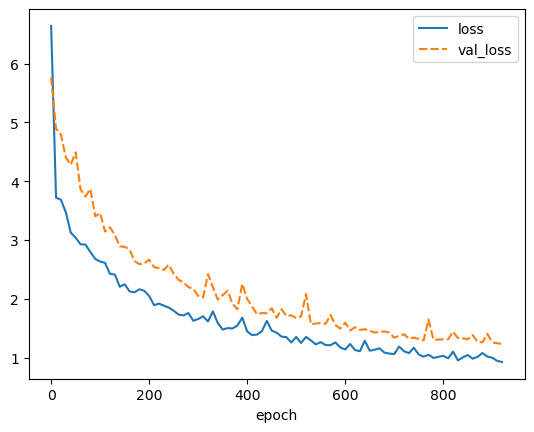

best weights loaded


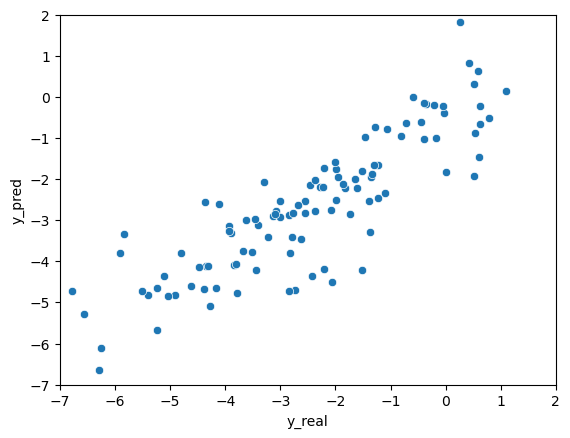

elapsed time: 151.7859513759613
run: 1
{'hidden_channels_list': [64], 'linear_sizes_list': [], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807B871E80>, <torch.utils.data.dataset.Subset object at 0x00000180D3B96790>, <torch.utils.data.dataset.Subset object at 0x00000180D3B96280>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
)
Number of parameters:  705
Epoch 0 | Train Loss 11.9890567779541 | Validation Loss 11.36519193649292


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 10 | Train Loss 3.991506894429525 | Validation Loss 5.246002197265625
Epoch 20 | Train Loss 3.7355817476908366 | Validation Loss 4.900635242462158
Epoch 30 | Train Loss 3.552514330546061 | Validation Loss 4.686490893363953
Epoch 40 | Train Loss 3.831060266494751 | Validation Loss 5.013572454452515
Epoch 50 | Train Loss 3.644631862640381 | Validation Loss 4.736511945724487
Epoch 60 | Train Loss 3.7301438490549725 | Validation Loss 4.639491558074951
Epoch 70 | Train Loss 3.419903937975566 | Validation Loss 4.690297365188599
Epoch 80 | Train Loss 3.2720609943072003 | Validation Loss 4.543295860290527
Epoch 90 | Train Loss 3.528392457962036 | Validation Loss 4.393742203712463
Epoch 100 | Train Loss 3.40818723042806 | Validation Loss 4.345689296722412
Epoch 110 | Train Loss 3.2168312708536786 | Validation Loss 4.437036752700806
Epoch 120 | Train Loss 3.256605370839437 | Validation Loss 4.124974012374878
Epoch 130 | Train Loss 3.0573685566584268 | Validation Loss 4.096756100654602
Epoc

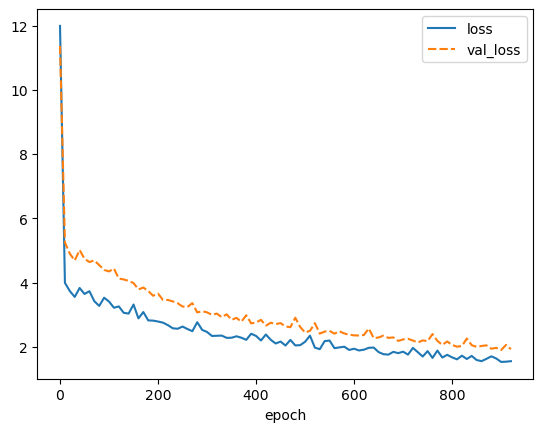

best weights loaded


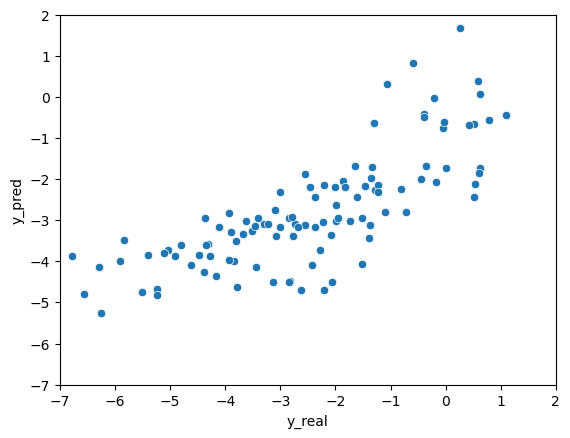

elapsed time: 160.8419439792633
run: 2
{'hidden_channels_list': [64], 'linear_sizes_list': [], 'gcn_layers_list': 1, 'aggregations_list': [<function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807B862640>, <torch.utils.data.dataset.Subset object at 0x000001807B85C280>, <torch.utils.data.dataset.Subset object at 0x000001807B85C670>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
)
Number of parameters:  705
Epoch 0 | Train Loss 10.085845327377319 | Validation Loss 8.847015380859375


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 10 | Train Loss 4.254538949330648 | Validation Loss 5.325273275375366
Epoch 20 | Train Loss 3.657556438446045 | Validation Loss 4.769785642623901
Epoch 30 | Train Loss 3.5295290470123293 | Validation Loss 4.899676322937012
Epoch 40 | Train Loss 3.309252301851908 | Validation Loss 4.428215980529785
Epoch 50 | Train Loss 3.271613423029582 | Validation Loss 4.521838307380676
Epoch 60 | Train Loss 3.338326851526896 | Validation Loss 4.465588569641113
Epoch 70 | Train Loss 3.0522103786468504 | Validation Loss 4.23448371887207
Epoch 80 | Train Loss 3.032495864232381 | Validation Loss 4.095669984817505
Epoch 90 | Train Loss 3.1042671044667562 | Validation Loss 3.9641674757003784
Epoch 100 | Train Loss 3.2031727472941083 | Validation Loss 3.8637359142303467
Epoch 110 | Train Loss 2.8835391759872437 | Validation Loss 3.8803553581237793
Epoch 120 | Train Loss 2.760690116882324 | Validation Loss 3.8694756031036377
Epoch 130 | Train Loss 2.688788827260335 | Validation Loss 3.6690386533737183

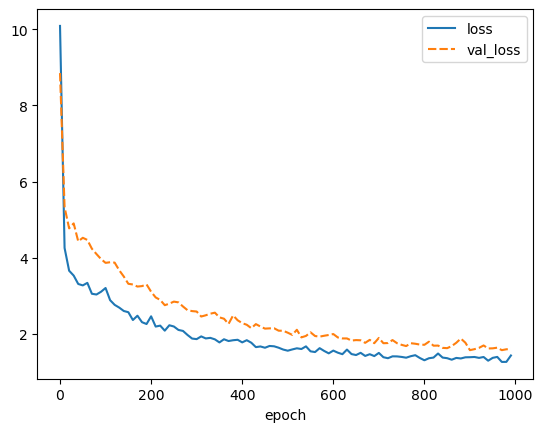

best weights loaded


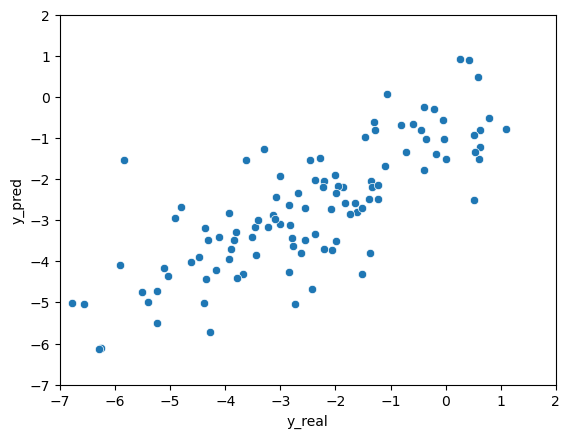

elapsed time: 165.9344494342804
run: 3
{'hidden_channels_list': [64], 'linear_sizes_list': [], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>, <function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807BAF5B80>, <torch.utils.data.dataset.Subset object at 0x00000180D3C77790>, <torch.utils.data.dataset.Subset object at 0x00000180D2735A00>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1): GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=128, out_features=1, bias=True)
)
Number of parameters:  4929
Epoch 0 | Train Loss 8.017916329701741 | Validation Loss 5.453773736953735


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 10 | Train Loss 3.6000719547271727 | Validation Loss 4.667282819747925
Epoch 20 | Train Loss 3.1786972761154173 | Validation Loss 4.349008560180664
Epoch 30 | Train Loss 3.2814529736836753 | Validation Loss 3.9836000204086304
Epoch 40 | Train Loss 2.662520408630371 | Validation Loss 3.5836175680160522
Epoch 50 | Train Loss 2.545797570546468 | Validation Loss 3.6625407934188843
Epoch 60 | Train Loss 2.4754467884699505 | Validation Loss 3.1914315223693848
Epoch 70 | Train Loss 2.2191818714141847 | Validation Loss 2.8352149724960327
Epoch 80 | Train Loss 2.0283646027247113 | Validation Loss 2.5463783740997314
Epoch 90 | Train Loss 1.8854104200998942 | Validation Loss 2.5105429887771606
Epoch 100 | Train Loss 2.057100280125936 | Validation Loss 2.2516143321990967
Epoch 110 | Train Loss 1.6628984133402507 | Validation Loss 2.0661665201187134
Epoch 120 | Train Loss 1.607984964052836 | Validation Loss 1.90755295753479
Epoch 130 | Train Loss 1.5712457696596782 | Validation Loss 1.8429628

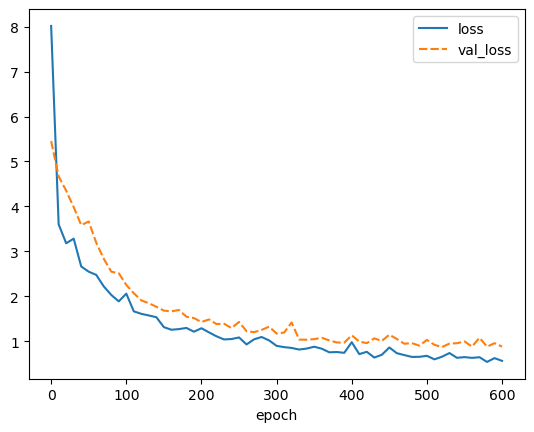

best weights loaded


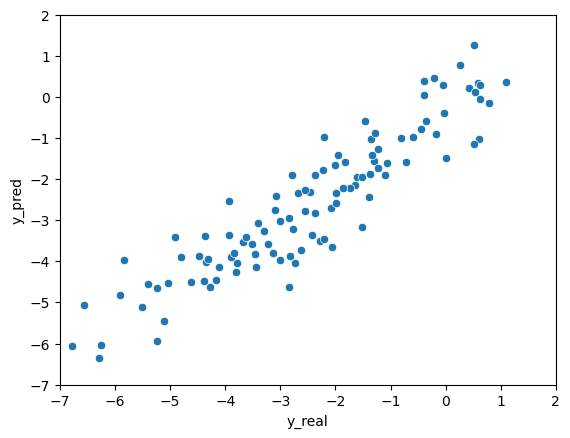

elapsed time: 141.7468466758728
run: 4
{'hidden_channels_list': [64], 'linear_sizes_list': [], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807BA560A0>, <torch.utils.data.dataset.Subset object at 0x00000180D3D71AC0>, <torch.utils.data.dataset.Subset object at 0x00000180D3D771F0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1): GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
)
Number of parameters:  4865


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 8.442011324564616 | Validation Loss 6.2967283725738525
Epoch 10 | Train Loss 3.852365239461263 | Validation Loss 5.03732967376709
Epoch 20 | Train Loss 3.6917423407236734 | Validation Loss 4.834198713302612
Epoch 30 | Train Loss 3.4464708964029946 | Validation Loss 4.420244455337524
Epoch 40 | Train Loss 3.4558032512664796 | Validation Loss 4.374855041503906
Epoch 50 | Train Loss 2.8992550412813825 | Validation Loss 4.230550289154053
Epoch 60 | Train Loss 2.700967796643575 | Validation Loss 3.6067246198654175
Epoch 70 | Train Loss 2.502297027905782 | Validation Loss 2.922321081161499
Epoch 80 | Train Loss 2.405092151959737 | Validation Loss 2.8878273963928223
Epoch 90 | Train Loss 2.15069100856781 | Validation Loss 2.6230196952819824
Epoch 100 | Train Loss 1.8813864608605704 | Validation Loss 2.454204559326172
Epoch 110 | Train Loss 1.792091393470764 | Validation Loss 2.3530969619750977
Epoch 120 | Train Loss 1.7660373051961262 | Validation Loss 2.3522762656211853


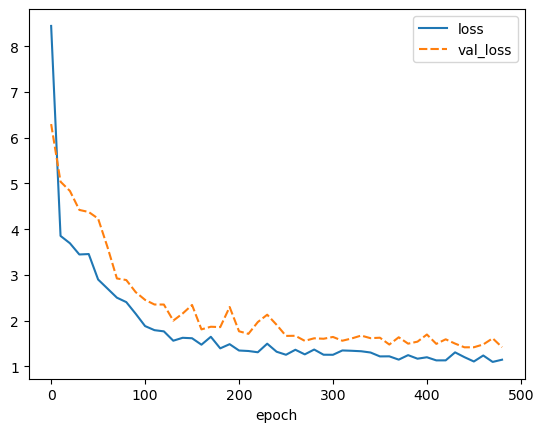

best weights loaded


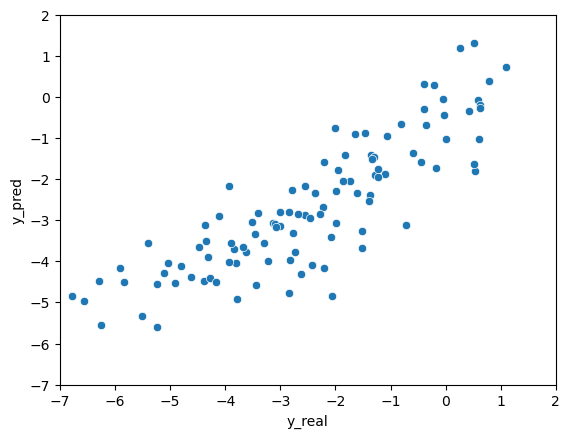

elapsed time: 93.94179224967957
run: 5
{'hidden_channels_list': [64], 'linear_sizes_list': [], 'gcn_layers_list': 2, 'aggregations_list': [<function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807BAF5940>, <torch.utils.data.dataset.Subset object at 0x000001807B812610>, <torch.utils.data.dataset.Subset object at 0x000001807B812220>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1): GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
)
Number of parameters:  4865


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 7.523309357961019 | Validation Loss 6.045846223831177
Epoch 10 | Train Loss 3.6473109245300295 | Validation Loss 4.928213119506836
Epoch 20 | Train Loss 3.3962494214375814 | Validation Loss 4.479969024658203
Epoch 30 | Train Loss 3.2095027923583985 | Validation Loss 4.222147822380066
Epoch 40 | Train Loss 2.878906246026357 | Validation Loss 4.078615188598633
Epoch 50 | Train Loss 2.8470181465148925 | Validation Loss 3.8420907258987427
Epoch 60 | Train Loss 2.511765225728353 | Validation Loss 3.5263619422912598
Epoch 70 | Train Loss 2.4046785036722818 | Validation Loss 3.1107492446899414
Epoch 80 | Train Loss 2.10158166885376 | Validation Loss 2.84459912776947
Epoch 90 | Train Loss 2.067585023244222 | Validation Loss 2.7835469245910645
Epoch 100 | Train Loss 2.134785787264506 | Validation Loss 2.5831382274627686
Epoch 110 | Train Loss 1.7696162462234497 | Validation Loss 2.5702674984931946
Epoch 120 | Train Loss 1.704765256245931 | Validation Loss 2.0256710052490234

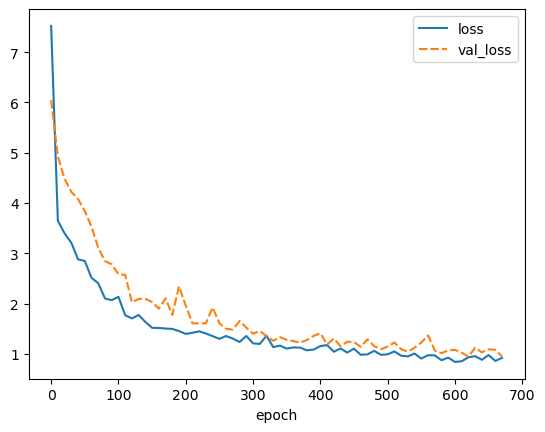

best weights loaded


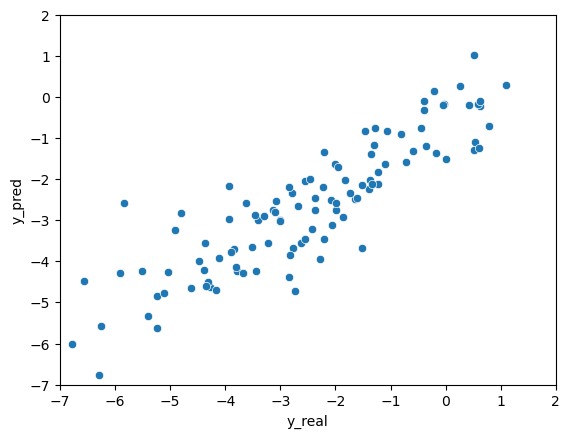

elapsed time: 127.87671065330505
run: 6
{'hidden_channels_list': [64], 'linear_sizes_list': [], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>, <function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807BA32460>, <torch.utils.data.dataset.Subset object at 0x00000180D3D8FA00>, <torch.utils.data.dataset.Subset object at 0x00000180D3D95280>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-2): 2 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=128, out_features=1, bias=True)
)
Number of parameters:  9089


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 9.071337668100993 | Validation Loss 5.861073732376099
Epoch 10 | Train Loss 3.4784977277119955 | Validation Loss 4.636568307876587
Epoch 20 | Train Loss 3.4551539103190105 | Validation Loss 4.592852592468262
Epoch 30 | Train Loss 2.753250233332316 | Validation Loss 3.590054750442505
Epoch 40 | Train Loss 2.30942907333374 | Validation Loss 3.1927084922790527
Epoch 50 | Train Loss 2.1918376525243124 | Validation Loss 2.5826725363731384
Epoch 60 | Train Loss 1.8218669652938844 | Validation Loss 2.2585768699645996
Epoch 70 | Train Loss 1.8220924377441405 | Validation Loss 1.9061199426651
Epoch 80 | Train Loss 1.4714433034261067 | Validation Loss 1.701496183872223
Epoch 90 | Train Loss 1.3429436127344767 | Validation Loss 1.7183579802513123
Epoch 100 | Train Loss 1.5141810178756714 | Validation Loss 2.0598936080932617
Epoch 110 | Train Loss 1.3330618381500243 | Validation Loss 1.5731709599494934
Epoch 120 | Train Loss 1.2698500394821166 | Validation Loss 2.2431650161743

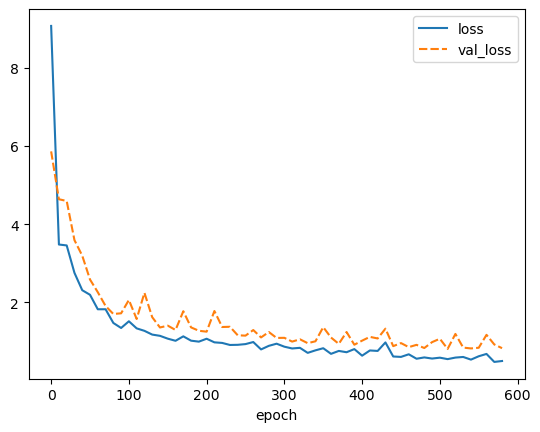

best weights loaded


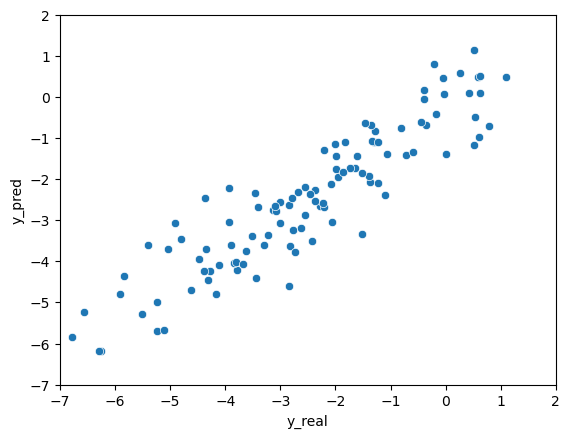

elapsed time: 113.08421754837036
run: 7
{'hidden_channels_list': [64], 'linear_sizes_list': [], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807BB54EE0>, <torch.utils.data.dataset.Subset object at 0x000001807B812F40>, <torch.utils.data.dataset.Subset object at 0x000001807B812B20>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-2): 2 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
)
Number of parameters:  9025


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 10.867637761433919 | Validation Loss 9.385356903076172
Epoch 10 | Train Loss 3.8462788263956704 | Validation Loss 4.976433992385864
Epoch 20 | Train Loss 3.6654052257537844 | Validation Loss 4.706065654754639
Epoch 30 | Train Loss 3.1713650385538736 | Validation Loss 3.8605083227157593
Epoch 40 | Train Loss 2.735656801859538 | Validation Loss 3.484185576438904
Epoch 50 | Train Loss 2.3413101037343345 | Validation Loss 3.1557087898254395
Epoch 60 | Train Loss 2.138147735595703 | Validation Loss 2.7368167638778687
Epoch 70 | Train Loss 2.2478293498357136 | Validation Loss 3.02567982673645
Epoch 80 | Train Loss 1.6878519097963969 | Validation Loss 3.1322847604751587
Epoch 90 | Train Loss 1.7246944030125937 | Validation Loss 1.9372883439064026
Epoch 100 | Train Loss 1.4882574518521627 | Validation Loss 1.8336598873138428
Epoch 110 | Train Loss 1.585145616531372 | Validation Loss 1.9719417691230774
Epoch 120 | Train Loss 1.3894266366958619 | Validation Loss 1.8962929546

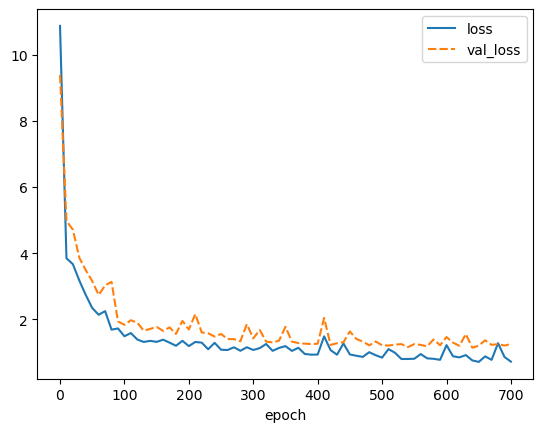

best weights loaded


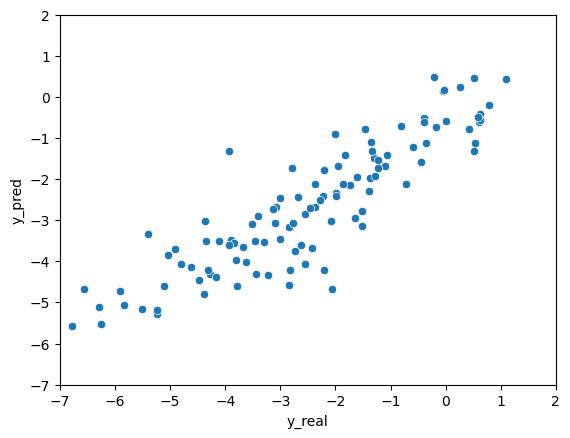

elapsed time: 135.57454442977905
run: 8
{'hidden_channels_list': [64], 'linear_sizes_list': [], 'gcn_layers_list': 3, 'aggregations_list': [<function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807BA6DAF0>, <torch.utils.data.dataset.Subset object at 0x000001807CFC27F0>, <torch.utils.data.dataset.Subset object at 0x000001807CFC2CD0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-2): 2 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
)
Number of parameters:  9025


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 8.006739489237468 | Validation Loss 5.621147155761719
Epoch 10 | Train Loss 3.5713392893473306 | Validation Loss 4.814934730529785
Epoch 20 | Train Loss 3.098095154762268 | Validation Loss 4.255072593688965
Epoch 30 | Train Loss 2.778792158762614 | Validation Loss 3.6125468015670776
Epoch 40 | Train Loss 2.646077863375346 | Validation Loss 4.078805685043335
Epoch 50 | Train Loss 2.5232263565063477 | Validation Loss 2.8633612394332886
Epoch 60 | Train Loss 2.0263822078704834 | Validation Loss 2.5999302864074707
Epoch 70 | Train Loss 1.7759766260782877 | Validation Loss 2.3112136125564575
Epoch 80 | Train Loss 1.8178367614746094 | Validation Loss 1.9592531323432922
Epoch 90 | Train Loss 1.7326324383417766 | Validation Loss 1.9724035263061523
Epoch 100 | Train Loss 1.8646568814913431 | Validation Loss 2.7013285160064697
Epoch 110 | Train Loss 1.3413671652475994 | Validation Loss 1.679814338684082
Epoch 120 | Train Loss 1.4367373863855997 | Validation Loss 1.5984614491

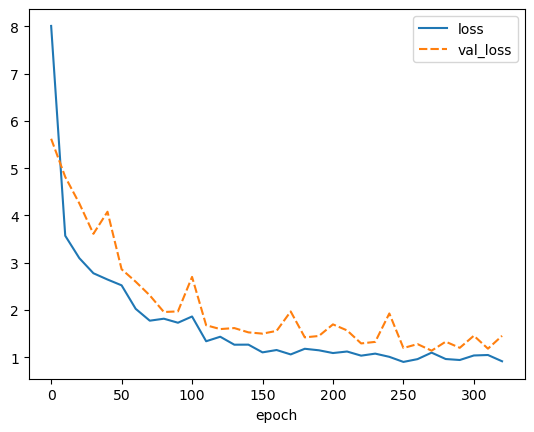

best weights loaded


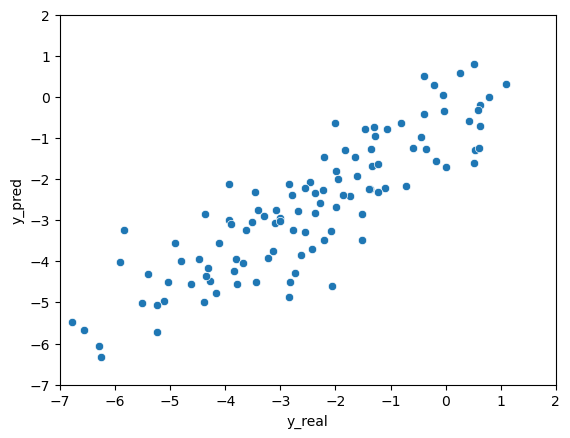

elapsed time: 61.50666308403015
run: 9
{'hidden_channels_list': [64], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>, <function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807B969F40>, <torch.utils.data.dataset.Subset object at 0x000001807B952640>, <torch.utils.data.dataset.Subset object at 0x000001807CD79F40>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-3): 3 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=128, out_features=1, bias=True)
)
Number of parameters:  13249


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 7.585176253318787 | Validation Loss 5.730982542037964
Epoch 10 | Train Loss 3.4864552577336627 | Validation Loss 4.556344985961914
Epoch 20 | Train Loss 3.0901493946711223 | Validation Loss 3.9817503690719604
Epoch 30 | Train Loss 2.4370045900344848 | Validation Loss 3.4077553749084473
Epoch 40 | Train Loss 2.350179735819499 | Validation Loss 2.561415195465088
Epoch 50 | Train Loss 1.773543115456899 | Validation Loss 1.9182833433151245
Epoch 60 | Train Loss 2.250096408526103 | Validation Loss 1.9090707898139954
Epoch 70 | Train Loss 1.486320185661316 | Validation Loss 1.8592690825462341
Epoch 80 | Train Loss 1.4533403158187865 | Validation Loss 1.6054928302764893
Epoch 90 | Train Loss 1.2409964561462403 | Validation Loss 1.4501162767410278
Epoch 100 | Train Loss 1.324312937259674 | Validation Loss 1.5696174502372742
Epoch 110 | Train Loss 1.3021510124206543 | Validation Loss 1.3590083420276642
Epoch 120 | Train Loss 1.2696003238360087 | Validation Loss 1.3540443778

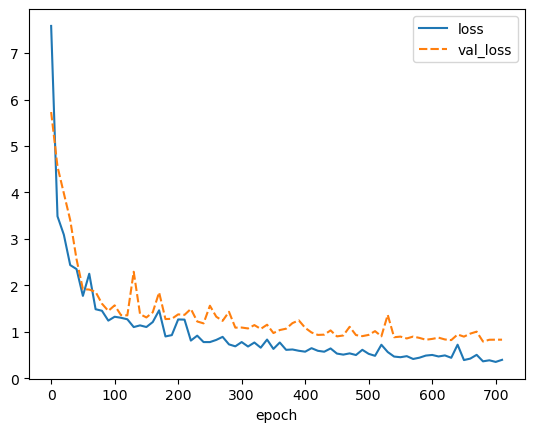

best weights loaded


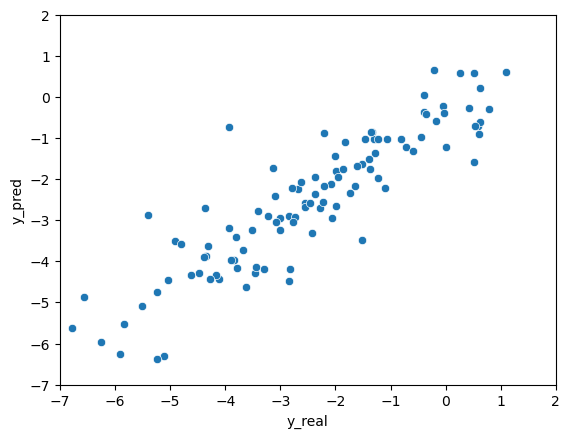

elapsed time: 166.4134440422058
run: 10
{'hidden_channels_list': [64], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807BB7E520>, <torch.utils.data.dataset.Subset object at 0x00000180D3D7A100>, <torch.utils.data.dataset.Subset object at 0x00000180D3D7A610>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-3): 3 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
)
Number of parameters:  13185


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 10.486391003926595 | Validation Loss 8.937999248504639
Epoch 10 | Train Loss 3.7668755849202475 | Validation Loss 5.061566472053528
Epoch 20 | Train Loss 3.215424108505249 | Validation Loss 4.1886866092681885
Epoch 30 | Train Loss 2.643198108673096 | Validation Loss 3.170876383781433
Epoch 40 | Train Loss 2.0123544057210285 | Validation Loss 2.398314118385315
Epoch 50 | Train Loss 1.5658405681451162 | Validation Loss 2.2563565969467163
Epoch 60 | Train Loss 1.4963488737742106 | Validation Loss 2.0972670316696167
Epoch 70 | Train Loss 1.4479344407717387 | Validation Loss 1.819723904132843
Epoch 80 | Train Loss 1.4561008095741272 | Validation Loss 1.7133278846740723
Epoch 90 | Train Loss 1.1855346471071244 | Validation Loss 1.7316553592681885
Epoch 100 | Train Loss 1.3312666416168213 | Validation Loss 1.6271747946739197
Epoch 110 | Train Loss 1.2447301308314005 | Validation Loss 1.7545278072357178
Epoch 120 | Train Loss 1.4588179032007853 | Validation Loss 1.77263218

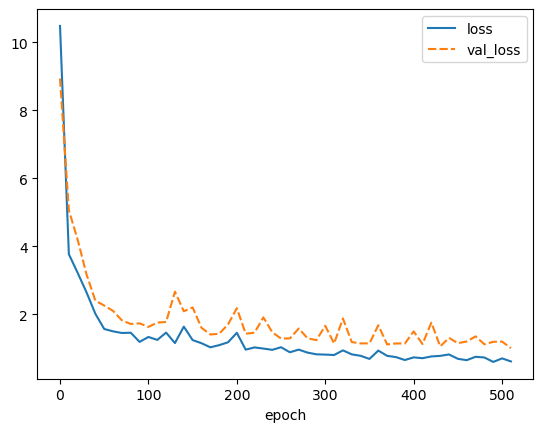

best weights loaded


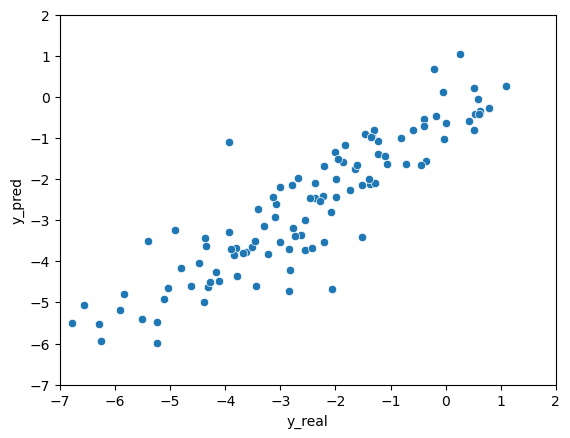

elapsed time: 123.17934942245483
run: 11
{'hidden_channels_list': [64], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807BC72B50>, <torch.utils.data.dataset.Subset object at 0x00000180D3B178B0>, <torch.utils.data.dataset.Subset object at 0x000001807B830370>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-3): 3 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
)
Number of parameters:  13185


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 8.47024326324463 | Validation Loss 5.582926511764526
Epoch 10 | Train Loss 3.8006421089172364 | Validation Loss 4.8334479331970215
Epoch 20 | Train Loss 3.3336857636769612 | Validation Loss 4.696288585662842
Epoch 30 | Train Loss 2.9668776671091717 | Validation Loss 4.1408469676971436
Epoch 40 | Train Loss 2.3327707052230835 | Validation Loss 2.599727749824524
Epoch 50 | Train Loss 2.2896846850713093 | Validation Loss 2.4202862977981567
Epoch 60 | Train Loss 1.757842191060384 | Validation Loss 2.4093180894851685
Epoch 70 | Train Loss 1.559913976987203 | Validation Loss 2.21983003616333
Epoch 80 | Train Loss 1.853827921549479 | Validation Loss 2.6434184312820435
Epoch 90 | Train Loss 1.5404754082361858 | Validation Loss 1.6824802160263062
Epoch 100 | Train Loss 1.5057844797770181 | Validation Loss 1.7445847988128662
Epoch 110 | Train Loss 1.4678524255752563 | Validation Loss 1.883281409740448
Epoch 120 | Train Loss 1.2006927728652954 | Validation Loss 1.615118503570

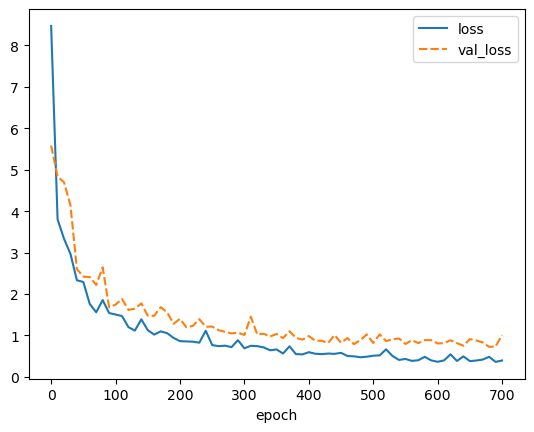

best weights loaded


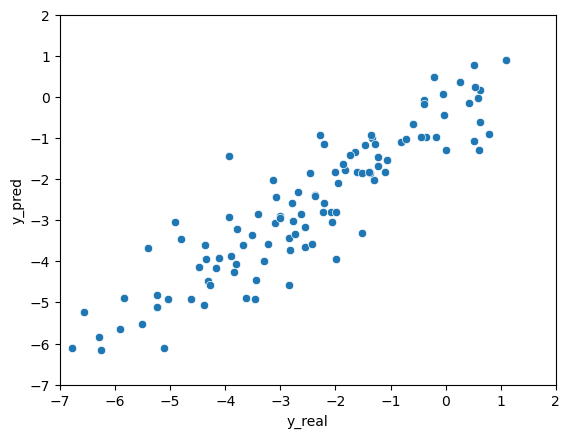

elapsed time: 159.36079049110413
run: 12
{'hidden_channels_list': [64], 'linear_sizes_list': [512], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>, <function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807BB4F310>, <torch.utils.data.dataset.Subset object at 0x00000180D3CA3BE0>, <torch.utils.data.dataset.Subset object at 0x00000180D3CAC130>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=128, out_features=1, bias=True)
)
Number of parameters:  769
Epoch 0 | Train Loss 10.803345076243083 | Validation Loss 7.7739338874816895


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 10 | Train Loss 3.9510921478271483 | Validation Loss 5.222634315490723
Epoch 20 | Train Loss 3.3344912846883137 | Validation Loss 4.590782642364502
Epoch 30 | Train Loss 3.267113995552063 | Validation Loss 4.581958651542664
Epoch 40 | Train Loss 3.5349599838256838 | Validation Loss 4.192536950111389
Epoch 50 | Train Loss 3.107818579673767 | Validation Loss 4.200536251068115
Epoch 60 | Train Loss 3.03375023206075 | Validation Loss 3.9562485218048096
Epoch 70 | Train Loss 2.8647573153177897 | Validation Loss 3.9350916147232056
Epoch 80 | Train Loss 2.784491952260335 | Validation Loss 3.8488593101501465
Epoch 90 | Train Loss 2.6347832679748535 | Validation Loss 3.5702630281448364
Epoch 100 | Train Loss 2.661078103383382 | Validation Loss 3.419000029563904
Epoch 110 | Train Loss 2.541694450378418 | Validation Loss 3.3566242456436157
Epoch 120 | Train Loss 2.370401310920715 | Validation Loss 3.0967706441879272
Epoch 130 | Train Loss 2.6356241941452025 | Validation Loss 2.9794754981994

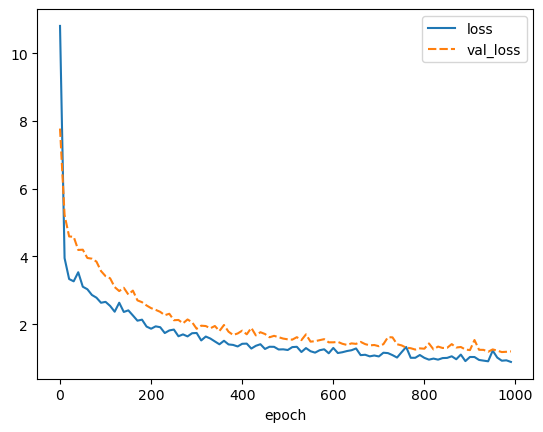

best weights loaded


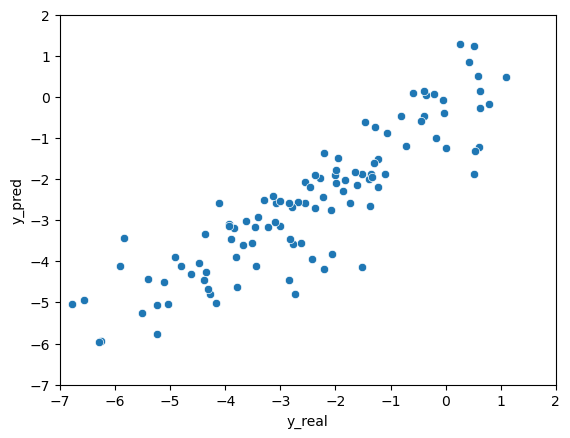

elapsed time: 157.72912096977234
run: 13
{'hidden_channels_list': [64], 'linear_sizes_list': [512], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807BA734F0>, <torch.utils.data.dataset.Subset object at 0x000001807BAA9C10>, <torch.utils.data.dataset.Subset object at 0x000001807BAA9070>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
)
Number of parameters:  705
Epoch 0 | Train Loss 6.996757523218791 | Validation Loss 7.468213081359863


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 10 | Train Loss 4.24231923421224 | Validation Loss 5.068582057952881
Epoch 20 | Train Loss 3.7508718808492025 | Validation Loss 5.034830808639526
Epoch 30 | Train Loss 3.562601661682129 | Validation Loss 4.819396734237671
Epoch 40 | Train Loss 3.529785092671712 | Validation Loss 4.794220209121704
Epoch 50 | Train Loss 3.478808816274007 | Validation Loss 4.692931175231934
Epoch 60 | Train Loss 3.3800132592519123 | Validation Loss 4.616612195968628
Epoch 70 | Train Loss 3.519890371958415 | Validation Loss 4.5216169357299805
Epoch 80 | Train Loss 3.5083926995595296 | Validation Loss 4.344616055488586
Epoch 90 | Train Loss 3.3864763418833417 | Validation Loss 4.43724000453949
Epoch 100 | Train Loss 3.425441106160482 | Validation Loss 4.119927525520325
Epoch 110 | Train Loss 3.1741882006327313 | Validation Loss 4.085100173950195
Epoch 120 | Train Loss 3.148056689898173 | Validation Loss 4.179112553596497
Epoch 130 | Train Loss 3.0497916380564374 | Validation Loss 3.9013113975524902
Ep

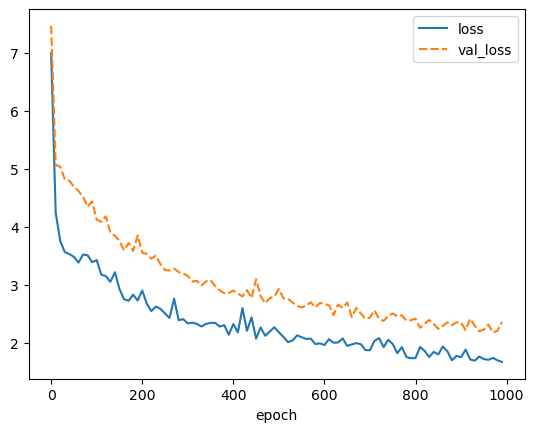

best weights loaded


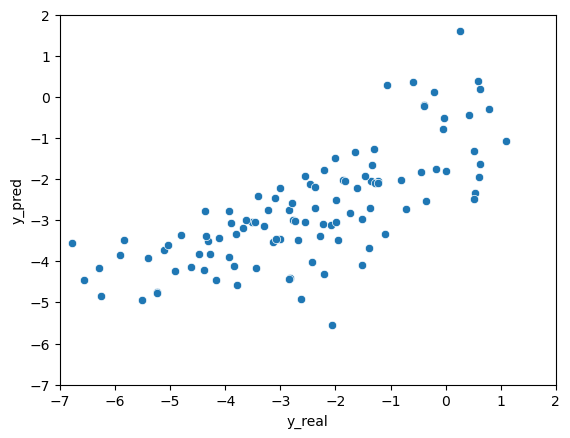

elapsed time: 147.32967853546143
run: 14
{'hidden_channels_list': [64], 'linear_sizes_list': [512], 'gcn_layers_list': 1, 'aggregations_list': [<function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807BAC18B0>, <torch.utils.data.dataset.Subset object at 0x00000180D3D92340>, <torch.utils.data.dataset.Subset object at 0x00000180D3DA9880>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
)
Number of parameters:  705


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 17.309072303771973 | Validation Loss 13.387064456939697
Epoch 10 | Train Loss 3.7105925997098286 | Validation Loss 5.313336133956909
Epoch 20 | Train Loss 3.556160004933675 | Validation Loss 4.809762597084045
Epoch 30 | Train Loss 3.5098912715911865 | Validation Loss 4.559998989105225
Epoch 40 | Train Loss 3.2354620854059855 | Validation Loss 4.6213178634643555
Epoch 50 | Train Loss 3.231825574239095 | Validation Loss 4.634310364723206
Epoch 60 | Train Loss 3.4157465140024823 | Validation Loss 4.4183549880981445
Epoch 70 | Train Loss 3.130489190419515 | Validation Loss 4.161390423774719
Epoch 80 | Train Loss 3.39368789990743 | Validation Loss 4.255586624145508
Epoch 90 | Train Loss 2.9960400104522704 | Validation Loss 4.06333327293396
Epoch 100 | Train Loss 2.9759300788243612 | Validation Loss 4.175644755363464
Epoch 110 | Train Loss 2.9145379861195884 | Validation Loss 3.934625029563904
Epoch 120 | Train Loss 2.927453962961833 | Validation Loss 3.6823315620422363


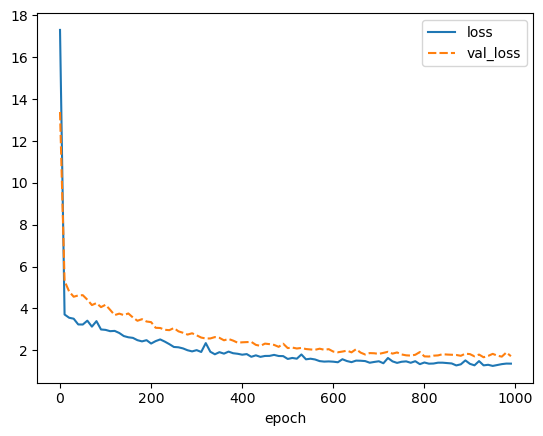

best weights loaded


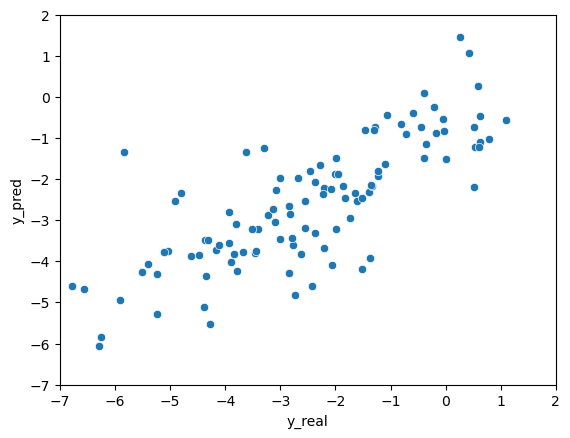

elapsed time: 151.70299196243286
run: 15
{'hidden_channels_list': [64], 'linear_sizes_list': [512], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>, <function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000180D39C96D0>, <torch.utils.data.dataset.Subset object at 0x000001807B837F10>, <torch.utils.data.dataset.Subset object at 0x000001807B837880>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1): GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=128, out_features=1, bias=True)
)
Number of parameters:  4929


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.539815362294515 | Validation Loss 5.540555477142334
Epoch 10 | Train Loss 3.6381433486938475 | Validation Loss 4.6606855392456055
Epoch 20 | Train Loss 3.121250279744466 | Validation Loss 4.298864126205444
Epoch 30 | Train Loss 2.953576151529948 | Validation Loss 3.6595959663391113
Epoch 40 | Train Loss 2.5482625404993695 | Validation Loss 3.5589044094085693
Epoch 50 | Train Loss 2.3388549009958903 | Validation Loss 2.9407695531845093
Epoch 60 | Train Loss 2.067478823661804 | Validation Loss 2.69321870803833
Epoch 70 | Train Loss 2.014278189341227 | Validation Loss 2.4895087480545044
Epoch 80 | Train Loss 1.8892570892969767 | Validation Loss 2.3917253017425537
Epoch 90 | Train Loss 1.7863931814829508 | Validation Loss 2.0593396425247192
Epoch 100 | Train Loss 1.6257220735152562 | Validation Loss 2.023649036884308
Epoch 110 | Train Loss 1.6736879189809164 | Validation Loss 2.0043857097625732
Epoch 120 | Train Loss 1.5448434193929037 | Validation Loss 2.01987487077

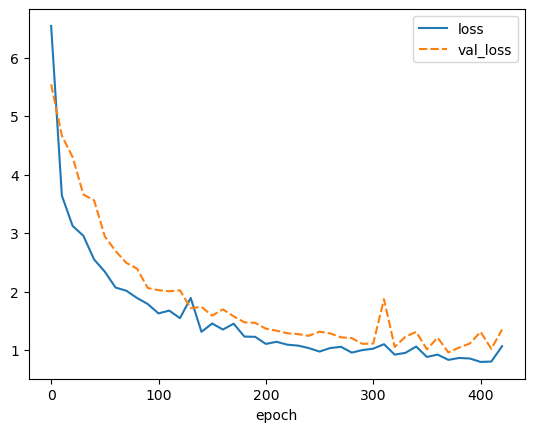

best weights loaded


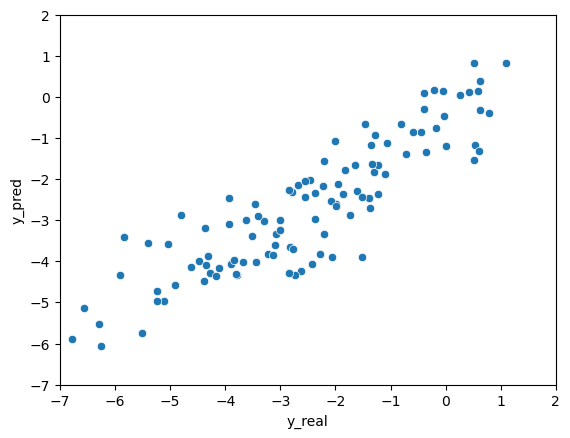

elapsed time: 81.05938172340393
run: 16
{'hidden_channels_list': [64], 'linear_sizes_list': [512], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000180D39A0BB0>, <torch.utils.data.dataset.Subset object at 0x00000180D3DDB430>, <torch.utils.data.dataset.Subset object at 0x00000180D3DDB790>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1): GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
)
Number of parameters:  4865
Epoch 0 | Train Loss 9.903371938069661 | Validation Loss 7.570795297622681


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 10 | Train Loss 3.844715881347656 | Validation Loss 5.239077806472778
Epoch 20 | Train Loss 3.5755459785461428 | Validation Loss 4.982708930969238
Epoch 30 | Train Loss 3.3569644530614218 | Validation Loss 4.539457082748413
Epoch 40 | Train Loss 3.2853976329167685 | Validation Loss 4.604793548583984
Epoch 50 | Train Loss 3.44705646832784 | Validation Loss 4.440782070159912
Epoch 60 | Train Loss 3.2022223631540934 | Validation Loss 4.131296396255493
Epoch 70 | Train Loss 3.1137784163157147 | Validation Loss 3.8601245880126953
Epoch 80 | Train Loss 2.886532775561015 | Validation Loss 4.019486665725708
Epoch 90 | Train Loss 2.7044406970342 | Validation Loss 3.7740797996520996
Epoch 100 | Train Loss 2.6978692213694253 | Validation Loss 3.4149885177612305
Epoch 110 | Train Loss 2.6217305501302084 | Validation Loss 3.448163151741028
Epoch 120 | Train Loss 2.3719062566757203 | Validation Loss 3.192450523376465
Epoch 130 | Train Loss 2.3567022403081257 | Validation Loss 2.92200243473053


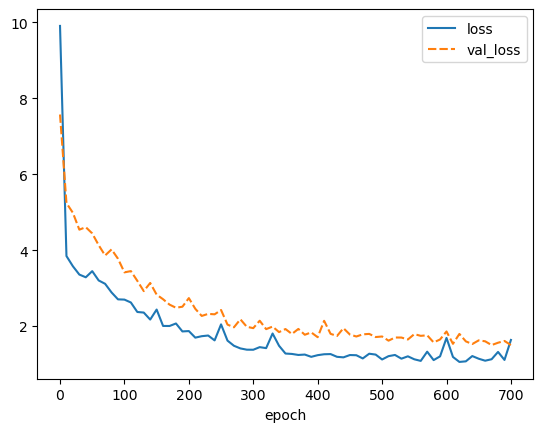

best weights loaded


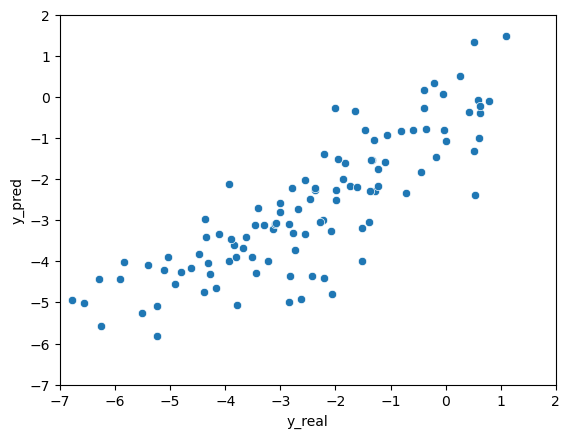

elapsed time: 140.38668870925903
run: 17
{'hidden_channels_list': [64], 'linear_sizes_list': [512], 'gcn_layers_list': 2, 'aggregations_list': [<function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807B9B7DF0>, <torch.utils.data.dataset.Subset object at 0x000001807BAC6D60>, <torch.utils.data.dataset.Subset object at 0x000001807BAC6190>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1): GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
)
Number of parameters:  4865


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 10.937095991770427 | Validation Loss 8.756391286849976
Epoch 10 | Train Loss 4.0572123527526855 | Validation Loss 5.118267774581909
Epoch 20 | Train Loss 3.3803433100382487 | Validation Loss 4.618630647659302
Epoch 30 | Train Loss 3.582227929433187 | Validation Loss 4.414857506752014
Epoch 40 | Train Loss 3.2637704849243163 | Validation Loss 4.187830328941345
Epoch 50 | Train Loss 2.904146416982015 | Validation Loss 3.949346661567688
Epoch 60 | Train Loss 2.79150595664978 | Validation Loss 3.8547770977020264
Epoch 70 | Train Loss 2.736814085642497 | Validation Loss 3.574034810066223
Epoch 80 | Train Loss 2.5186328649520875 | Validation Loss 3.549862861633301
Epoch 90 | Train Loss 2.6422971566518147 | Validation Loss 3.1741783618927
Epoch 100 | Train Loss 2.242486667633057 | Validation Loss 2.9574646949768066
Epoch 110 | Train Loss 2.1236879269282025 | Validation Loss 2.946120262145996
Epoch 120 | Train Loss 2.086442009607951 | Validation Loss 2.7744569778442383
Epo

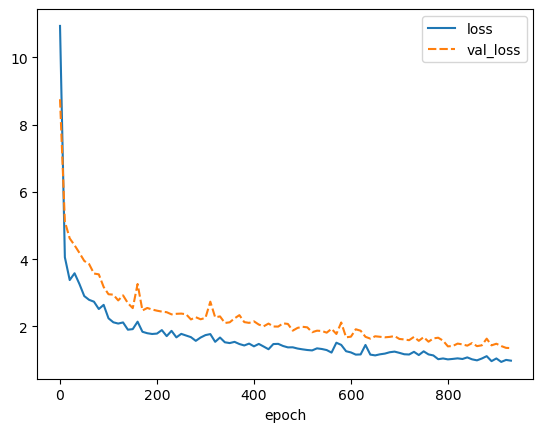

best weights loaded


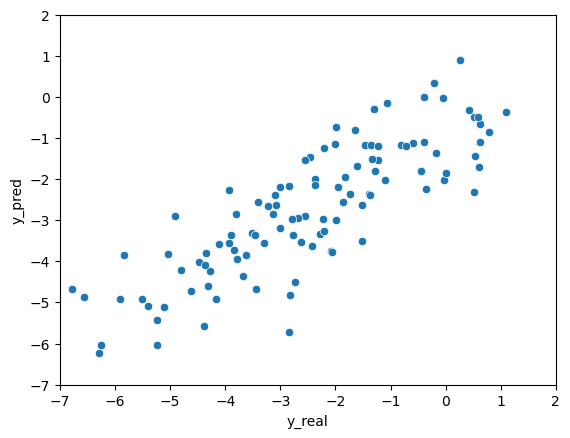

elapsed time: 218.82394862174988
run: 18
{'hidden_channels_list': [64], 'linear_sizes_list': [512], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>, <function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000180D3A293D0>, <torch.utils.data.dataset.Subset object at 0x00000180D3D616D0>, <torch.utils.data.dataset.Subset object at 0x00000180D3D7EB80>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-2): 2 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=128, out_features=1, bias=True)
)
Number of parameters:  9089


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 7.387247435251871 | Validation Loss 5.557563543319702
Epoch 10 | Train Loss 3.8205079237620034 | Validation Loss 4.97403621673584
Epoch 20 | Train Loss 3.240462001164754 | Validation Loss 4.376025438308716
Epoch 30 | Train Loss 3.07423833211263 | Validation Loss 3.591504454612732
Epoch 40 | Train Loss 2.3982269763946533 | Validation Loss 3.0944271087646484
Epoch 50 | Train Loss 2.323165003458659 | Validation Loss 2.705517292022705
Epoch 60 | Train Loss 2.1081140915552776 | Validation Loss 2.5749353170394897
Epoch 70 | Train Loss 2.129747414588928 | Validation Loss 2.302728533744812
Epoch 80 | Train Loss 1.7174224932988484 | Validation Loss 2.5556750297546387
Epoch 90 | Train Loss 1.4620448350906372 | Validation Loss 2.1971884965896606
Epoch 100 | Train Loss 1.4061185677846273 | Validation Loss 2.211186647415161
Epoch 110 | Train Loss 1.3549636284510294 | Validation Loss 1.731884479522705
Epoch 120 | Train Loss 1.1938973744710286 | Validation Loss 1.6058245301246643

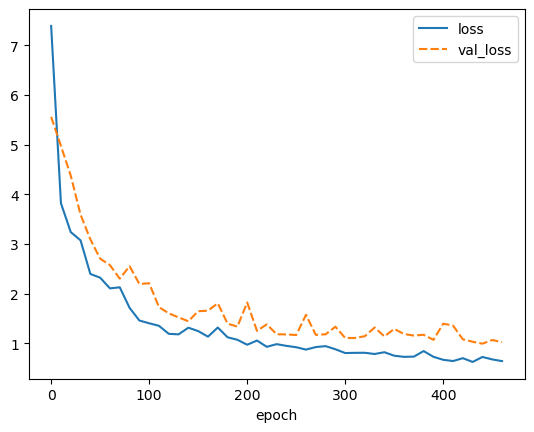

best weights loaded


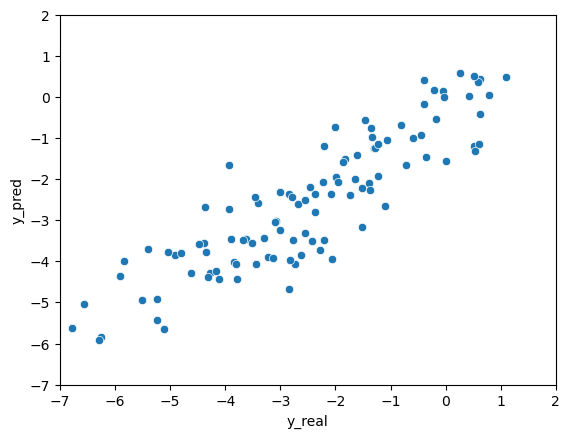

elapsed time: 127.57513213157654
run: 19
{'hidden_channels_list': [64], 'linear_sizes_list': [512], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000180D3AC8D00>, <torch.utils.data.dataset.Subset object at 0x00000180D38E23D0>, <torch.utils.data.dataset.Subset object at 0x00000180D38E2640>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-2): 2 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
)
Number of parameters:  9025


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 12.221999104817709 | Validation Loss 10.100411415100098
Epoch 10 | Train Loss 3.798665157953898 | Validation Loss 5.234227657318115
Epoch 20 | Train Loss 3.486334943771362 | Validation Loss 4.976822376251221
Epoch 30 | Train Loss 3.460470453898112 | Validation Loss 4.528756618499756
Epoch 40 | Train Loss 3.3165653308232623 | Validation Loss 4.681465983390808
Epoch 50 | Train Loss 3.41640575726827 | Validation Loss 4.0498305559158325
Epoch 60 | Train Loss 3.0125704129536945 | Validation Loss 3.7328622341156006
Epoch 70 | Train Loss 2.619396464029948 | Validation Loss 3.8380874395370483
Epoch 80 | Train Loss 2.5168114503224692 | Validation Loss 3.0064659118652344
Epoch 90 | Train Loss 2.2578678925832114 | Validation Loss 2.8601404428482056
Epoch 100 | Train Loss 2.189988605181376 | Validation Loss 4.037429928779602
Epoch 110 | Train Loss 1.9490555763244628 | Validation Loss 2.4747631549835205
Epoch 120 | Train Loss 1.8219202041625977 | Validation Loss 3.4635004997253

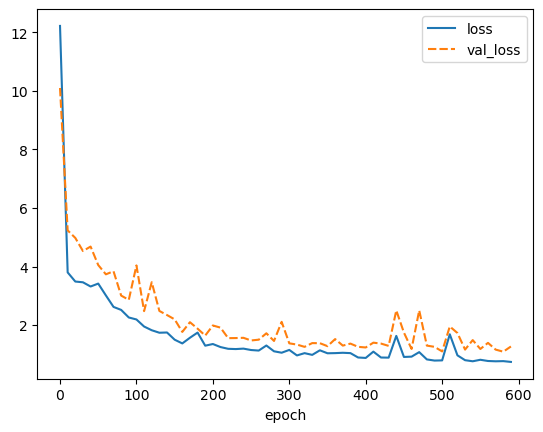

best weights loaded


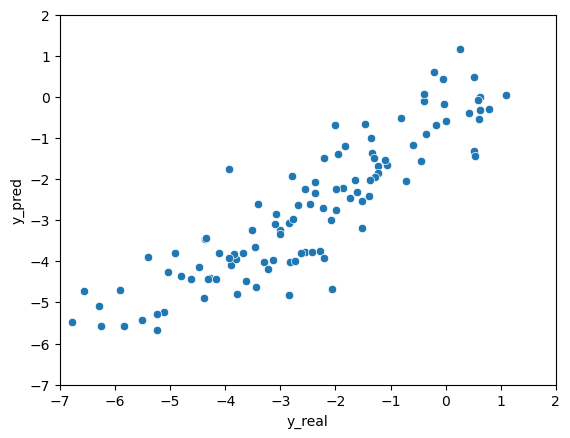

elapsed time: 151.038920879364
run: 20
{'hidden_channels_list': [64], 'linear_sizes_list': [512], 'gcn_layers_list': 3, 'aggregations_list': [<function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807BA15520>, <torch.utils.data.dataset.Subset object at 0x000001807BA972B0>, <torch.utils.data.dataset.Subset object at 0x000001807BA97D60>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-2): 2 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
)
Number of parameters:  9025


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 7.397045771280925 | Validation Loss 5.513144493103027
Epoch 10 | Train Loss 3.546426788965861 | Validation Loss 4.796755075454712
Epoch 20 | Train Loss 3.294850810368856 | Validation Loss 4.026064872741699
Epoch 30 | Train Loss 2.628628432750702 | Validation Loss 3.4167189598083496
Epoch 40 | Train Loss 2.4821911573410036 | Validation Loss 2.9414223432540894
Epoch 50 | Train Loss 2.146584709485372 | Validation Loss 2.7756951451301575
Epoch 60 | Train Loss 1.975154948234558 | Validation Loss 2.4791932702064514
Epoch 70 | Train Loss 1.7258748610814412 | Validation Loss 2.0870492458343506
Epoch 80 | Train Loss 1.5617850144704184 | Validation Loss 2.2180804014205933
Epoch 90 | Train Loss 1.533161958058675 | Validation Loss 2.2119879722595215
Epoch 100 | Train Loss 1.7393958965937297 | Validation Loss 1.8163536190986633
Epoch 110 | Train Loss 1.5610548595587412 | Validation Loss 1.8196210265159607
Epoch 120 | Train Loss 1.2848660151163738 | Validation Loss 1.59336358308

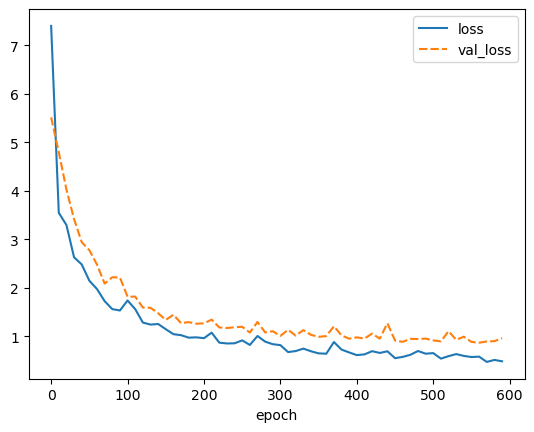

best weights loaded


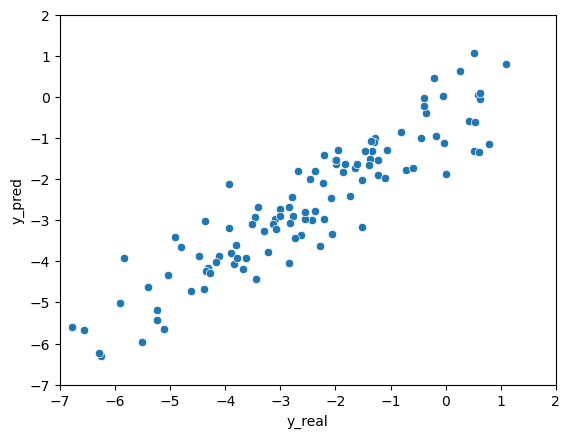

elapsed time: 156.79406547546387
run: 21
{'hidden_channels_list': [64], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>, <function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000180D3A8B550>, <torch.utils.data.dataset.Subset object at 0x00000180D3EAB700>, <torch.utils.data.dataset.Subset object at 0x00000180D3EABBE0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-3): 3 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=128, out_features=1, bias=True)
)
Number of parameters:  13249


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 8.63541309038798 | Validation Loss 5.705977201461792
Epoch 10 | Train Loss 3.4929034392038982 | Validation Loss 4.570754051208496
Epoch 20 | Train Loss 3.098949416478475 | Validation Loss 3.9321651458740234
Epoch 30 | Train Loss 2.3962560892105103 | Validation Loss 2.8846027851104736
Epoch 40 | Train Loss 1.957086936632792 | Validation Loss 2.3642035722732544
Epoch 50 | Train Loss 1.868465240796407 | Validation Loss 2.0553446412086487
Epoch 60 | Train Loss 1.509565563996633 | Validation Loss 2.157940983772278
Epoch 70 | Train Loss 1.4188287734985352 | Validation Loss 1.8256823420524597
Epoch 80 | Train Loss 1.3911406675974527 | Validation Loss 1.7633665204048157
Epoch 90 | Train Loss 1.5170483986536663 | Validation Loss 1.5711466670036316
Epoch 100 | Train Loss 1.4667237838109335 | Validation Loss 1.6092422008514404
Epoch 110 | Train Loss 1.2586305737495422 | Validation Loss 1.5702921748161316
Epoch 120 | Train Loss 1.2371575673421225 | Validation Loss 1.4707235097

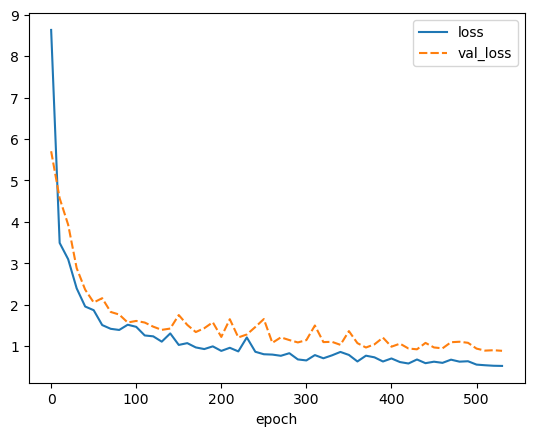

best weights loaded


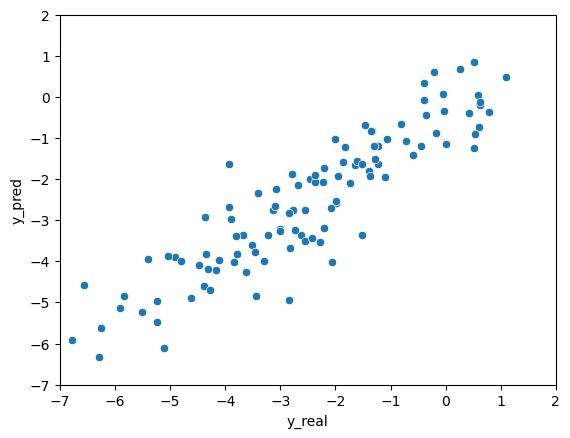

elapsed time: 176.9735505580902
run: 22
{'hidden_channels_list': [64], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807B9F1070>, <torch.utils.data.dataset.Subset object at 0x000001807BA97AC0>, <torch.utils.data.dataset.Subset object at 0x000001807BA97B80>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-3): 3 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
)
Number of parameters:  13185


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 10.80317155122757 | Validation Loss 9.282291412353516
Epoch 10 | Train Loss 3.5184470812479653 | Validation Loss 4.864704370498657
Epoch 20 | Train Loss 3.29981050491333 | Validation Loss 4.274874448776245
Epoch 30 | Train Loss 2.5624324043591815 | Validation Loss 4.514179229736328
Epoch 40 | Train Loss 2.2339854915936788 | Validation Loss 2.7826178073883057
Epoch 50 | Train Loss 2.027643084526062 | Validation Loss 2.645759105682373
Epoch 60 | Train Loss 1.8486933310826619 | Validation Loss 2.8036481142044067
Epoch 70 | Train Loss 2.146607522169749 | Validation Loss 2.241186559200287
Epoch 80 | Train Loss 1.5197057326634724 | Validation Loss 2.958933711051941
Epoch 90 | Train Loss 1.3668810327847798 | Validation Loss 1.9582252502441406
Epoch 100 | Train Loss 1.4699766159057617 | Validation Loss 2.67812716960907
Epoch 110 | Train Loss 1.5811721523602804 | Validation Loss 2.359174370765686
Epoch 120 | Train Loss 1.3566101868947347 | Validation Loss 1.8828414678573608

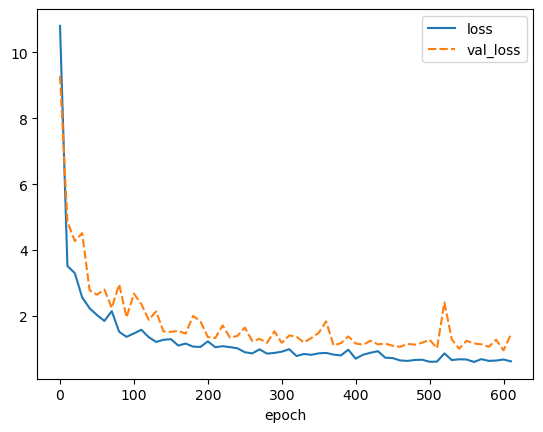

best weights loaded


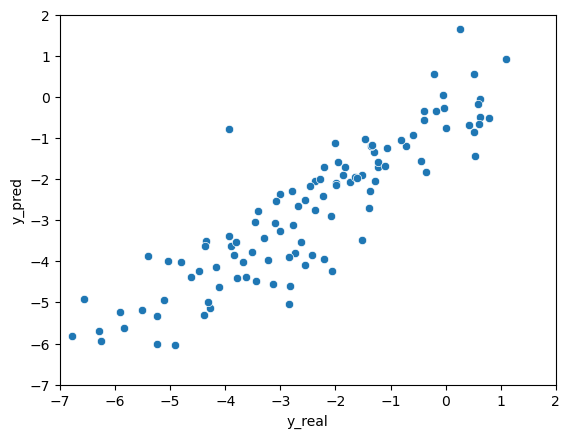

elapsed time: 196.18530464172363
run: 23
{'hidden_channels_list': [64], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000180D3952B80>, <torch.utils.data.dataset.Subset object at 0x00000180D3EDF880>, <torch.utils.data.dataset.Subset object at 0x00000180D3EDFD90>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-3): 3 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
)
Number of parameters:  13185


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 8.155692299207052 | Validation Loss 5.659815549850464
Epoch 10 | Train Loss 3.2922574043273927 | Validation Loss 4.384645700454712
Epoch 20 | Train Loss 2.5857755184173583 | Validation Loss 3.2756237983703613
Epoch 30 | Train Loss 2.6448559602101644 | Validation Loss 3.2405173778533936
Epoch 40 | Train Loss 2.299711084365845 | Validation Loss 2.5537352561950684
Epoch 50 | Train Loss 2.010014271736145 | Validation Loss 2.453273594379425
Epoch 60 | Train Loss 1.6900869131088256 | Validation Loss 2.0727568864822388
Epoch 70 | Train Loss 1.704202898343404 | Validation Loss 1.886322557926178
Epoch 80 | Train Loss 1.3691481192906698 | Validation Loss 2.1613882780075073
Epoch 90 | Train Loss 1.424964467684428 | Validation Loss 1.7739782333374023
Epoch 100 | Train Loss 1.3439067125320434 | Validation Loss 1.5781649947166443
Epoch 110 | Train Loss 1.294204310576121 | Validation Loss 1.6465258598327637
Epoch 120 | Train Loss 1.171012806892395 | Validation Loss 1.603791296482

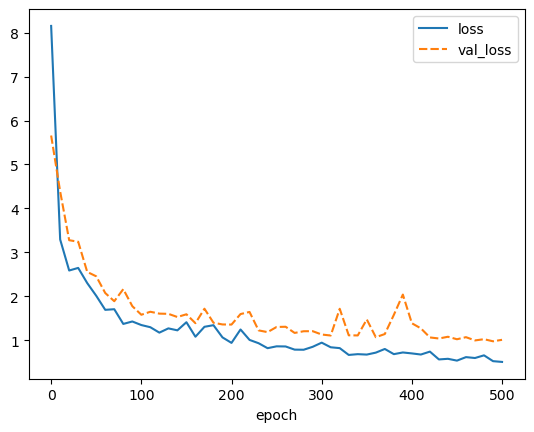

best weights loaded


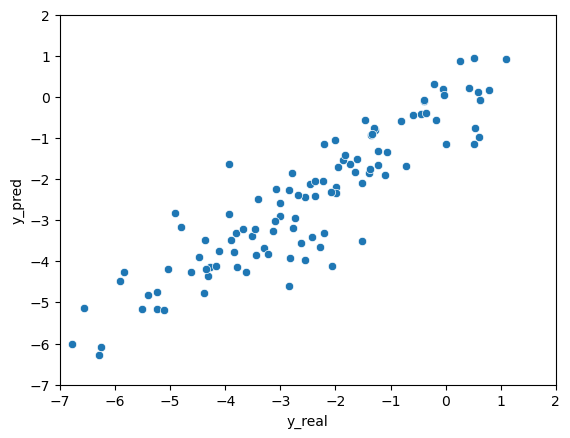

elapsed time: 138.5555009841919
run: 24
{'hidden_channels_list': [64], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>, <function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000180D3B23E50>, <torch.utils.data.dataset.Subset object at 0x000001807CCD4220>, <torch.utils.data.dataset.Subset object at 0x000001807CCD4BE0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=128, out_features=1, bias=True)
)
Number of parameters:  769
Epoch 0 | Train Loss 18.40121981302897 | Validation Loss 11.787367820739746


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 10 | Train Loss 4.001575899124146 | Validation Loss 5.3695456981658936
Epoch 20 | Train Loss 3.5997374455134072 | Validation Loss 5.081817150115967
Epoch 30 | Train Loss 3.768062925338745 | Validation Loss 4.678662300109863
Epoch 40 | Train Loss 3.384117937088013 | Validation Loss 4.561476469039917
Epoch 50 | Train Loss 3.414919884999593 | Validation Loss 4.496491193771362
Epoch 60 | Train Loss 3.4015697956085207 | Validation Loss 4.5711705684661865
Epoch 70 | Train Loss 3.2966034094492596 | Validation Loss 4.319809913635254
Epoch 80 | Train Loss 3.160608410835266 | Validation Loss 4.364845395088196
Epoch 90 | Train Loss 3.4172611872355145 | Validation Loss 4.111007571220398
Epoch 100 | Train Loss 3.1635474999745687 | Validation Loss 3.9214017391204834
Epoch 110 | Train Loss 3.324561023712158 | Validation Loss 3.9148589372634888
Epoch 120 | Train Loss 2.854573686917623 | Validation Loss 4.195188283920288
Epoch 130 | Train Loss 2.8539578914642334 | Validation Loss 3.79951429367065

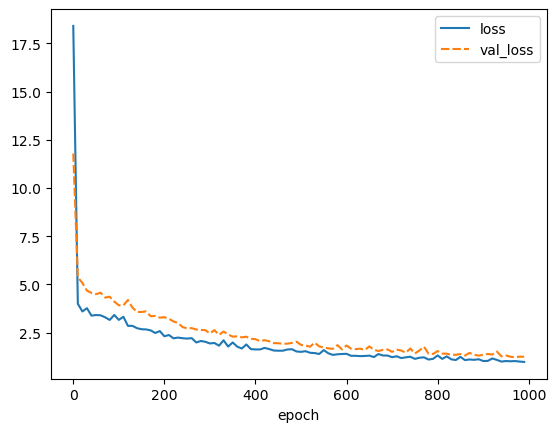

best weights loaded


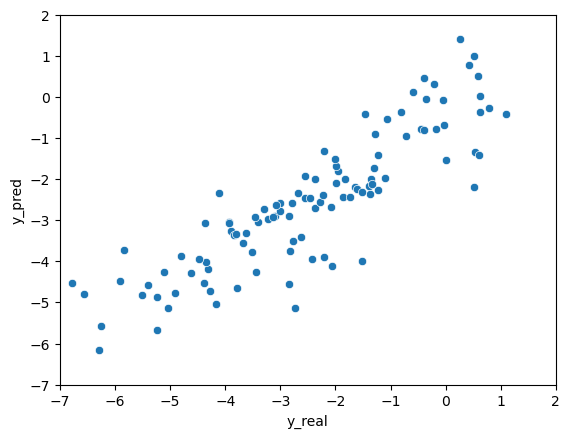

elapsed time: 191.45237278938293
run: 25
{'hidden_channels_list': [64], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807BB96E20>, <torch.utils.data.dataset.Subset object at 0x000001807BB3AD90>, <torch.utils.data.dataset.Subset object at 0x000001807BB0D190>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
)
Number of parameters:  705
Epoch 0 | Train Loss 9.424868075052897 | Validation Loss 8.586719036102295


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 10 | Train Loss 3.929949490229289 | Validation Loss 5.33376145362854
Epoch 20 | Train Loss 3.6357863903045655 | Validation Loss 4.976529121398926
Epoch 30 | Train Loss 3.6990774790445964 | Validation Loss 4.847865581512451
Epoch 40 | Train Loss 4.00630849202474 | Validation Loss 4.699208498001099
Epoch 50 | Train Loss 3.49191681543986 | Validation Loss 4.654954195022583
Epoch 60 | Train Loss 3.428100808461507 | Validation Loss 4.611754655838013
Epoch 70 | Train Loss 3.4228779315948485 | Validation Loss 4.608320474624634
Epoch 80 | Train Loss 3.311299792925517 | Validation Loss 4.534177303314209
Epoch 90 | Train Loss 3.43281512260437 | Validation Loss 4.495690584182739
Epoch 100 | Train Loss 3.255981222788493 | Validation Loss 4.3852362632751465
Epoch 110 | Train Loss 3.394260462125142 | Validation Loss 4.417702674865723
Epoch 120 | Train Loss 3.168723185857137 | Validation Loss 4.161738634109497
Epoch 130 | Train Loss 3.1338551521301268 | Validation Loss 4.087827563285828
Epoch 1

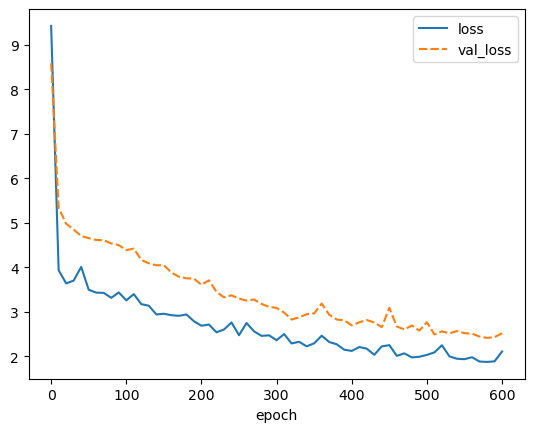

best weights loaded


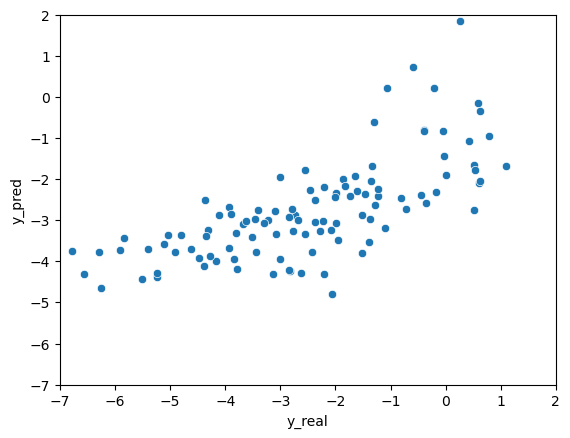

elapsed time: 111.07231736183167
run: 26
{'hidden_channels_list': [64], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 1, 'aggregations_list': [<function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807B857B20>, <torch.utils.data.dataset.Subset object at 0x00000180D3978D90>, <torch.utils.data.dataset.Subset object at 0x00000180D39780A0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
)
Number of parameters:  705
Epoch 0 | Train Loss 5.8456882317860925 | Validation Loss 6.0435850620269775


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 10 | Train Loss 3.6082327524820963 | Validation Loss 4.882557153701782
Epoch 20 | Train Loss 3.5052714268366496 | Validation Loss 4.3881261348724365
Epoch 30 | Train Loss 3.4622876326243084 | Validation Loss 4.339929223060608
Epoch 40 | Train Loss 3.209450085957845 | Validation Loss 4.379687070846558
Epoch 50 | Train Loss 3.0283481955528258 | Validation Loss 4.178066372871399
Epoch 60 | Train Loss 3.0973421891530353 | Validation Loss 4.027608275413513
Epoch 70 | Train Loss 3.1908859729766847 | Validation Loss 4.004501104354858
Epoch 80 | Train Loss 2.9606114705403646 | Validation Loss 4.089219808578491
Epoch 90 | Train Loss 3.0004998207092286 | Validation Loss 3.9033899307250977
Epoch 100 | Train Loss 2.8390344778696694 | Validation Loss 3.834640860557556
Epoch 110 | Train Loss 2.730441379547119 | Validation Loss 3.5823906660079956
Epoch 120 | Train Loss 2.5993900537490844 | Validation Loss 3.733747124671936
Epoch 130 | Train Loss 2.6964885711669924 | Validation Loss 3.3823506832

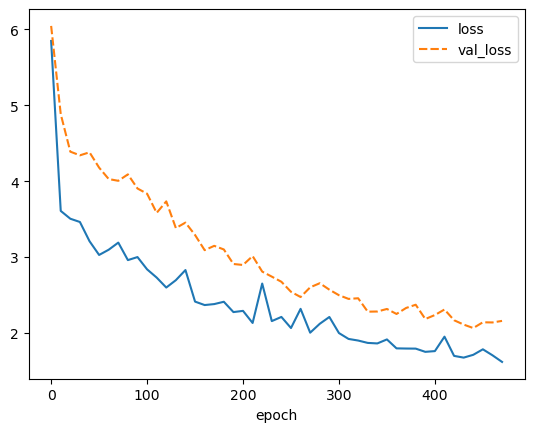

best weights loaded


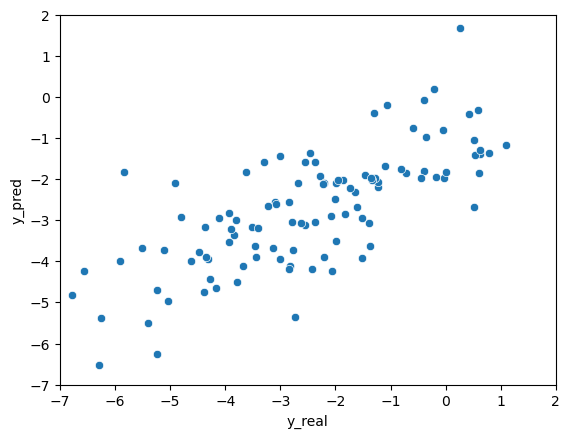

elapsed time: 87.36834001541138
run: 27
{'hidden_channels_list': [64], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>, <function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807B894EE0>, <torch.utils.data.dataset.Subset object at 0x00000180D3E82340>, <torch.utils.data.dataset.Subset object at 0x00000180D3E942E0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1): GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=128, out_features=1, bias=True)
)
Number of parameters:  4929


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 7.096333694458008 | Validation Loss 5.781021595001221
Epoch 10 | Train Loss 3.457309675216675 | Validation Loss 4.917572021484375
Epoch 20 | Train Loss 3.302010758717855 | Validation Loss 4.365130066871643
Epoch 30 | Train Loss 3.3906891345977783 | Validation Loss 4.241950035095215
Epoch 40 | Train Loss 2.987481435139974 | Validation Loss 3.8242578506469727
Epoch 50 | Train Loss 2.789414421717326 | Validation Loss 3.259106159210205
Epoch 60 | Train Loss 2.438606603940328 | Validation Loss 2.9715025424957275
Epoch 70 | Train Loss 2.050582504272461 | Validation Loss 2.5822876691818237
Epoch 80 | Train Loss 1.9798214832941692 | Validation Loss 2.8196860551834106
Epoch 90 | Train Loss 1.698976786931356 | Validation Loss 2.076126456260681
Epoch 100 | Train Loss 1.6571497599283853 | Validation Loss 1.8688026666641235
Epoch 110 | Train Loss 1.6327207227547964 | Validation Loss 1.8100795149803162
Epoch 120 | Train Loss 1.3956094324588775 | Validation Loss 1.796866357326507

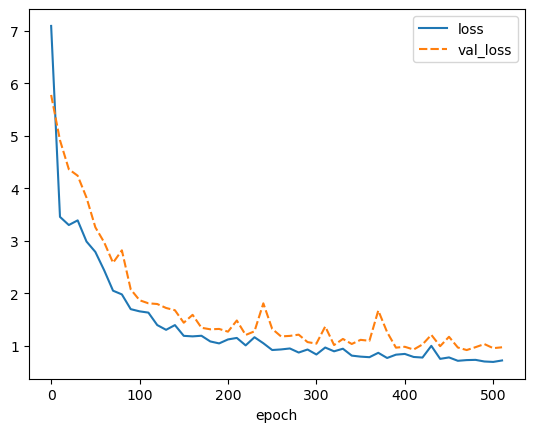

best weights loaded


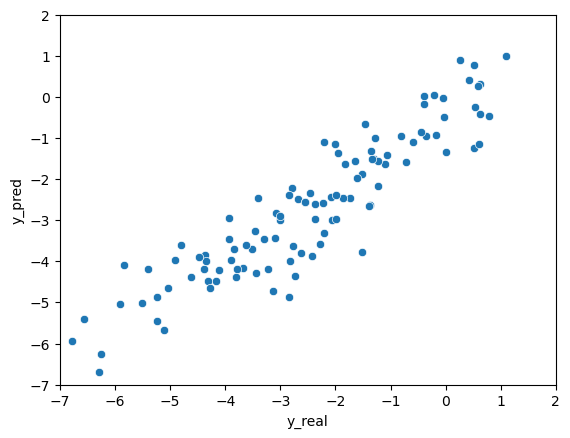

elapsed time: 116.3986234664917
run: 28
{'hidden_channels_list': [64], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807B982DC0>, <torch.utils.data.dataset.Subset object at 0x00000180D39763D0>, <torch.utils.data.dataset.Subset object at 0x00000180D39760A0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1): GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
)
Number of parameters:  4865
Epoch 0 | Train Loss 7.542116355895996 | Validation Loss 5.957828521728516


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 10 | Train Loss 3.682458221912384 | Validation Loss 5.227143287658691
Epoch 20 | Train Loss 3.509090264638265 | Validation Loss 4.550727128982544
Epoch 30 | Train Loss 3.29919114112854 | Validation Loss 4.647757411003113
Epoch 40 | Train Loss 3.2760506153106688 | Validation Loss 4.135606527328491
Epoch 50 | Train Loss 2.93512167930603 | Validation Loss 3.7112497091293335
Epoch 60 | Train Loss 2.9626779238382976 | Validation Loss 3.5738755464553833
Epoch 70 | Train Loss 2.6668396313985188 | Validation Loss 3.2050470113754272
Epoch 80 | Train Loss 2.358389647801717 | Validation Loss 2.857455849647522
Epoch 90 | Train Loss 2.1311704913775125 | Validation Loss 3.0715155601501465
Epoch 100 | Train Loss 2.008158187071482 | Validation Loss 2.503023862838745
Epoch 110 | Train Loss 1.9958442131678262 | Validation Loss 2.431112766265869
Epoch 120 | Train Loss 1.9903502384821574 | Validation Loss 2.3571109771728516
Epoch 130 | Train Loss 1.7437738498051962 | Validation Loss 2.22856056690216

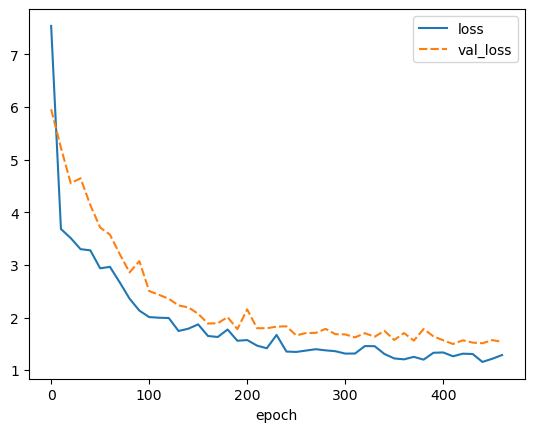

best weights loaded


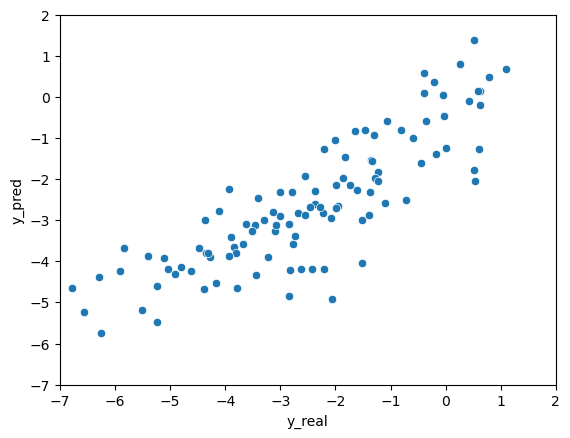

elapsed time: 105.48077464103699
run: 29
{'hidden_channels_list': [64], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 2, 'aggregations_list': [<function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807BC2FD90>, <torch.utils.data.dataset.Subset object at 0x00000180D3CD0730>, <torch.utils.data.dataset.Subset object at 0x00000180D3CD0C10>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1): GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
)
Number of parameters:  4865


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.544195127487183 | Validation Loss 5.849550724029541
Epoch 10 | Train Loss 3.5222321510314942 | Validation Loss 4.649560928344727
Epoch 20 | Train Loss 3.1886154333750407 | Validation Loss 4.353853702545166
Epoch 30 | Train Loss 2.8338973681132 | Validation Loss 3.8857284784317017
Epoch 40 | Train Loss 2.649096727371216 | Validation Loss 3.572317957878113
Epoch 50 | Train Loss 2.272089966138204 | Validation Loss 3.2006852626800537
Epoch 60 | Train Loss 2.1734277566274005 | Validation Loss 2.7311646938323975
Epoch 70 | Train Loss 1.902545698483785 | Validation Loss 2.4961780309677124
Epoch 80 | Train Loss 1.7779938300450644 | Validation Loss 2.22293758392334
Epoch 90 | Train Loss 1.693112595876058 | Validation Loss 2.5209277868270874
Epoch 100 | Train Loss 1.4735248625278472 | Validation Loss 2.008230745792389
Epoch 110 | Train Loss 1.4248133897781372 | Validation Loss 1.923026204109192
Epoch 120 | Train Loss 1.5739505608876547 | Validation Loss 1.9101069569587708


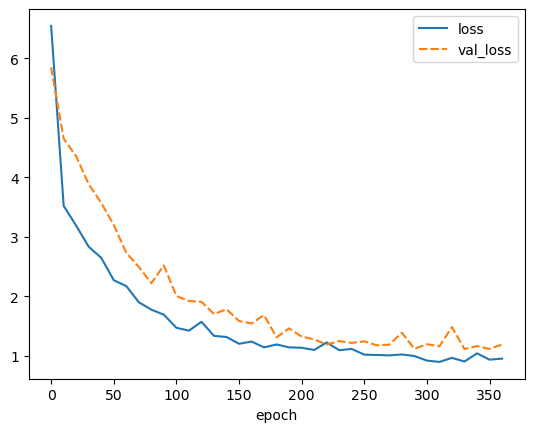

best weights loaded


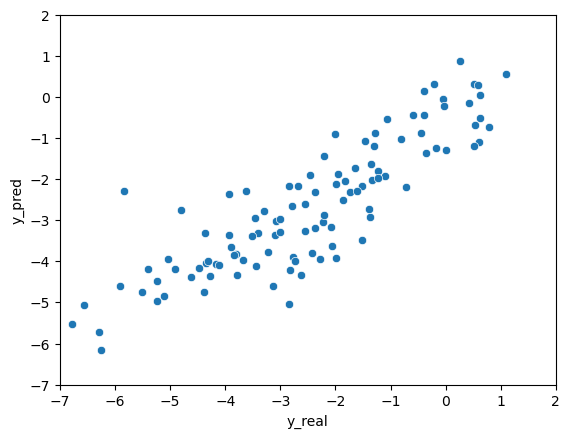

elapsed time: 84.33931016921997
run: 30
{'hidden_channels_list': [64], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>, <function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000180D3A7BB20>, <torch.utils.data.dataset.Subset object at 0x000001807B99A580>, <torch.utils.data.dataset.Subset object at 0x000001807B99A7F0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-2): 2 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=128, out_features=1, bias=True)
)
Number of parameters:  9089


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.530914815266927 | Validation Loss 5.780167579650879
Epoch 10 | Train Loss 3.590903107325236 | Validation Loss 4.684569358825684
Epoch 20 | Train Loss 3.2202592849731446 | Validation Loss 4.203385591506958
Epoch 30 | Train Loss 2.785436582565308 | Validation Loss 3.643927574157715
Epoch 40 | Train Loss 2.3271771669387817 | Validation Loss 3.056905508041382
Epoch 50 | Train Loss 1.8856914957364401 | Validation Loss 2.7343631982803345
Epoch 60 | Train Loss 1.996109096209208 | Validation Loss 2.086790919303894
Epoch 70 | Train Loss 1.4504884600639343 | Validation Loss 1.8774767518043518
Epoch 80 | Train Loss 1.6470456918080647 | Validation Loss 1.7238657474517822
Epoch 90 | Train Loss 1.4198248863220215 | Validation Loss 1.614432156085968
Epoch 100 | Train Loss 1.517415205637614 | Validation Loss 1.6806153059005737
Epoch 110 | Train Loss 1.3636302471160888 | Validation Loss 1.5574427247047424
Epoch 120 | Train Loss 1.3295986731847127 | Validation Loss 1.4106369316577

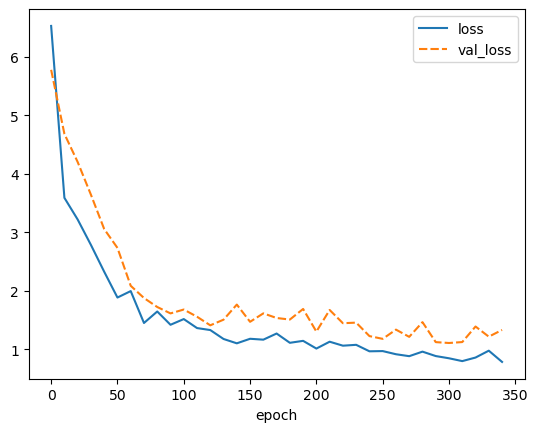

best weights loaded


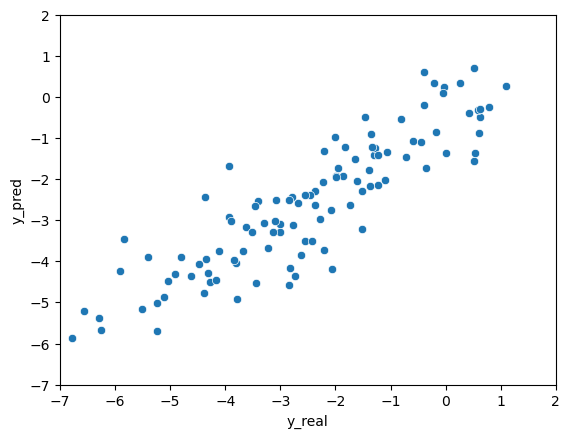

elapsed time: 93.36275362968445
run: 31
{'hidden_channels_list': [64], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000180D3A19CA0>, <torch.utils.data.dataset.Subset object at 0x00000180D3EAE250>, <torch.utils.data.dataset.Subset object at 0x00000180D3EAE730>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-2): 2 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
)
Number of parameters:  9025


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 7.803855888048807 | Validation Loss 6.090010166168213
Epoch 10 | Train Loss 3.69096261660258 | Validation Loss 5.026742458343506
Epoch 20 | Train Loss 3.4078139305114745 | Validation Loss 4.618599891662598
Epoch 30 | Train Loss 3.4997003078460693 | Validation Loss 4.138166189193726
Epoch 40 | Train Loss 2.912590217590332 | Validation Loss 3.8505637645721436
Epoch 50 | Train Loss 2.620424524943034 | Validation Loss 3.144657850265503
Epoch 60 | Train Loss 2.355142100652059 | Validation Loss 2.9399192333221436
Epoch 70 | Train Loss 2.283032751083374 | Validation Loss 2.8266924619674683
Epoch 80 | Train Loss 2.2854711214701333 | Validation Loss 2.3408639430999756
Epoch 90 | Train Loss 1.9097821791966756 | Validation Loss 2.6168285608291626
Epoch 100 | Train Loss 1.6173856178919475 | Validation Loss 2.0531230568885803
Epoch 110 | Train Loss 1.703494652112325 | Validation Loss 1.9025234580039978
Epoch 120 | Train Loss 1.5721092522144318 | Validation Loss 2.0261190533638


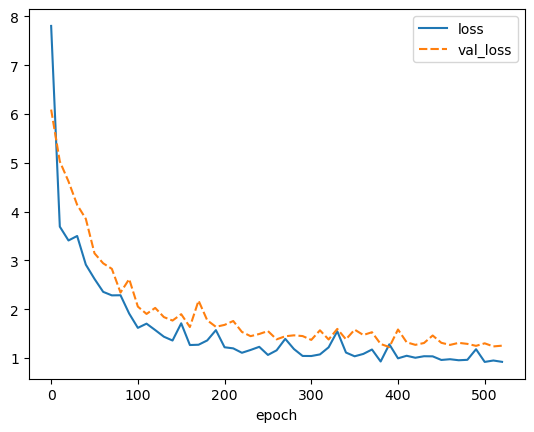

best weights loaded


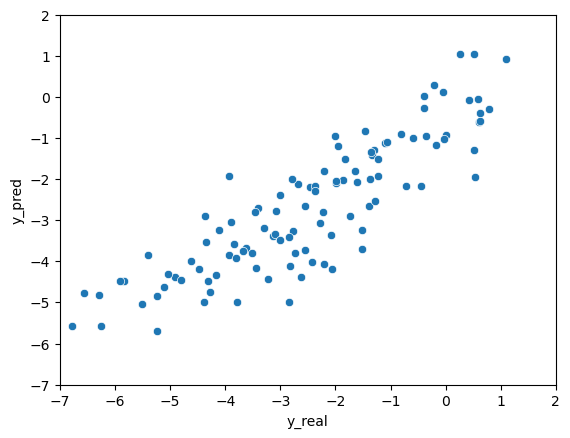

elapsed time: 136.5989589691162
run: 32
{'hidden_channels_list': [64], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 3, 'aggregations_list': [<function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807B86DCD0>, <torch.utils.data.dataset.Subset object at 0x00000180D3A8B160>, <torch.utils.data.dataset.Subset object at 0x00000180D3A8BD90>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-2): 2 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
)
Number of parameters:  9025


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 10.19602460861206 | Validation Loss 6.560944318771362
Epoch 10 | Train Loss 3.8062315940856934 | Validation Loss 4.77142071723938
Epoch 20 | Train Loss 3.1249961614608766 | Validation Loss 4.403909087181091
Epoch 30 | Train Loss 2.9521031459172566 | Validation Loss 3.8782700300216675
Epoch 40 | Train Loss 2.3372286399205526 | Validation Loss 3.1536219120025635
Epoch 50 | Train Loss 2.0264490763346354 | Validation Loss 2.5152508020401
Epoch 60 | Train Loss 1.9462195912996927 | Validation Loss 2.3162548542022705
Epoch 70 | Train Loss 1.6948474248250325 | Validation Loss 1.9912030100822449
Epoch 80 | Train Loss 1.812647565205892 | Validation Loss 2.043030261993408
Epoch 90 | Train Loss 1.379145630200704 | Validation Loss 1.9369065761566162
Epoch 100 | Train Loss 1.4987324158350626 | Validation Loss 1.5796058773994446
Epoch 110 | Train Loss 1.2639874378840128 | Validation Loss 1.5267877578735352
Epoch 120 | Train Loss 1.3330429434776305 | Validation Loss 1.505871385335

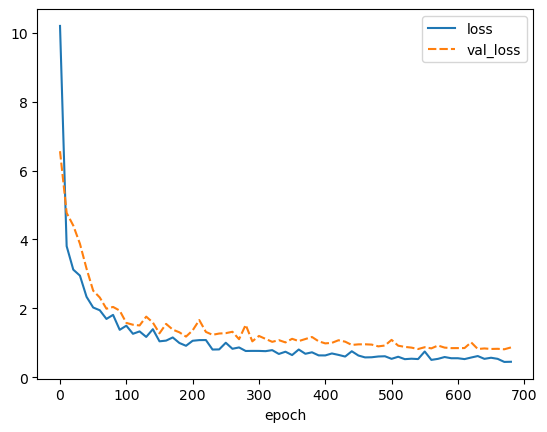

best weights loaded


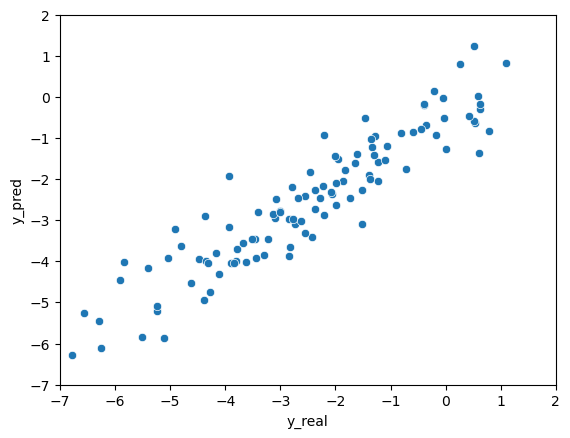

elapsed time: 196.40371561050415
run: 33
{'hidden_channels_list': [64], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>, <function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807CCEB670>, <torch.utils.data.dataset.Subset object at 0x00000180D3E3C340>, <torch.utils.data.dataset.Subset object at 0x00000180D3E3C850>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-3): 3 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=128, out_features=1, bias=True)
)
Number of parameters:  13249


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.359941291809082 | Validation Loss 5.9645936489105225
Epoch 10 | Train Loss 3.7247926076253255 | Validation Loss 4.708564043045044
Epoch 20 | Train Loss 2.788364601135254 | Validation Loss 3.653622269630432
Epoch 30 | Train Loss 2.4809524456659955 | Validation Loss 3.9266961812973022
Epoch 40 | Train Loss 1.8319318572680154 | Validation Loss 2.191404342651367
Epoch 50 | Train Loss 1.7718145847320557 | Validation Loss 2.0585787892341614
Epoch 60 | Train Loss 1.7297973076502482 | Validation Loss 1.9082558751106262
Epoch 70 | Train Loss 1.4006004571914672 | Validation Loss 1.9551663398742676
Epoch 80 | Train Loss 1.4445233464241027 | Validation Loss 1.5190784335136414
Epoch 90 | Train Loss 1.27676655848821 | Validation Loss 1.7851640582084656
Epoch 100 | Train Loss 1.3232821981112162 | Validation Loss 1.517659306526184
Epoch 110 | Train Loss 1.4021454334259034 | Validation Loss 1.4030689001083374
Epoch 120 | Train Loss 1.2159482757250468 | Validation Loss 1.498845756

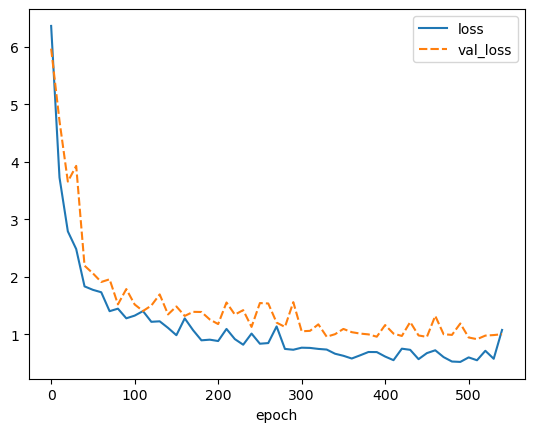

best weights loaded


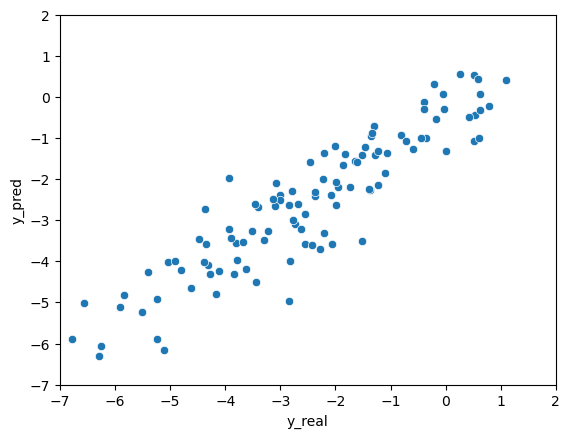

elapsed time: 178.81715559959412
run: 34
{'hidden_channels_list': [64], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807BB13220>, <torch.utils.data.dataset.Subset object at 0x00000180D3FB3250>, <torch.utils.data.dataset.Subset object at 0x00000180D3FB3D30>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-3): 3 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
)
Number of parameters:  13185


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 8.46238406499227 | Validation Loss 5.950861930847168
Epoch 10 | Train Loss 3.857636547088623 | Validation Loss 4.887912034988403
Epoch 20 | Train Loss 3.3755276918411257 | Validation Loss 4.428760051727295
Epoch 30 | Train Loss 2.6805001735687255 | Validation Loss 3.5146031379699707
Epoch 40 | Train Loss 2.331963300704956 | Validation Loss 2.799914836883545
Epoch 50 | Train Loss 2.0708354155222577 | Validation Loss 2.189242362976074
Epoch 60 | Train Loss 1.860775343577067 | Validation Loss 2.1057976484298706
Epoch 70 | Train Loss 1.670040782292684 | Validation Loss 3.2589364051818848
Epoch 80 | Train Loss 1.485688575108846 | Validation Loss 2.0006330609321594
Epoch 90 | Train Loss 1.5426949262619019 | Validation Loss 1.932202935218811
Epoch 100 | Train Loss 1.3389694412549338 | Validation Loss 1.6443650722503662
Epoch 110 | Train Loss 1.3008644421895346 | Validation Loss 1.6683884263038635
Epoch 120 | Train Loss 1.5594240069389342 | Validation Loss 1.60538387298583

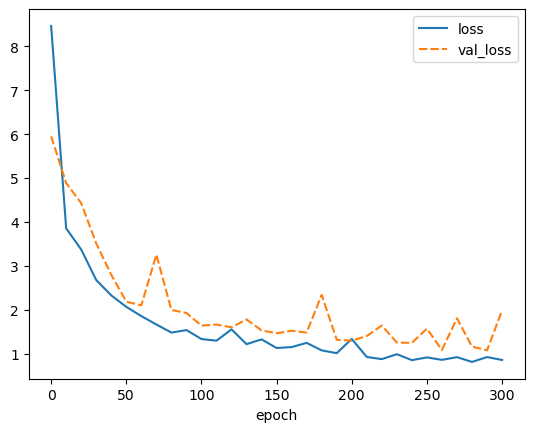

best weights loaded


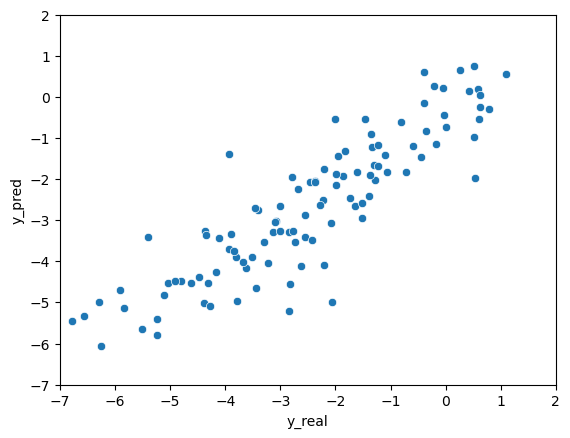

elapsed time: 93.57751226425171
run: 35
{'hidden_channels_list': [64], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807B907E20>, <torch.utils.data.dataset.Subset object at 0x00000180D3C52EE0>, <torch.utils.data.dataset.Subset object at 0x00000180D3C52070>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-3): 3 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
)
Number of parameters:  13185


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 8.197510401407877 | Validation Loss 5.350180387496948
Epoch 10 | Train Loss 3.5403287251790365 | Validation Loss 4.243185758590698
Epoch 20 | Train Loss 2.4897377252578736 | Validation Loss 3.176637351512909
Epoch 30 | Train Loss 2.173702271779378 | Validation Loss 2.6173882484436035
Epoch 40 | Train Loss 1.8182389974594115 | Validation Loss 2.3208128213882446
Epoch 50 | Train Loss 1.9715006510416666 | Validation Loss 2.063833773136139
Epoch 60 | Train Loss 1.8402991771697998 | Validation Loss 2.2444469928741455
Epoch 70 | Train Loss 1.353999932607015 | Validation Loss 1.8124096989631653
Epoch 80 | Train Loss 1.3951729655265808 | Validation Loss 2.147803485393524
Epoch 90 | Train Loss 1.5074345151583353 | Validation Loss 2.1341580152511597
Epoch 100 | Train Loss 1.3174196163813272 | Validation Loss 1.7110691666603088
Epoch 110 | Train Loss 1.0681013067563374 | Validation Loss 1.3430249989032745
Epoch 120 | Train Loss 1.0957477807998657 | Validation Loss 1.378370761

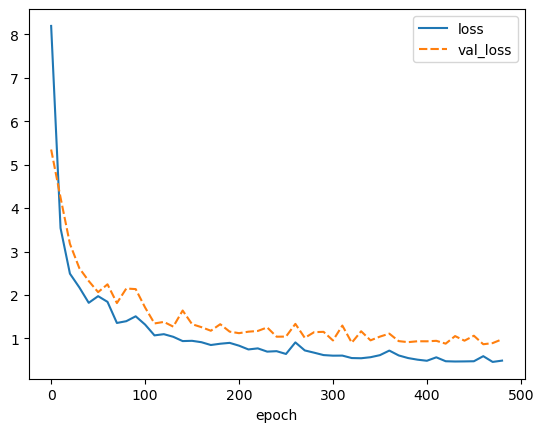

best weights loaded


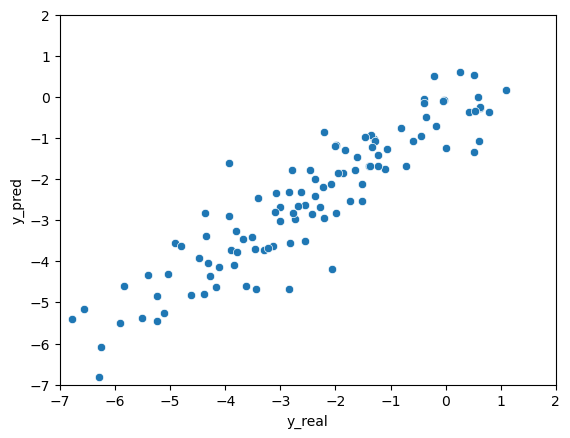

elapsed time: 146.11004447937012
run: 36
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>, <function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000180D270F760>, <torch.utils.data.dataset.Subset object at 0x00000180D3EC4BE0>, <torch.utils.data.dataset.Subset object at 0x00000180D3EE5130>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  3073
Epoch 0 | Train Loss 6.55218145052592 | Validation Loss 5.694641828536987


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 10 | Train Loss 3.484176246325175 | Validation Loss 4.625637531280518
Epoch 20 | Train Loss 3.4430336316426593 | Validation Loss 4.562248706817627
Epoch 30 | Train Loss 3.164417823155721 | Validation Loss 4.307694435119629
Epoch 40 | Train Loss 2.9101076126098633 | Validation Loss 4.336720705032349
Epoch 50 | Train Loss 2.9166363000869753 | Validation Loss 3.8859293460845947
Epoch 60 | Train Loss 3.060360860824585 | Validation Loss 3.651420831680298
Epoch 70 | Train Loss 2.5495326360066732 | Validation Loss 3.6938908100128174
Epoch 80 | Train Loss 2.7488710562388103 | Validation Loss 3.5278011560440063
Epoch 90 | Train Loss 2.655427408218384 | Validation Loss 3.003541588783264
Epoch 100 | Train Loss 2.5720957040786745 | Validation Loss 2.9691962003707886
Epoch 110 | Train Loss 2.1730300505956013 | Validation Loss 2.770387291908264
Epoch 120 | Train Loss 2.0464436610539756 | Validation Loss 3.03906512260437
Epoch 130 | Train Loss 2.1857418696085613 | Validation Loss 2.500181078910

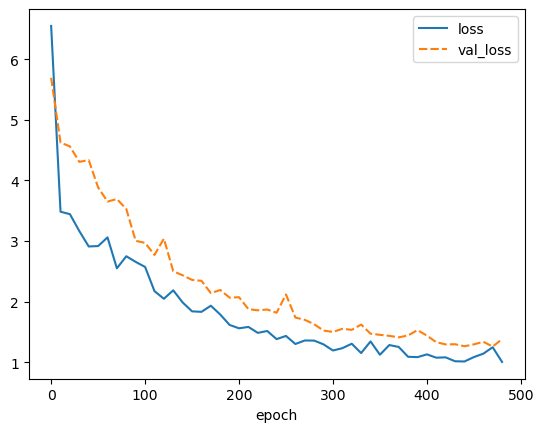

best weights loaded


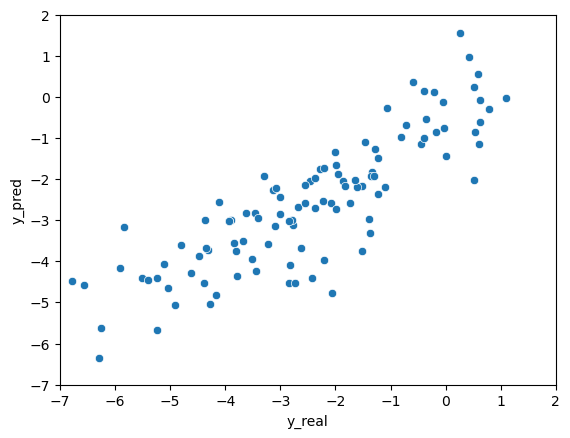

elapsed time: 109.2954568862915
run: 37
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000180D3913B50>, <torch.utils.data.dataset.Subset object at 0x000001807BA63F10>, <torch.utils.data.dataset.Subset object at 0x000001807BA634C0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  2817
Epoch 0 | Train Loss 9.641845814387004 | Validation Loss 7.053632497787476


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 10 | Train Loss 3.858881441752116 | Validation Loss 4.994969606399536
Epoch 20 | Train Loss 3.4755189657211303 | Validation Loss 4.77897047996521
Epoch 30 | Train Loss 3.6712200164794924 | Validation Loss 4.684908866882324
Epoch 40 | Train Loss 3.6152562777201336 | Validation Loss 4.665526390075684
Epoch 50 | Train Loss 3.2146894613901775 | Validation Loss 4.510663866996765
Epoch 60 | Train Loss 3.2229742209116616 | Validation Loss 4.115198731422424
Epoch 70 | Train Loss 3.2242408116658527 | Validation Loss 4.040273904800415
Epoch 80 | Train Loss 2.9998449325561523 | Validation Loss 3.7593640089035034
Epoch 90 | Train Loss 2.974537738164266 | Validation Loss 3.727875828742981
Epoch 100 | Train Loss 2.797522608439128 | Validation Loss 3.720216751098633
Epoch 110 | Train Loss 2.6430506547292074 | Validation Loss 3.685282349586487
Epoch 120 | Train Loss 2.838635269800822 | Validation Loss 3.520048141479492
Epoch 130 | Train Loss 2.569523588816325 | Validation Loss 3.2675628662109375

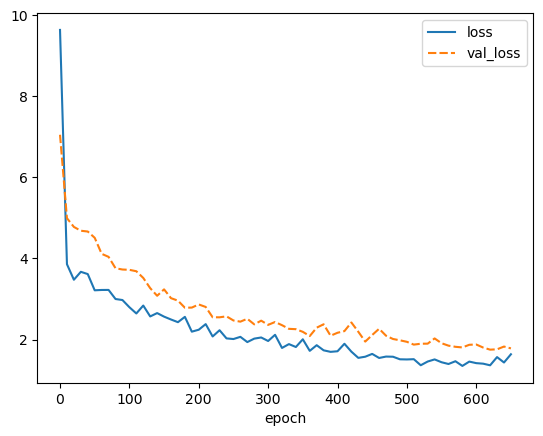

best weights loaded


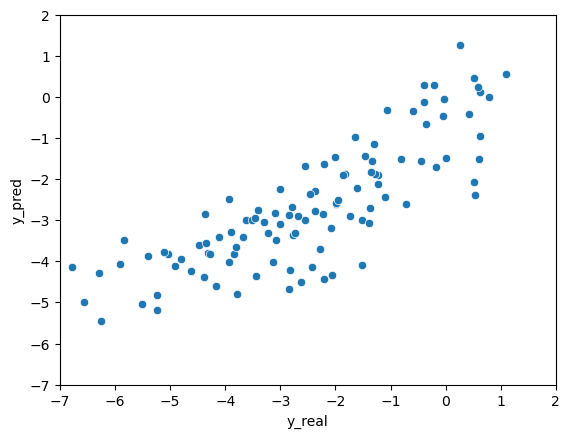

elapsed time: 139.73509454727173
run: 38
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 1, 'aggregations_list': [<function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000180D3A107F0>, <torch.utils.data.dataset.Subset object at 0x00000180D3DCB370>, <torch.utils.data.dataset.Subset object at 0x00000180D3DCB880>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  2817


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.1457189877827965 | Validation Loss 5.920632362365723
Epoch 10 | Train Loss 3.8989959716796876 | Validation Loss 4.512863516807556
Epoch 20 | Train Loss 3.4118801593780517 | Validation Loss 4.528463125228882
Epoch 30 | Train Loss 3.0636633078257245 | Validation Loss 4.183388948440552
Epoch 40 | Train Loss 3.0541055679321287 | Validation Loss 4.084990978240967
Epoch 50 | Train Loss 2.7948074181874594 | Validation Loss 3.9234061241149902
Epoch 60 | Train Loss 2.862852160135905 | Validation Loss 3.553575873374939
Epoch 70 | Train Loss 2.6053209702173867 | Validation Loss 3.420136332511902
Epoch 80 | Train Loss 2.390122334162394 | Validation Loss 3.2528438568115234
Epoch 90 | Train Loss 2.3041090250015257 | Validation Loss 3.0733096599578857
Epoch 100 | Train Loss 2.238090419769287 | Validation Loss 2.87356960773468
Epoch 110 | Train Loss 2.218546199798584 | Validation Loss 2.7321358919143677
Epoch 120 | Train Loss 2.0141393899917603 | Validation Loss 2.82255643606185

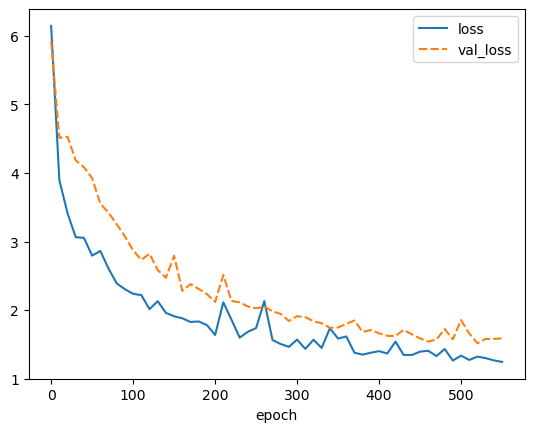

best weights loaded


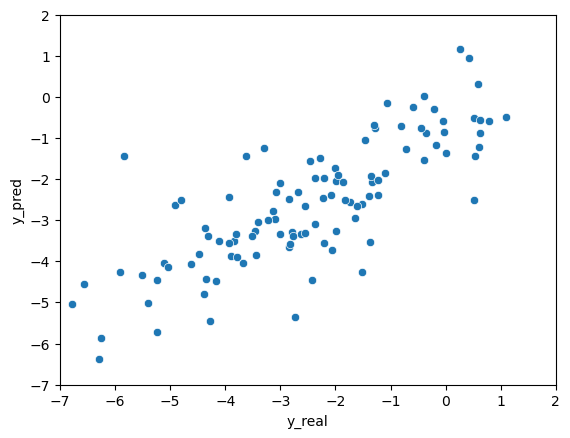

elapsed time: 120.07688021659851
run: 39
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>, <function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807B98D550>, <torch.utils.data.dataset.Subset object at 0x00000180D3B0CCA0>, <torch.utils.data.dataset.Subset object at 0x00000180D3B0C0A0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1): GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  68865


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.5750961621602375 | Validation Loss 5.356676816940308
Epoch 10 | Train Loss 3.486678457260132 | Validation Loss 4.498576641082764
Epoch 20 | Train Loss 3.0276524702707928 | Validation Loss 3.889965772628784
Epoch 30 | Train Loss 2.461753785610199 | Validation Loss 3.417418956756592
Epoch 40 | Train Loss 2.122960416475932 | Validation Loss 3.648652672767639
Epoch 50 | Train Loss 1.9093409538269044 | Validation Loss 2.5072453022003174
Epoch 60 | Train Loss 1.862881310780843 | Validation Loss 2.406811833381653
Epoch 70 | Train Loss 1.6327673037846884 | Validation Loss 2.0539432168006897
Epoch 80 | Train Loss 1.5959492683410645 | Validation Loss 1.9406005144119263
Epoch 90 | Train Loss 1.4758247534434001 | Validation Loss 1.7611749172210693
Epoch 100 | Train Loss 1.2424263914426168 | Validation Loss 1.5661648511886597
Epoch 110 | Train Loss 1.4511857827504475 | Validation Loss 1.7259309887886047
Epoch 120 | Train Loss 1.2801478177309036 | Validation Loss 1.45909565687

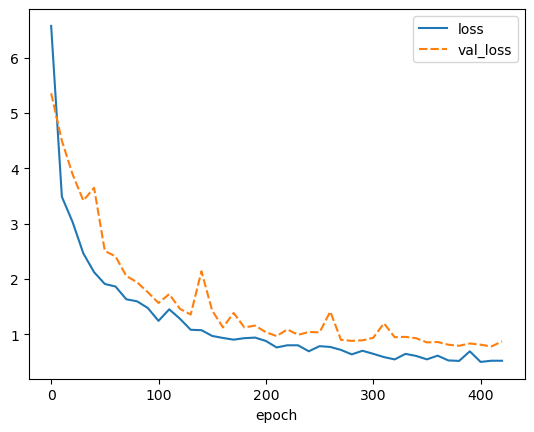

best weights loaded


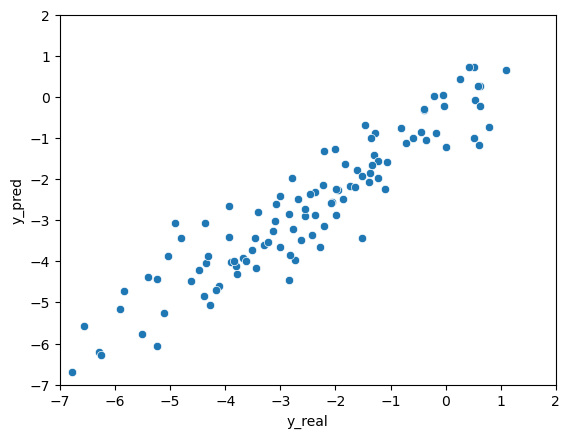

elapsed time: 109.93311667442322
run: 40
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000180D3935520>, <torch.utils.data.dataset.Subset object at 0x000001807BB3A1F0>, <torch.utils.data.dataset.Subset object at 0x000001807BB3A4F0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1): GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  68609


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 6.730747731526693 | Validation Loss 5.633094072341919
Epoch 10 | Train Loss 3.5285585721333823 | Validation Loss 4.92878794670105
Epoch 20 | Train Loss 3.195160245895386 | Validation Loss 4.291711091995239
Epoch 30 | Train Loss 2.742683982849121 | Validation Loss 3.480792284011841
Epoch 40 | Train Loss 2.407038942972819 | Validation Loss 3.853067398071289
Epoch 50 | Train Loss 2.186647121111552 | Validation Loss 2.8023701906204224
Epoch 60 | Train Loss 2.2065702358881634 | Validation Loss 2.4075223803520203
Epoch 70 | Train Loss 1.7302350441614787 | Validation Loss 2.1792222261428833
Epoch 80 | Train Loss 1.6889439503351846 | Validation Loss 2.121652126312256
Epoch 90 | Train Loss 1.635939327875773 | Validation Loss 1.9176372289657593
Epoch 100 | Train Loss 1.7129965623219807 | Validation Loss 1.8853867053985596
Epoch 110 | Train Loss 1.4127235492070516 | Validation Loss 1.7799586057662964
Epoch 120 | Train Loss 1.4334491809209189 | Validation Loss 1.84304666519165

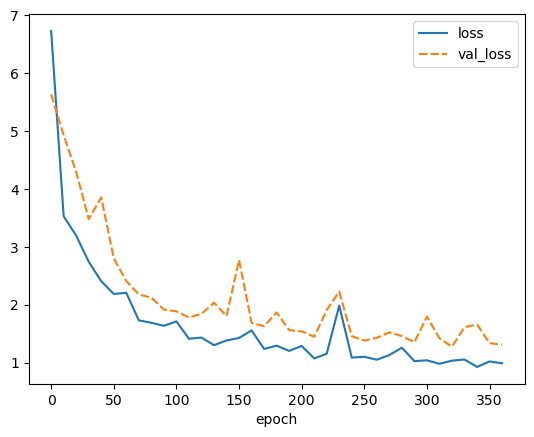

best weights loaded


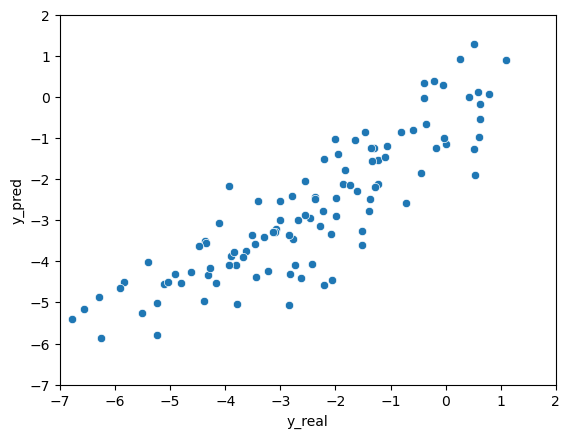

elapsed time: 86.96033024787903
run: 41
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 2, 'aggregations_list': [<function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000180D3CC5220>, <torch.utils.data.dataset.Subset object at 0x00000180D399A970>, <torch.utils.data.dataset.Subset object at 0x000001807CD04910>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1): GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  68609


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.019355440139771 | Validation Loss 5.508664846420288
Epoch 10 | Train Loss 3.2922445933024087 | Validation Loss 4.336880087852478
Epoch 20 | Train Loss 3.1441693464914957 | Validation Loss 3.901534914970398
Epoch 30 | Train Loss 2.4748029311498008 | Validation Loss 3.8128477334976196
Epoch 40 | Train Loss 2.375988213221232 | Validation Loss 2.7531625032424927
Epoch 50 | Train Loss 1.9055031140645344 | Validation Loss 2.2911373376846313
Epoch 60 | Train Loss 1.8533140659332275 | Validation Loss 2.0272735357284546
Epoch 70 | Train Loss 1.52171045144399 | Validation Loss 1.9437888264656067
Epoch 80 | Train Loss 1.4710351049900054 | Validation Loss 1.850026786327362
Epoch 90 | Train Loss 1.326241393884023 | Validation Loss 1.6328679323196411
Epoch 100 | Train Loss 1.2291951894760131 | Validation Loss 1.4868084788322449
Epoch 110 | Train Loss 1.3800954500834146 | Validation Loss 1.65361487865448
Epoch 120 | Train Loss 1.228452161947886 | Validation Loss 1.3587497472763

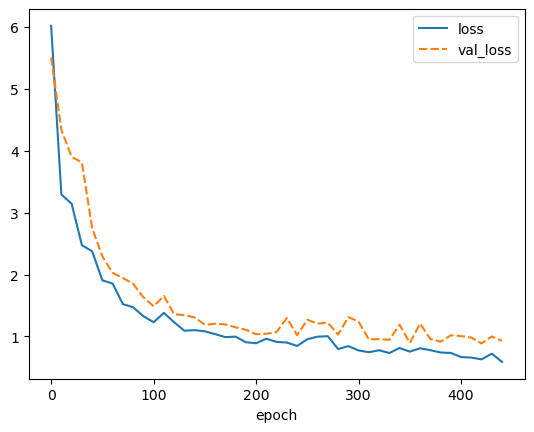

best weights loaded


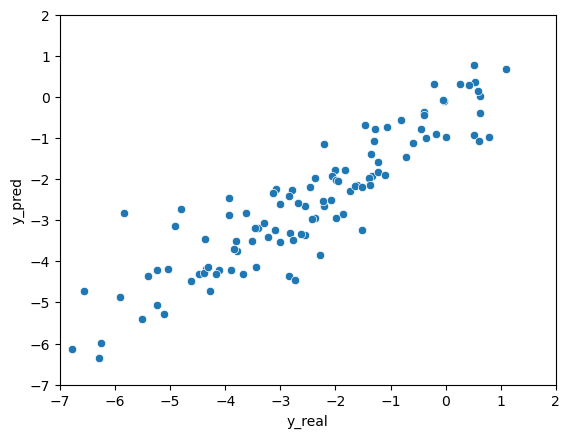

elapsed time: 115.7463448047638
run: 42
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>, <function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000180D3A6D790>, <torch.utils.data.dataset.Subset object at 0x00000180D3CAA100>, <torch.utils.data.dataset.Subset object at 0x00000180D3CAA490>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-2): 2 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  134657


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.989837805430095 | Validation Loss 6.269896745681763
Epoch 10 | Train Loss 3.2891316095987957 | Validation Loss 4.365553379058838
Epoch 20 | Train Loss 2.9167643785476685 | Validation Loss 3.9450026750564575
Epoch 30 | Train Loss 2.3695949872334796 | Validation Loss 3.2588366270065308
Epoch 40 | Train Loss 1.8990118106206257 | Validation Loss 2.144272744655609
Epoch 50 | Train Loss 1.5311908702055612 | Validation Loss 2.1755690574645996
Epoch 60 | Train Loss 1.6246281147003174 | Validation Loss 1.7135587334632874
Epoch 70 | Train Loss 1.4211054563522338 | Validation Loss 1.6554540991783142
Epoch 80 | Train Loss 1.3466821392377217 | Validation Loss 1.5285979509353638
Epoch 90 | Train Loss 1.1430697282155355 | Validation Loss 1.5926613807678223
Epoch 100 | Train Loss 1.0789571762084962 | Validation Loss 1.5033254623413086
Epoch 110 | Train Loss 1.1082228064537047 | Validation Loss 1.4055964946746826
Epoch 120 | Train Loss 1.0697704513867696 | Validation Loss 1.55021

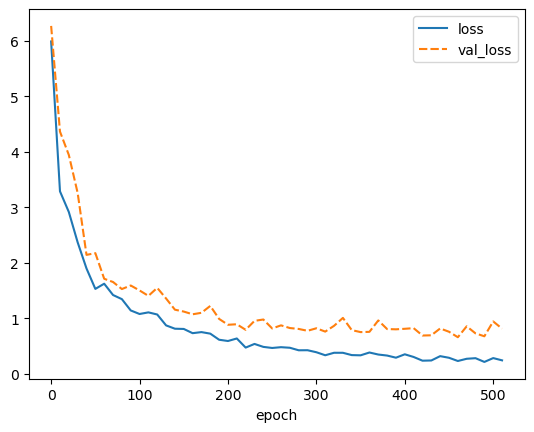

best weights loaded


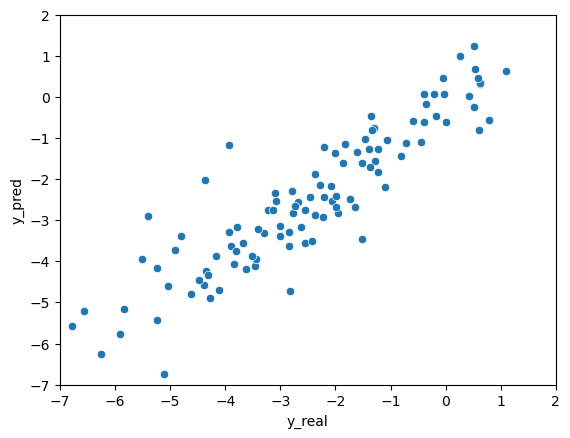

elapsed time: 146.94670271873474
run: 43
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807BA26C40>, <torch.utils.data.dataset.Subset object at 0x00000180D3A659D0>, <torch.utils.data.dataset.Subset object at 0x00000180D3A65280>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-2): 2 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  134401


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 6.709665139516194 | Validation Loss 5.982299089431763
Epoch 10 | Train Loss 3.603235467274984 | Validation Loss 5.080320715904236
Epoch 20 | Train Loss 2.827338687578837 | Validation Loss 3.6069687604904175
Epoch 30 | Train Loss 2.0953431963920592 | Validation Loss 2.874169111251831
Epoch 40 | Train Loss 2.2293629089991254 | Validation Loss 2.42738139629364
Epoch 50 | Train Loss 2.1122419754664103 | Validation Loss 2.652651786804199
Epoch 60 | Train Loss 1.6714776039123536 | Validation Loss 2.8226197957992554
Epoch 70 | Train Loss 2.0225379625956217 | Validation Loss 3.5639090538024902
Epoch 80 | Train Loss 1.552335250377655 | Validation Loss 2.126152753829956
Epoch 90 | Train Loss 1.394817018508911 | Validation Loss 2.8824589252471924
Epoch 100 | Train Loss 1.342603826522827 | Validation Loss 1.9550493955612183
Epoch 110 | Train Loss 1.2832664211591085 | Validation Loss 1.5459092855453491
Epoch 120 | Train Loss 1.2735101103782653 | Validation Loss 1.50119584798812

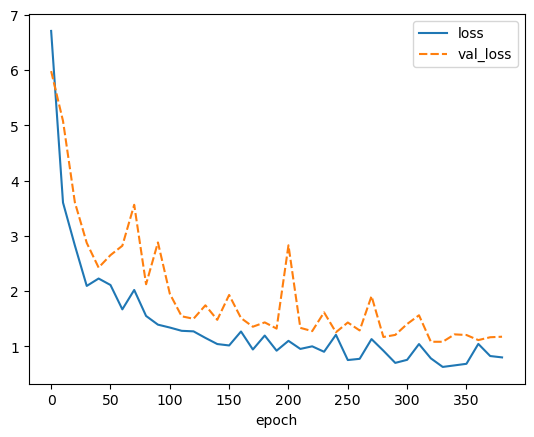

best weights loaded


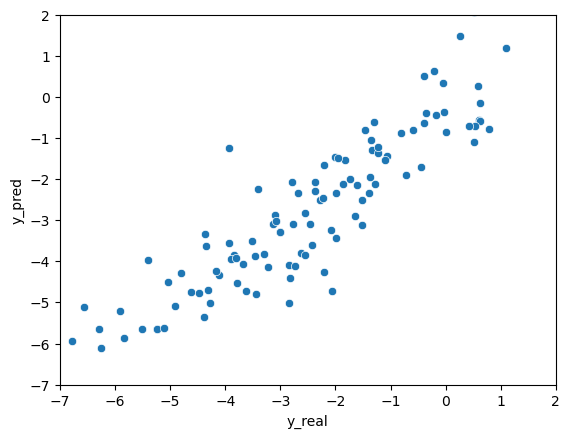

elapsed time: 105.11172890663147
run: 44
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 3, 'aggregations_list': [<function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807BB4B040>, <torch.utils.data.dataset.Subset object at 0x000001807CCCE9D0>, <torch.utils.data.dataset.Subset object at 0x000001807CCB4100>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-2): 2 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  134401


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.290534480412801 | Validation Loss 6.1747353076934814
Epoch 10 | Train Loss 3.1474090178807574 | Validation Loss 4.284982085227966
Epoch 20 | Train Loss 2.6021800994873048 | Validation Loss 3.1788982152938843
Epoch 30 | Train Loss 2.1348793665568033 | Validation Loss 2.613975167274475
Epoch 40 | Train Loss 1.8225347439448039 | Validation Loss 2.0374788641929626
Epoch 50 | Train Loss 1.457979396979014 | Validation Loss 1.8772900104522705
Epoch 60 | Train Loss 1.4873342633247375 | Validation Loss 1.812694787979126
Epoch 70 | Train Loss 1.2950800657272339 | Validation Loss 1.7263087034225464
Epoch 80 | Train Loss 1.2483819365501403 | Validation Loss 1.3895285725593567
Epoch 90 | Train Loss 1.065349280834198 | Validation Loss 1.378934621810913
Epoch 100 | Train Loss 1.1471017559369405 | Validation Loss 1.1237199306488037
Epoch 110 | Train Loss 0.9399677117665609 | Validation Loss 1.1981063485145569
Epoch 120 | Train Loss 0.938431445757548 | Validation Loss 1.109710335

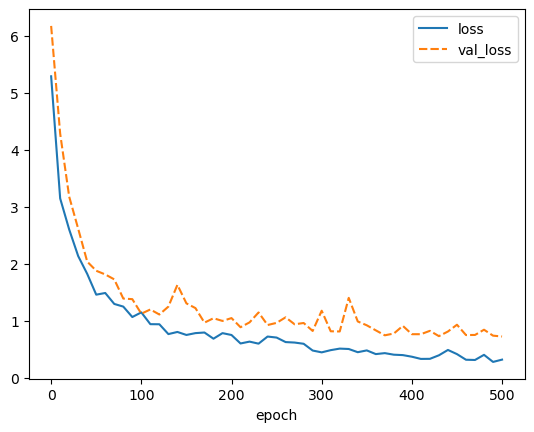

best weights loaded


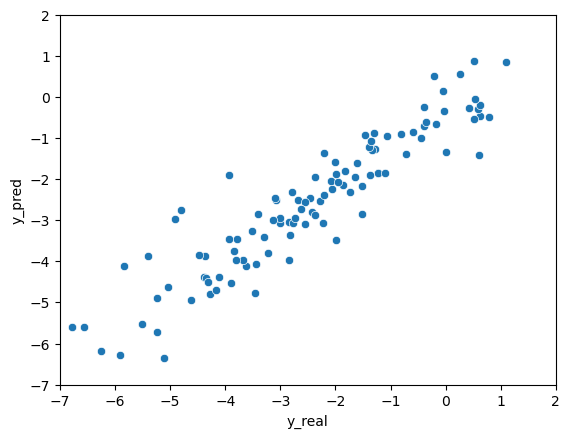

elapsed time: 138.40194296836853
run: 45
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>, <function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807B889A90>, <torch.utils.data.dataset.Subset object at 0x00000180D3DEE790>, <torch.utils.data.dataset.Subset object at 0x00000180D3DEECA0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.982131465276082 | Validation Loss 5.913776159286499
Epoch 10 | Train Loss 3.2739198207855225 | Validation Loss 4.038299083709717
Epoch 20 | Train Loss 2.425327920913696 | Validation Loss 3.407190680503845
Epoch 30 | Train Loss 1.8683432340621948 | Validation Loss 2.3135350942611694
Epoch 40 | Train Loss 1.9630088647206625 | Validation Loss 2.309680938720703
Epoch 50 | Train Loss 1.39775417248408 | Validation Loss 1.9215002655982971
Epoch 60 | Train Loss 1.2566947976748148 | Validation Loss 1.391168236732483
Epoch 70 | Train Loss 1.2843732436498005 | Validation Loss 1.3625568747520447
Epoch 80 | Train Loss 0.9111674308776856 | Validation Loss 1.9486480355262756
Epoch 90 | Train Loss 1.051598604520162 | Validation Loss 1.6578938364982605
Epoch 100 | Train Loss 0.7682314972082774 | Validation Loss 1.1688952445983887
Epoch 110 | Train Loss 0.7005017956097921 | Validation Loss 1.3234707713127136
Epoch 120 | Train Loss 0.7748033404350281 | Validation Loss 1.50644576549

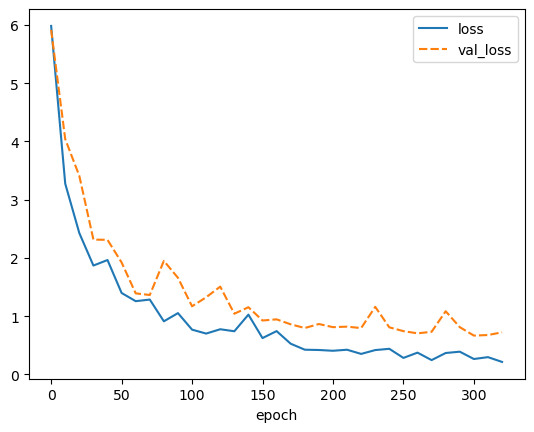

best weights loaded


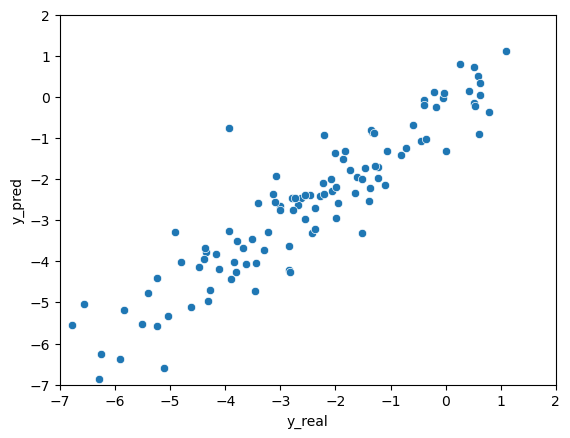

elapsed time: 105.52938795089722
run: 46
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807BA60BB0>, <torch.utils.data.dataset.Subset object at 0x000001807B94DA90>, <torch.utils.data.dataset.Subset object at 0x000001807B94D100>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 5.92791633605957 | Validation Loss 6.658729791641235
Epoch 10 | Train Loss 3.5841395060221353 | Validation Loss 4.523300647735596
Epoch 20 | Train Loss 2.75192244052887 | Validation Loss 3.045461654663086
Epoch 30 | Train Loss 2.138495151201884 | Validation Loss 2.3220385909080505
Epoch 40 | Train Loss 1.6334811250368755 | Validation Loss 1.9053938388824463
Epoch 50 | Train Loss 1.6770864327748616 | Validation Loss 2.196346879005432
Epoch 60 | Train Loss 1.2270355463027953 | Validation Loss 1.8492129445075989
Epoch 70 | Train Loss 1.5392083009084065 | Validation Loss 1.7076708674430847
Epoch 80 | Train Loss 1.1109097341696421 | Validation Loss 1.5967308282852173
Epoch 90 | Train Loss 1.0258945147196452 | Validation Loss 1.367875337600708
Epoch 100 | Train Loss 1.1299586494763691 | Validation Loss 1.4481872916221619
Epoch 110 | Train Loss 1.1017780900001526 | Validation Loss 1.3580944538116455
Epoch 120 | Train Loss 1.1177236278851828 | Validation Loss 1.90607023239

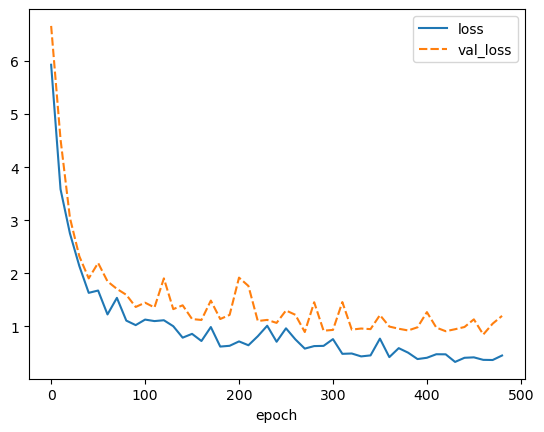

best weights loaded


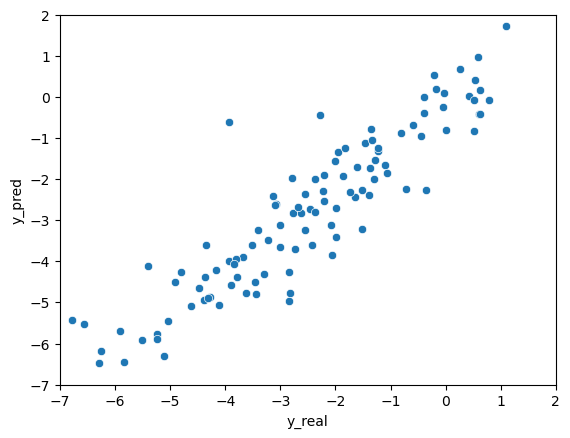

elapsed time: 147.84335589408875
run: 47
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807B8E4E80>, <torch.utils.data.dataset.Subset object at 0x00000180D3DE9730>, <torch.utils.data.dataset.Subset object at 0x00000180D3DE9C40>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.915774536132813 | Validation Loss 6.683689832687378
Epoch 10 | Train Loss 2.727539650599162 | Validation Loss 3.426442503929138
Epoch 20 | Train Loss 2.424777642885844 | Validation Loss 3.6681389808654785
Epoch 30 | Train Loss 2.2395647525787354 | Validation Loss 2.484095335006714
Epoch 40 | Train Loss 1.720111576716105 | Validation Loss 1.9897375106811523
Epoch 50 | Train Loss 1.4056266705195108 | Validation Loss 1.5886247754096985
Epoch 60 | Train Loss 1.2053223649660747 | Validation Loss 1.566297471523285
Epoch 70 | Train Loss 1.2903090278307596 | Validation Loss 1.3680596351623535
Epoch 80 | Train Loss 1.0366802553335825 | Validation Loss 1.500309407711029
Epoch 90 | Train Loss 1.0227113087972006 | Validation Loss 1.4513354301452637
Epoch 100 | Train Loss 0.9535221497217814 | Validation Loss 1.3774027228355408
Epoch 110 | Train Loss 0.9284635980923971 | Validation Loss 1.1895445585250854
Epoch 120 | Train Loss 0.9355773170789082 | Validation Loss 1.8250502347

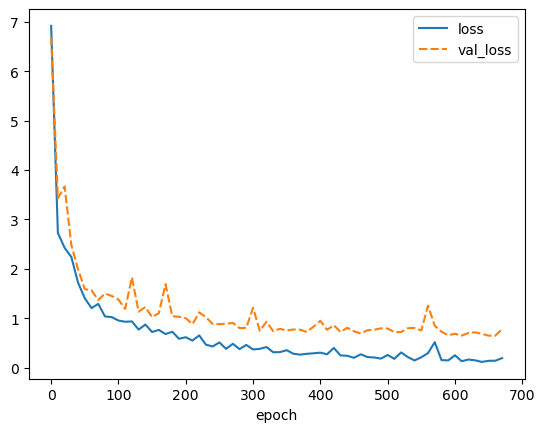

best weights loaded


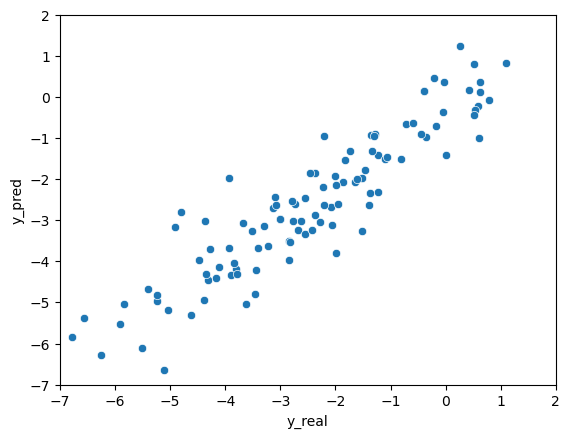

elapsed time: 203.77923941612244
run: 48
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>, <function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807CD3FEE0>, <torch.utils.data.dataset.Subset object at 0x00000180D3CCCA90>, <torch.utils.data.dataset.Subset object at 0x00000180D3B8CD90>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  3073
Epoch 0 | Train Loss 5.962092701594035 | Validation Loss 5.805182695388794


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 10 | Train Loss 3.519900178909302 | Validation Loss 4.804553031921387
Epoch 20 | Train Loss 3.413632853825887 | Validation Loss 4.510284900665283
Epoch 30 | Train Loss 3.140278434753418 | Validation Loss 4.4088873863220215
Epoch 40 | Train Loss 2.948028866449992 | Validation Loss 4.052866220474243
Epoch 50 | Train Loss 2.8425400892893475 | Validation Loss 3.9642571210861206
Epoch 60 | Train Loss 2.7934103488922117 | Validation Loss 3.5471261739730835
Epoch 70 | Train Loss 2.6454630295435586 | Validation Loss 3.235037088394165
Epoch 80 | Train Loss 2.3804574012756348 | Validation Loss 3.1117573976516724
Epoch 90 | Train Loss 2.3643197536468508 | Validation Loss 3.1568331718444824
Epoch 100 | Train Loss 2.255462328592936 | Validation Loss 2.7655164003372192
Epoch 110 | Train Loss 2.190345120429993 | Validation Loss 2.567142367362976
Epoch 120 | Train Loss 1.962165609995524 | Validation Loss 2.5533926486968994
Epoch 130 | Train Loss 2.0079308350880942 | Validation Loss 2.48057287931

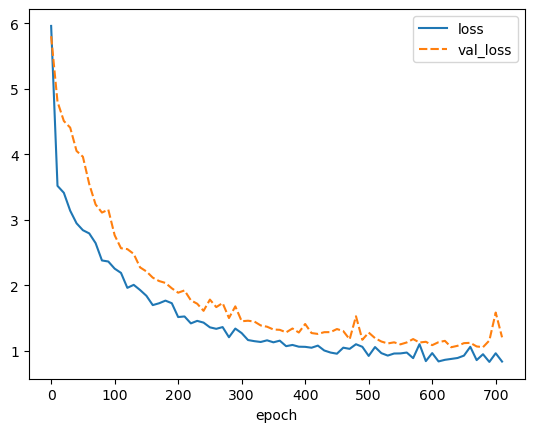

best weights loaded


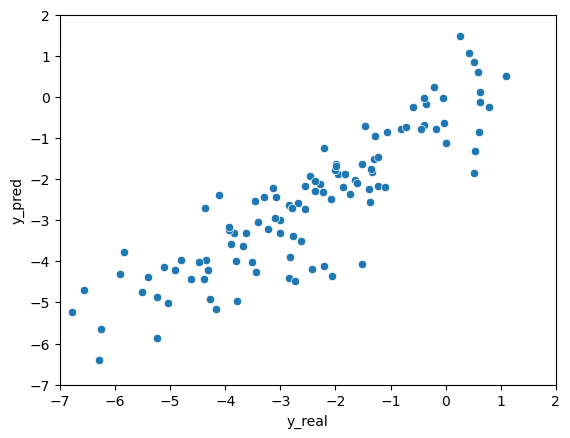

elapsed time: 140.59392189979553
run: 49
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000180D3AC8130>, <torch.utils.data.dataset.Subset object at 0x00000180D3A865E0>, <torch.utils.data.dataset.Subset object at 0x00000180D3AAFAC0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  2817
Epoch 0 | Train Loss 8.340530427296956 | Validation Loss 6.61996865272522


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 10 | Train Loss 3.760751454035441 | Validation Loss 5.0498948097229
Epoch 20 | Train Loss 3.485818314552307 | Validation Loss 4.862456798553467
Epoch 30 | Train Loss 3.5980378945668536 | Validation Loss 4.774221658706665
Epoch 40 | Train Loss 3.3290993690490724 | Validation Loss 4.398003339767456
Epoch 50 | Train Loss 3.4588369051615397 | Validation Loss 4.164185285568237
Epoch 60 | Train Loss 3.1866583665211996 | Validation Loss 4.223523020744324
Epoch 70 | Train Loss 3.1651145935058596 | Validation Loss 4.100216031074524
Epoch 80 | Train Loss 2.977006514867147 | Validation Loss 3.754033923149109
Epoch 90 | Train Loss 3.000987339019775 | Validation Loss 3.7321388721466064
Epoch 100 | Train Loss 2.7275877952575684 | Validation Loss 3.6371572017669678
Epoch 110 | Train Loss 2.6653810342152915 | Validation Loss 3.413536310195923
Epoch 120 | Train Loss 2.5853003660837808 | Validation Loss 3.3987826108932495
Epoch 130 | Train Loss 2.736679180463155 | Validation Loss 3.245245933532715

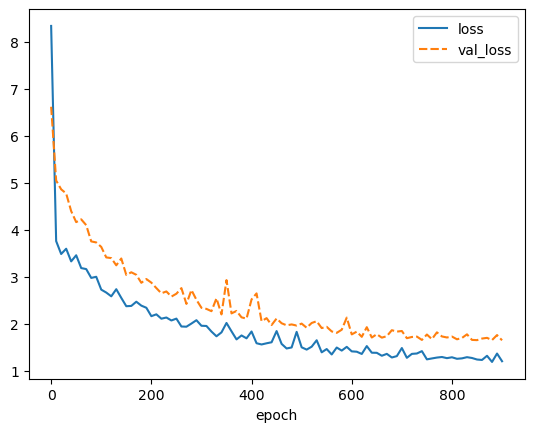

best weights loaded


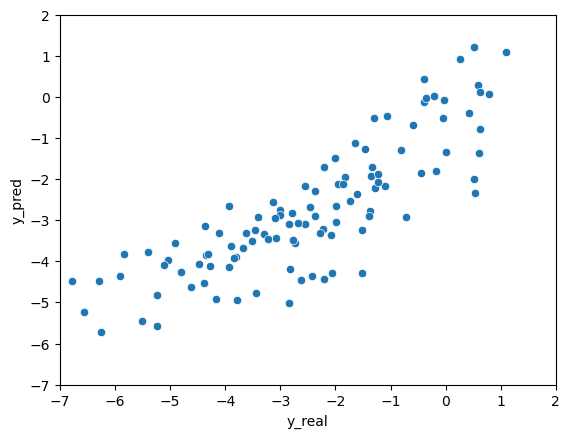

elapsed time: 163.30121040344238
run: 50
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 1, 'aggregations_list': [<function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807B98D2B0>, <torch.utils.data.dataset.Subset object at 0x00000180D3B5BBB0>, <torch.utils.data.dataset.Subset object at 0x000001807BC6A5E0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  2817


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.288247648874918 | Validation Loss 5.757941246032715
Epoch 10 | Train Loss 3.5509483337402346 | Validation Loss 4.751563668251038
Epoch 20 | Train Loss 3.2914484977722167 | Validation Loss 4.66573703289032
Epoch 30 | Train Loss 3.4404115517934164 | Validation Loss 4.319872140884399
Epoch 40 | Train Loss 3.22622176806132 | Validation Loss 4.361581802368164
Epoch 50 | Train Loss 2.9801342646280924 | Validation Loss 4.184763550758362
Epoch 60 | Train Loss 2.7743176937103273 | Validation Loss 3.6550755500793457
Epoch 70 | Train Loss 2.741716488202413 | Validation Loss 3.4778984785079956
Epoch 80 | Train Loss 2.5603243033091228 | Validation Loss 3.5347620248794556
Epoch 90 | Train Loss 2.431976608435313 | Validation Loss 3.1693312525749207
Epoch 100 | Train Loss 2.29241544008255 | Validation Loss 3.1442408561706543
Epoch 110 | Train Loss 2.455497225125631 | Validation Loss 2.90809965133667
Epoch 120 | Train Loss 2.2145686229070027 | Validation Loss 2.7745895981788635
E

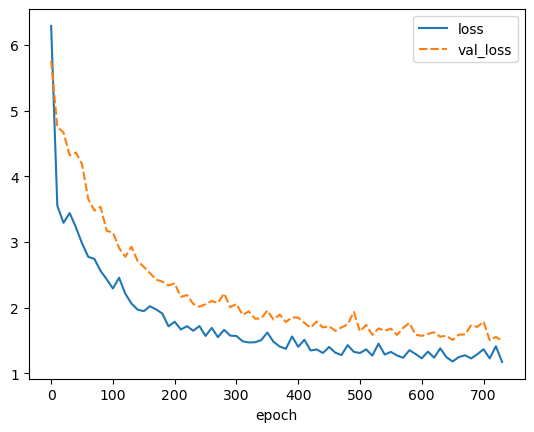

best weights loaded


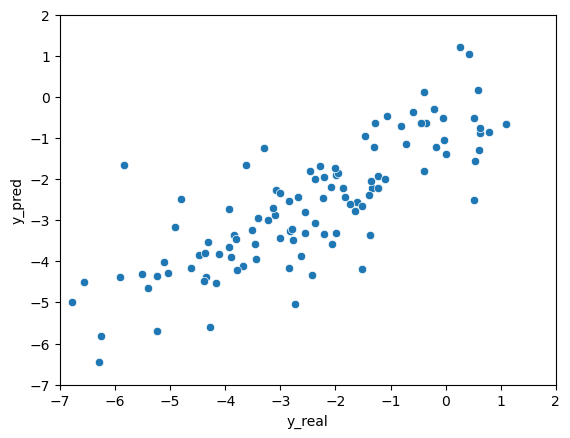

elapsed time: 136.4772560596466
run: 51
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>, <function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000018078BBDD00>, <torch.utils.data.dataset.Subset object at 0x00000180D3E89280>, <torch.utils.data.dataset.Subset object at 0x00000180D3E24640>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1): GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  68865


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.045160357157389 | Validation Loss 5.547765016555786
Epoch 10 | Train Loss 3.65562375386556 | Validation Loss 4.497935056686401
Epoch 20 | Train Loss 3.401481199264526 | Validation Loss 4.127216100692749
Epoch 30 | Train Loss 2.484334075450897 | Validation Loss 3.474571704864502
Epoch 40 | Train Loss 2.1540775299072266 | Validation Loss 2.480052351951599
Epoch 50 | Train Loss 1.854237977663676 | Validation Loss 3.176972985267639
Epoch 60 | Train Loss 1.7695397933324177 | Validation Loss 2.3497514724731445
Epoch 70 | Train Loss 1.7322508017222087 | Validation Loss 1.9318472146987915
Epoch 80 | Train Loss 1.4669460614522298 | Validation Loss 1.976130723953247
Epoch 90 | Train Loss 1.5887420574824016 | Validation Loss 1.772383987903595
Epoch 100 | Train Loss 1.234156080087026 | Validation Loss 1.7446867227554321
Epoch 110 | Train Loss 1.3613080342610677 | Validation Loss 1.4574050903320312
Epoch 120 | Train Loss 1.22410755554835 | Validation Loss 1.6627632975578308
E

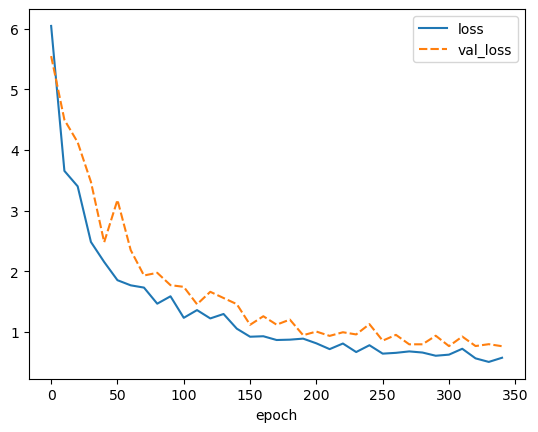

best weights loaded


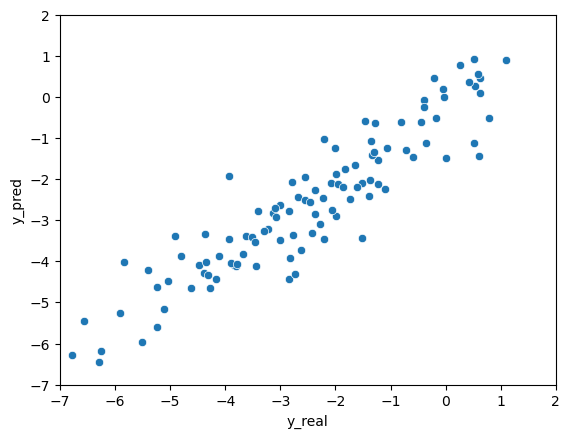

elapsed time: 82.10453629493713
run: 52
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807B830760>, <torch.utils.data.dataset.Subset object at 0x00000180D3AB6D60>, <torch.utils.data.dataset.Subset object at 0x00000180D3AB68E0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1): GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  68609


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 5.671872647603353 | Validation Loss 5.52194881439209
Epoch 10 | Train Loss 3.800830300649007 | Validation Loss 4.90770161151886
Epoch 20 | Train Loss 3.3184678395589193 | Validation Loss 4.316448092460632
Epoch 30 | Train Loss 2.99341889222463 | Validation Loss 3.9303942918777466
Epoch 40 | Train Loss 2.950257694721222 | Validation Loss 3.0107581615448
Epoch 50 | Train Loss 2.3107569217681885 | Validation Loss 2.809635877609253
Epoch 60 | Train Loss 2.363938005765279 | Validation Loss 2.685528874397278
Epoch 70 | Train Loss 1.887729787826538 | Validation Loss 2.4985207319259644
Epoch 80 | Train Loss 1.9356228550275167 | Validation Loss 2.0365071296691895
Epoch 90 | Train Loss 1.7174991448720296 | Validation Loss 2.064315676689148
Epoch 100 | Train Loss 1.549834394454956 | Validation Loss 1.8521019220352173
Epoch 110 | Train Loss 1.4200649817784627 | Validation Loss 2.0276742577552795
Epoch 120 | Train Loss 1.5463200648625692 | Validation Loss 2.57191801071167
Epoch

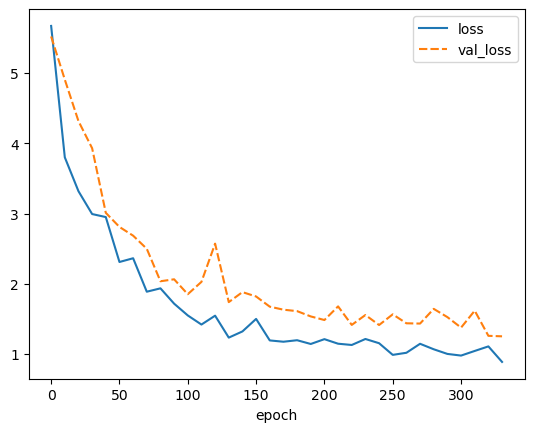

best weights loaded


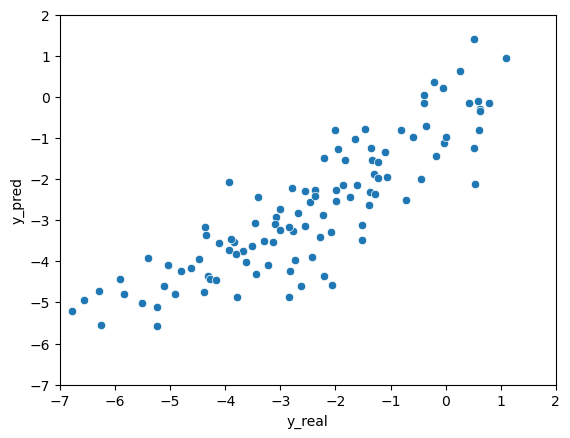

elapsed time: 73.11218428611755
run: 53
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 2, 'aggregations_list': [<function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807B9070A0>, <torch.utils.data.dataset.Subset object at 0x00000180D3A43E80>, <torch.utils.data.dataset.Subset object at 0x00000180D3A59370>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1): GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  68609


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.262034622828166 | Validation Loss 5.512775659561157
Epoch 10 | Train Loss 3.2883132537206015 | Validation Loss 4.490717887878418
Epoch 20 | Train Loss 2.973395601908366 | Validation Loss 4.02997088432312
Epoch 30 | Train Loss 2.449056017398834 | Validation Loss 3.4171382188796997
Epoch 40 | Train Loss 2.612599515914917 | Validation Loss 2.808131694793701
Epoch 50 | Train Loss 2.2284608681996665 | Validation Loss 2.4234418272972107
Epoch 60 | Train Loss 2.4026006778081257 | Validation Loss 2.597391366958618
Epoch 70 | Train Loss 1.5455323696136474 | Validation Loss 1.988254964351654
Epoch 80 | Train Loss 1.4722561796506246 | Validation Loss 2.0359639525413513
Epoch 90 | Train Loss 1.5085531949996949 | Validation Loss 1.9454822540283203
Epoch 100 | Train Loss 1.279296048482259 | Validation Loss 1.7129629850387573
Epoch 110 | Train Loss 1.3825755874315897 | Validation Loss 2.2059155106544495
Epoch 120 | Train Loss 1.3857409199078878 | Validation Loss 2.1489730477333

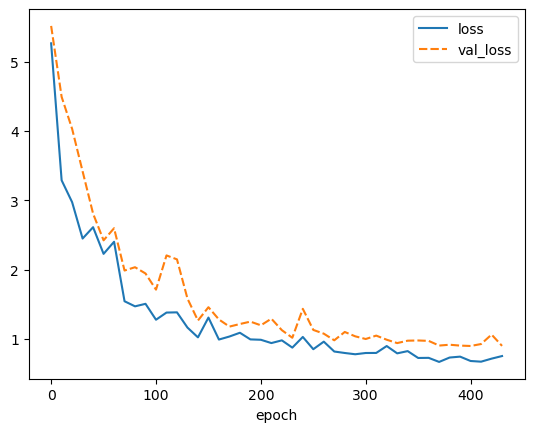

best weights loaded


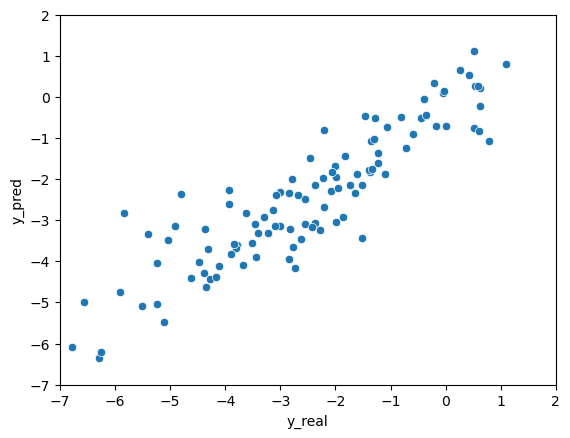

elapsed time: 102.02494859695435
run: 54
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>, <function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000180D3A9FDF0>, <torch.utils.data.dataset.Subset object at 0x000001807BA74AF0>, <torch.utils.data.dataset.Subset object at 0x00000180D3B8EA60>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-2): 2 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  134657


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 7.2199744065602625 | Validation Loss 6.008193016052246
Epoch 10 | Train Loss 3.3638054291407267 | Validation Loss 4.333049058914185
Epoch 20 | Train Loss 2.550413497289022 | Validation Loss 3.4187638759613037
Epoch 30 | Train Loss 1.9181501706441244 | Validation Loss 2.15790855884552
Epoch 40 | Train Loss 1.5126406749089558 | Validation Loss 1.7665631175041199
Epoch 50 | Train Loss 1.290830957889557 | Validation Loss 1.7026137709617615
Epoch 60 | Train Loss 1.2258744835853577 | Validation Loss 1.4445201754570007
Epoch 70 | Train Loss 1.0777513106664023 | Validation Loss 1.4265106320381165
Epoch 80 | Train Loss 1.200841204325358 | Validation Loss 1.3780415058135986
Epoch 90 | Train Loss 0.9448272585868835 | Validation Loss 1.6255073547363281
Epoch 100 | Train Loss 1.1078333338101705 | Validation Loss 1.2535669803619385
Epoch 110 | Train Loss 1.160706341266632 | Validation Loss 1.7087780833244324
Epoch 120 | Train Loss 0.9104071259498596 | Validation Loss 1.583208620

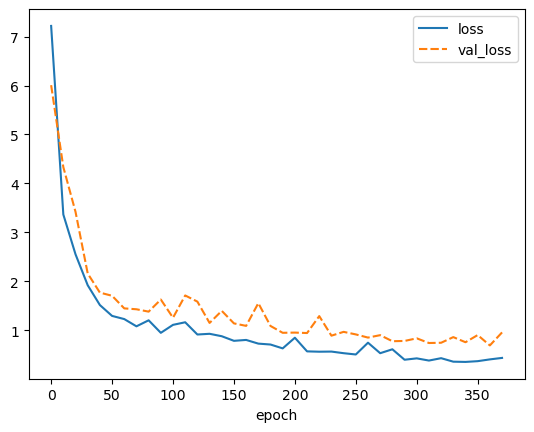

best weights loaded


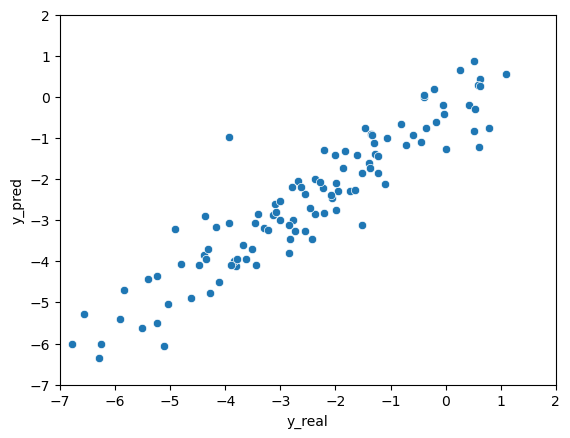

elapsed time: 103.6476469039917
run: 55
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807BC7C0A0>, <torch.utils.data.dataset.Subset object at 0x00000180D3E6AAC0>, <torch.utils.data.dataset.Subset object at 0x00000180D3E6AE50>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-2): 2 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  134401


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 5.445069869359334 | Validation Loss 5.607281446456909
Epoch 10 | Train Loss 3.697438192367554 | Validation Loss 4.1729536056518555
Epoch 20 | Train Loss 2.688894740740458 | Validation Loss 3.2222572565078735
Epoch 30 | Train Loss 2.1677597125371295 | Validation Loss 3.129655599594116
Epoch 40 | Train Loss 1.7711990515391032 | Validation Loss 2.134528636932373
Epoch 50 | Train Loss 1.4075501720110575 | Validation Loss 1.9060834646224976
Epoch 60 | Train Loss 2.396896417935689 | Validation Loss 2.083520293235779
Epoch 70 | Train Loss 1.5610992829004924 | Validation Loss 2.16616952419281
Epoch 80 | Train Loss 1.3270254135131836 | Validation Loss 1.8349682092666626
Epoch 90 | Train Loss 1.1695650498072305 | Validation Loss 1.73368501663208
Epoch 100 | Train Loss 1.3351158420244853 | Validation Loss 2.3826707005500793
Epoch 110 | Train Loss 1.1829008877277374 | Validation Loss 2.510118246078491
Epoch 120 | Train Loss 1.0578475932280222 | Validation Loss 1.43986046314239

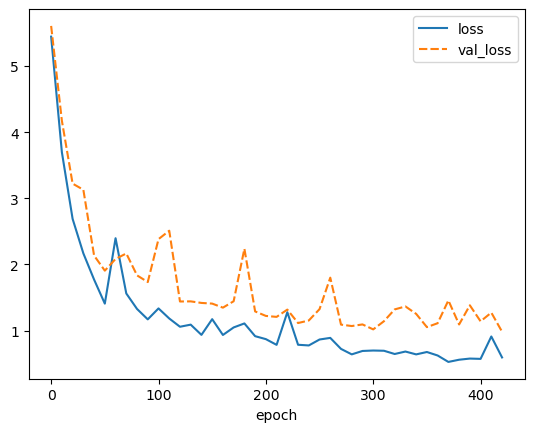

best weights loaded


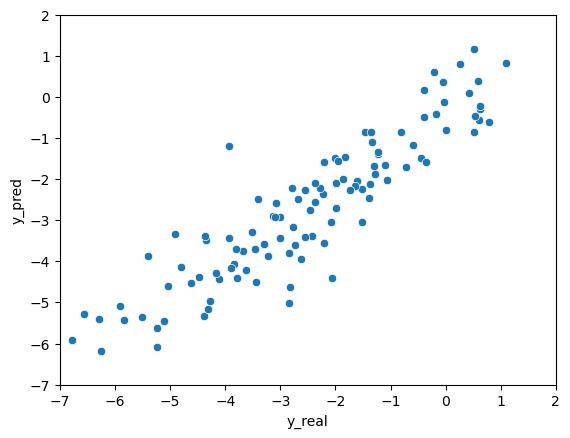

elapsed time: 109.032541513443
run: 56
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 3, 'aggregations_list': [<function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807B871A60>, <torch.utils.data.dataset.Subset object at 0x00000180D4041520>, <torch.utils.data.dataset.Subset object at 0x00000180D4041A30>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-2): 2 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  134401


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.557806491851807 | Validation Loss 5.662237882614136
Epoch 10 | Train Loss 3.328476095199585 | Validation Loss 4.261086702346802
Epoch 20 | Train Loss 2.6467599868774414 | Validation Loss 3.207036256790161
Epoch 30 | Train Loss 2.292551549275716 | Validation Loss 2.5760577917099
Epoch 40 | Train Loss 2.0976598421732584 | Validation Loss 2.3752042055130005
Epoch 50 | Train Loss 1.463634685675303 | Validation Loss 1.8256586790084839
Epoch 60 | Train Loss 1.412231989701589 | Validation Loss 1.75226229429245
Epoch 70 | Train Loss 1.1825057943662007 | Validation Loss 1.474011480808258
Epoch 80 | Train Loss 1.2036550283432006 | Validation Loss 1.5566728711128235
Epoch 90 | Train Loss 1.0406954089800518 | Validation Loss 1.1917625069618225
Epoch 100 | Train Loss 0.921687662601471 | Validation Loss 1.1332713663578033
Epoch 110 | Train Loss 0.9575346867243449 | Validation Loss 1.1334284543991089
Epoch 120 | Train Loss 0.8967145880063375 | Validation Loss 1.37423574924469
E

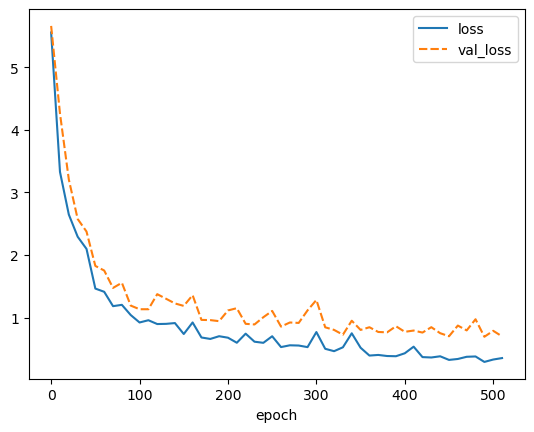

best weights loaded


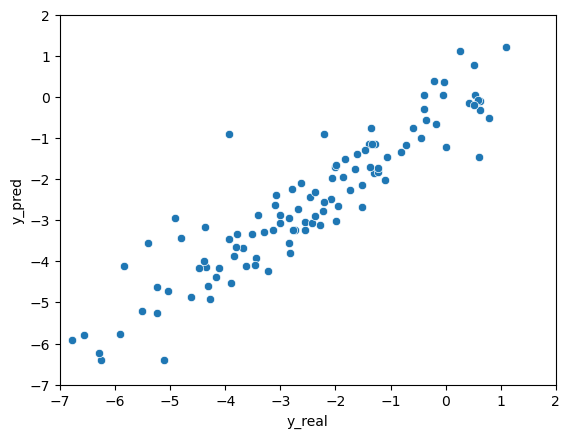

elapsed time: 140.7374005317688
run: 57
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>, <function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000180D3A3B040>, <torch.utils.data.dataset.Subset object at 0x00000180D3EDF7C0>, <torch.utils.data.dataset.Subset object at 0x00000180D3EDF580>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.564143784840902 | Validation Loss 5.616723537445068
Epoch 10 | Train Loss 3.6504217783610025 | Validation Loss 4.041904449462891
Epoch 20 | Train Loss 2.5073797623316447 | Validation Loss 2.935980200767517
Epoch 30 | Train Loss 1.9973901192347208 | Validation Loss 2.281371295452118
Epoch 40 | Train Loss 2.200667142868042 | Validation Loss 2.1042314767837524
Epoch 50 | Train Loss 1.312627629439036 | Validation Loss 1.7720009088516235
Epoch 60 | Train Loss 1.448969046274821 | Validation Loss 1.596195936203003
Epoch 70 | Train Loss 1.5831928173700969 | Validation Loss 1.6127082705497742
Epoch 80 | Train Loss 1.1532793005307516 | Validation Loss 1.4993832111358643
Epoch 90 | Train Loss 1.278576409816742 | Validation Loss 1.5416147708892822
Epoch 100 | Train Loss 1.198556669553121 | Validation Loss 1.4273729920387268
Epoch 110 | Train Loss 0.8894083619117736 | Validation Loss 1.2794311344623566
Epoch 120 | Train Loss 0.7073198596636454 | Validation Loss 1.440477550029

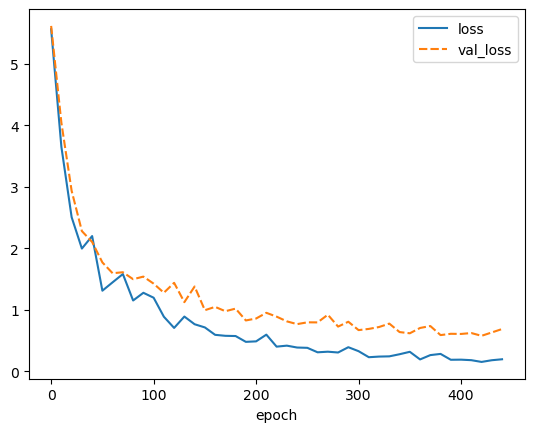

best weights loaded


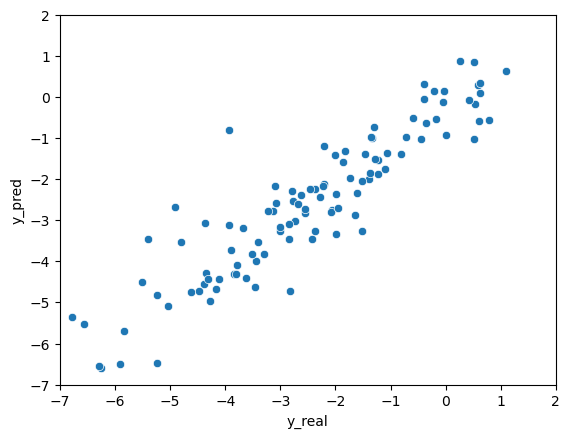

elapsed time: 136.89685249328613
run: 58
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807CDCC340>, <torch.utils.data.dataset.Subset object at 0x00000180D3F68040>, <torch.utils.data.dataset.Subset object at 0x00000180D3F68370>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 6.17484401067098 | Validation Loss 7.210428714752197
Epoch 10 | Train Loss 3.5738731225331626 | Validation Loss 4.980273962020874
Epoch 20 | Train Loss 3.1369478702545166 | Validation Loss 3.952188491821289
Epoch 30 | Train Loss 2.62234312693278 | Validation Loss 3.089778780937195
Epoch 40 | Train Loss 1.966506290435791 | Validation Loss 3.0837589502334595
Epoch 50 | Train Loss 1.926478417714437 | Validation Loss 2.064223825931549
Epoch 60 | Train Loss 1.7543532252311707 | Validation Loss 2.028754949569702
Epoch 70 | Train Loss 2.040292811393738 | Validation Loss 1.9007391929626465
Epoch 80 | Train Loss 1.3013029495875041 | Validation Loss 2.2170034646987915
Epoch 90 | Train Loss 1.0825859944025675 | Validation Loss 2.0121092796325684
Epoch 100 | Train Loss 1.1561186174551645 | Validation Loss 1.566513478755951
Epoch 110 | Train Loss 1.1081132332483927 | Validation Loss 1.3783934712409973
Epoch 120 | Train Loss 1.0032353480656941 | Validation Loss 1.414921641349792

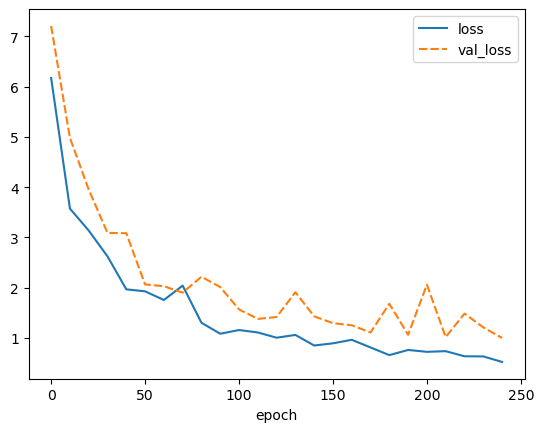

best weights loaded


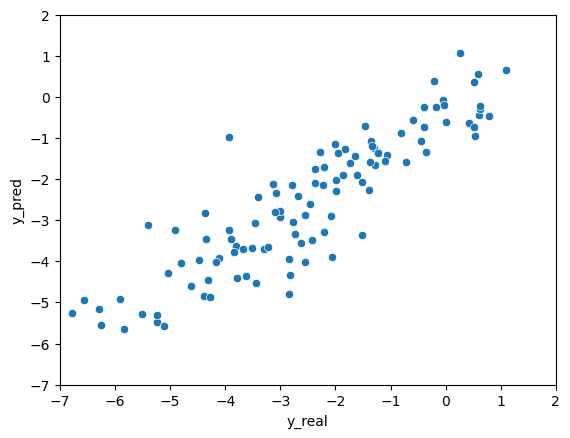

elapsed time: 73.9593575000763
run: 59
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000180D3CFE370>, <torch.utils.data.dataset.Subset object at 0x00000180D27F89A0>, <torch.utils.data.dataset.Subset object at 0x00000180D39532B0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.414732805887858 | Validation Loss 5.686010837554932
Epoch 10 | Train Loss 3.4012429396311443 | Validation Loss 4.507278680801392
Epoch 20 | Train Loss 2.7055420716603598 | Validation Loss 3.6229634284973145
Epoch 30 | Train Loss 2.092706036567688 | Validation Loss 2.7711814641952515
Epoch 40 | Train Loss 1.7352822780609132 | Validation Loss 2.029562473297119
Epoch 50 | Train Loss 1.5344621022542317 | Validation Loss 1.66725492477417
Epoch 60 | Train Loss 1.3544331709543864 | Validation Loss 2.0817955136299133
Epoch 70 | Train Loss 1.178572158018748 | Validation Loss 1.883021056652069
Epoch 80 | Train Loss 1.193081025282542 | Validation Loss 1.4051006436347961
Epoch 90 | Train Loss 1.0430268804232279 | Validation Loss 1.4259339570999146
Epoch 100 | Train Loss 0.9438242793083191 | Validation Loss 1.3237581849098206
Epoch 110 | Train Loss 0.9291964093844096 | Validation Loss 1.3555204272270203
Epoch 120 | Train Loss 0.9558017412821452 | Validation Loss 1.21166431903

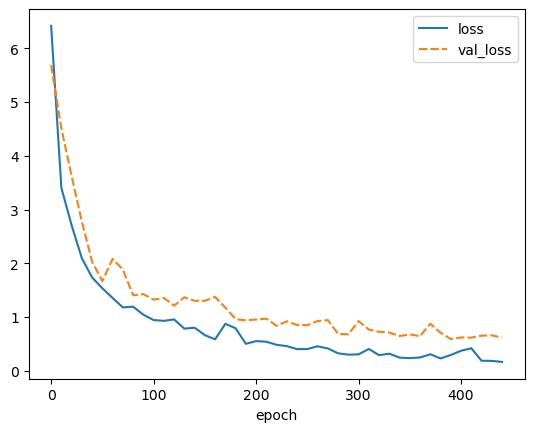

best weights loaded


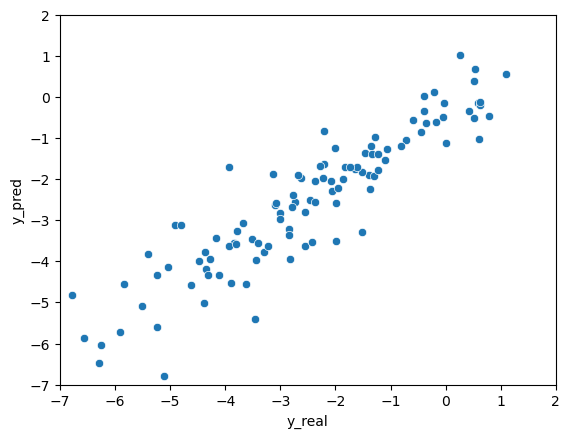

elapsed time: 136.36049509048462
run: 60
{'hidden_channels_list': [256], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>, <function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807B7FDA60>, <torch.utils.data.dataset.Subset object at 0x00000180D3F22190>, <torch.utils.data.dataset.Subset object at 0x00000180D3F226A0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  3073
Epoch 0 | Train Loss 6.338136196136475 | Validation Loss 6.036870002746582


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 10 | Train Loss 3.6446651458740233 | Validation Loss 4.561729192733765
Epoch 20 | Train Loss 3.5197422981262205 | Validation Loss 4.189799785614014
Epoch 30 | Train Loss 3.0650242805480956 | Validation Loss 4.138831973075867
Epoch 40 | Train Loss 2.9274357000986737 | Validation Loss 3.7944586277008057
Epoch 50 | Train Loss 2.6492363929748537 | Validation Loss 3.5269412994384766
Epoch 60 | Train Loss 2.550388479232788 | Validation Loss 3.285668134689331
Epoch 70 | Train Loss 2.422671377658844 | Validation Loss 3.152755856513977
Epoch 80 | Train Loss 2.315135606129964 | Validation Loss 3.057661294937134
Epoch 90 | Train Loss 2.32385622660319 | Validation Loss 2.94248366355896
Epoch 100 | Train Loss 2.1296591997146606 | Validation Loss 3.3981051445007324
Epoch 110 | Train Loss 1.9967752854029337 | Validation Loss 2.7185877561569214
Epoch 120 | Train Loss 2.1220645904541016 | Validation Loss 2.4484684467315674
Epoch 130 | Train Loss 1.800916310151418 | Validation Loss 2.3757113218307

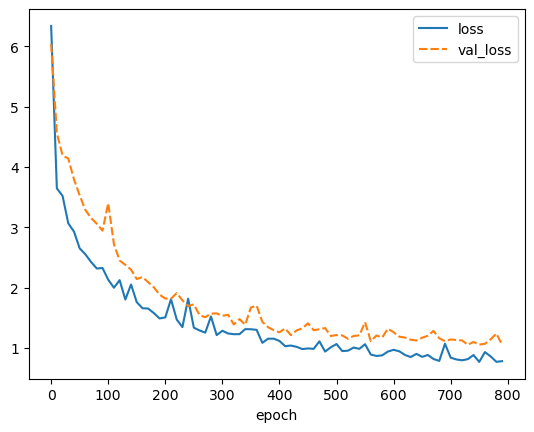

best weights loaded


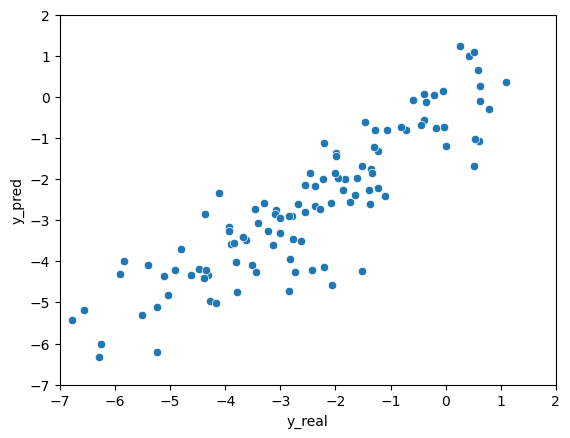

elapsed time: 159.7610788345337
run: 61
{'hidden_channels_list': [256], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000180D3B14D00>, <torch.utils.data.dataset.Subset object at 0x00000180D3EF5430>, <torch.utils.data.dataset.Subset object at 0x00000180D3EF5AF0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  2817


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 8.017734670639038 | Validation Loss 5.877593994140625
Epoch 10 | Train Loss 3.7315508842468263 | Validation Loss 5.014408826828003
Epoch 20 | Train Loss 3.59973308245341 | Validation Loss 4.670988321304321
Epoch 30 | Train Loss 3.5555603981018065 | Validation Loss 4.62468409538269
Epoch 40 | Train Loss 3.8910951137542726 | Validation Loss 4.706516861915588
Epoch 50 | Train Loss 3.5825046062469483 | Validation Loss 4.490825533866882
Epoch 60 | Train Loss 3.6200300375620524 | Validation Loss 4.670246481895447
Epoch 70 | Train Loss 3.2491642951965334 | Validation Loss 4.068568825721741
Epoch 80 | Train Loss 3.2544082959493 | Validation Loss 3.9557418823242188
Epoch 90 | Train Loss 3.0447604020436603 | Validation Loss 3.6901395320892334
Epoch 100 | Train Loss 2.711385130882263 | Validation Loss 3.5802433490753174
Epoch 110 | Train Loss 2.6384767015775044 | Validation Loss 3.5703293085098267
Epoch 120 | Train Loss 2.5697931051254272 | Validation Loss 3.3950369358062744


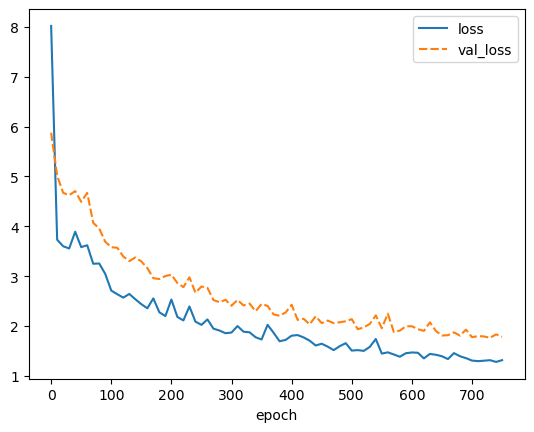

best weights loaded


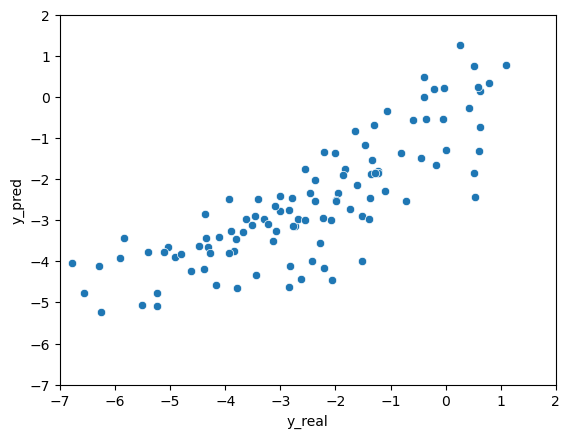

elapsed time: 147.56820821762085
run: 62
{'hidden_channels_list': [256], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 1, 'aggregations_list': [<function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000180D396BE80>, <torch.utils.data.dataset.Subset object at 0x00000180D3EEF0A0>, <torch.utils.data.dataset.Subset object at 0x00000180D3EEF310>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  2817
Epoch 0 | Train Loss 8.53052633603414 | Validation Loss 6.384422302246094


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 10 | Train Loss 3.5075725078582765 | Validation Loss 4.782036900520325
Epoch 20 | Train Loss 3.214823261896769 | Validation Loss 4.412958860397339
Epoch 30 | Train Loss 3.1657224814097087 | Validation Loss 4.2350568771362305
Epoch 40 | Train Loss 3.0599822203318277 | Validation Loss 4.108276605606079
Epoch 50 | Train Loss 2.829365277290344 | Validation Loss 4.017459154129028
Epoch 60 | Train Loss 2.882263120015462 | Validation Loss 3.9813263416290283
Epoch 70 | Train Loss 2.785106166203817 | Validation Loss 3.7926666736602783
Epoch 80 | Train Loss 2.7027155637741087 | Validation Loss 3.440453290939331
Epoch 90 | Train Loss 2.533892544110616 | Validation Loss 3.1850459575653076
Epoch 100 | Train Loss 2.285721147060394 | Validation Loss 3.38425350189209
Epoch 110 | Train Loss 2.2433573087056478 | Validation Loss 3.0344626903533936
Epoch 120 | Train Loss 2.373374652862549 | Validation Loss 2.944022536277771
Epoch 130 | Train Loss 2.1519814650217692 | Validation Loss 2.63685888051986

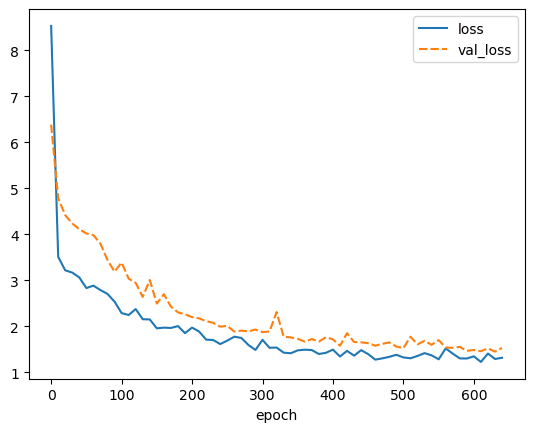

best weights loaded


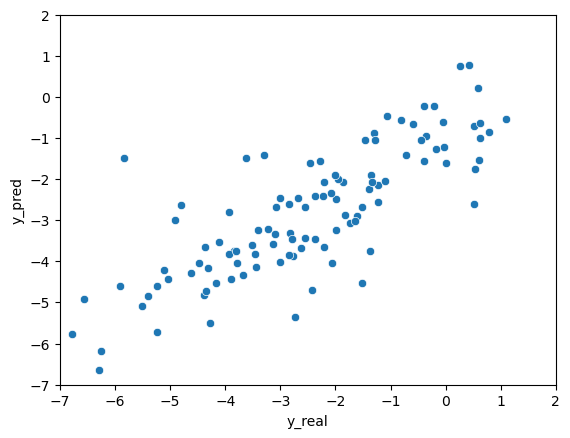

elapsed time: 123.67496609687805
run: 63
{'hidden_channels_list': [256], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>, <function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000180D38F8520>, <torch.utils.data.dataset.Subset object at 0x000001807BA858B0>, <torch.utils.data.dataset.Subset object at 0x000001807BA85580>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1): GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  68865


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.04162966410319 | Validation Loss 5.81099271774292
Epoch 10 | Train Loss 3.2876638968785605 | Validation Loss 4.331188917160034
Epoch 20 | Train Loss 2.8775792280832926 | Validation Loss 4.089564800262451
Epoch 30 | Train Loss 2.6876291036605835 | Validation Loss 3.2698761224746704
Epoch 40 | Train Loss 2.076189621289571 | Validation Loss 2.5512152910232544
Epoch 50 | Train Loss 2.0359091122945148 | Validation Loss 2.61901593208313
Epoch 60 | Train Loss 1.829968237876892 | Validation Loss 2.0636975169181824
Epoch 70 | Train Loss 1.645805835723877 | Validation Loss 1.9149900078773499
Epoch 80 | Train Loss 1.4972413063049317 | Validation Loss 1.7163749933242798
Epoch 90 | Train Loss 1.4164983828862507 | Validation Loss 1.7425194382667542
Epoch 100 | Train Loss 1.3619869669278464 | Validation Loss 1.6971606016159058
Epoch 110 | Train Loss 1.200248916943868 | Validation Loss 1.5038077235221863
Epoch 120 | Train Loss 1.1716567913691203 | Validation Loss 1.4818473458290

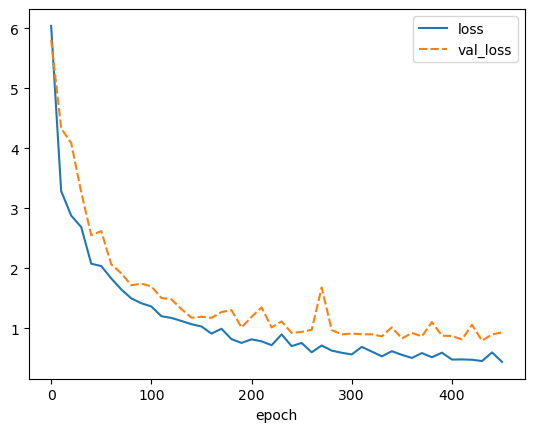

best weights loaded


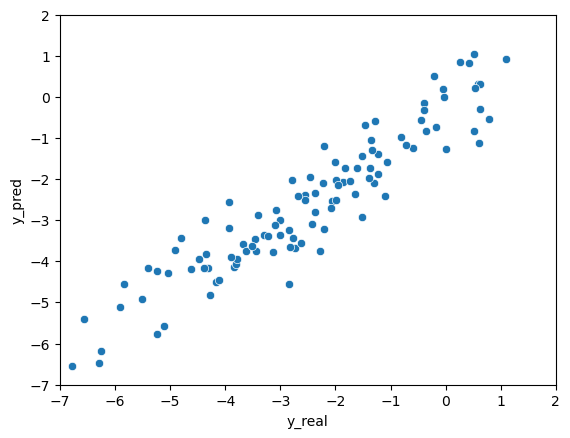

elapsed time: 110.25760221481323
run: 64
{'hidden_channels_list': [256], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000180D3CFEE50>, <torch.utils.data.dataset.Subset object at 0x00000180D3846A90>, <torch.utils.data.dataset.Subset object at 0x00000180D384D1C0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1): GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  68609


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 6.631381320953369 | Validation Loss 5.724949359893799
Epoch 10 | Train Loss 3.6927589734395343 | Validation Loss 4.860163450241089
Epoch 20 | Train Loss 3.476111157735189 | Validation Loss 4.126751184463501
Epoch 30 | Train Loss 2.833691867192586 | Validation Loss 3.4316344261169434
Epoch 40 | Train Loss 2.5773415088653566 | Validation Loss 2.922114849090576
Epoch 50 | Train Loss 2.187472414970398 | Validation Loss 3.0139795541763306
Epoch 60 | Train Loss 1.8935542583465577 | Validation Loss 2.3101006746292114
Epoch 70 | Train Loss 1.8477665185928345 | Validation Loss 2.058862626552582
Epoch 80 | Train Loss 1.8367195049921672 | Validation Loss 2.0135071873664856
Epoch 90 | Train Loss 1.7392854770024617 | Validation Loss 1.930457592010498
Epoch 100 | Train Loss 1.540078075726827 | Validation Loss 1.818691074848175
Epoch 110 | Train Loss 1.3264958063761394 | Validation Loss 1.7461960911750793
Epoch 120 | Train Loss 1.399953560034434 | Validation Loss 1.98904263973236

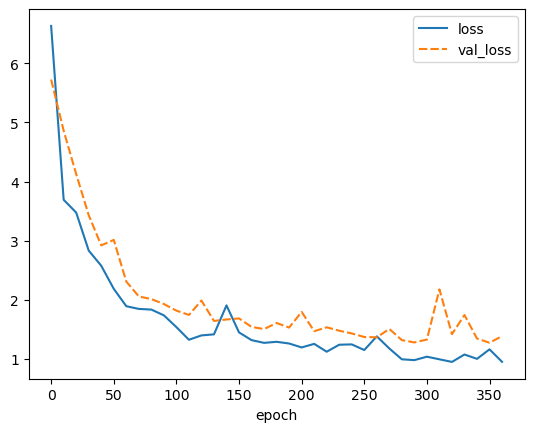

best weights loaded


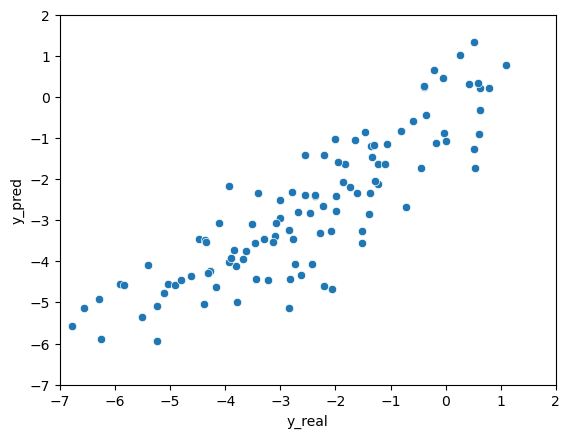

elapsed time: 73.64751839637756
run: 65
{'hidden_channels_list': [256], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 2, 'aggregations_list': [<function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807B8B5580>, <torch.utils.data.dataset.Subset object at 0x00000180D3BA92E0>, <torch.utils.data.dataset.Subset object at 0x00000180D3BA9910>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1): GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  68609
Epoch 0 | Train Loss 5.494348986943563 | Validation Loss 5.340133428573608


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 10 | Train Loss 3.336421251296997 | Validation Loss 4.571947693824768
Epoch 20 | Train Loss 2.816187795003255 | Validation Loss 4.080197215080261
Epoch 30 | Train Loss 2.5782615343729653 | Validation Loss 3.7474889755249023
Epoch 40 | Train Loss 2.2766801198323567 | Validation Loss 2.770784854888916
Epoch 50 | Train Loss 1.9771769285202025 | Validation Loss 3.0997939109802246
Epoch 60 | Train Loss 1.908987538019816 | Validation Loss 2.1578651666641235
Epoch 70 | Train Loss 1.5941710154215494 | Validation Loss 2.0342620611190796
Epoch 80 | Train Loss 1.616070572535197 | Validation Loss 1.8788301944732666
Epoch 90 | Train Loss 1.4009238600730896 | Validation Loss 1.8805949687957764
Epoch 100 | Train Loss 1.8071378310521444 | Validation Loss 1.8625869154930115
Epoch 110 | Train Loss 1.1012734711170196 | Validation Loss 1.2731555700302124
Epoch 120 | Train Loss 1.2142797072728475 | Validation Loss 1.5046828389167786
Epoch 130 | Train Loss 1.1158842404683431 | Validation Loss 2.112080

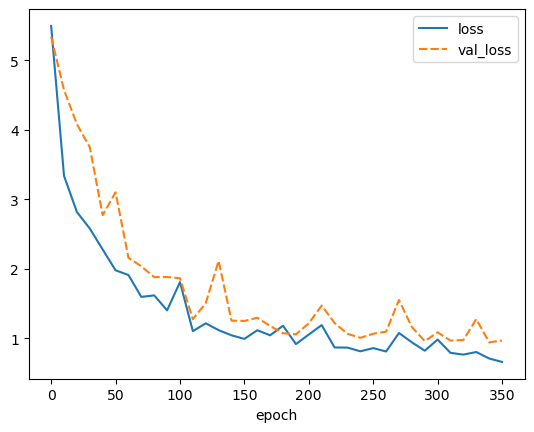

best weights loaded


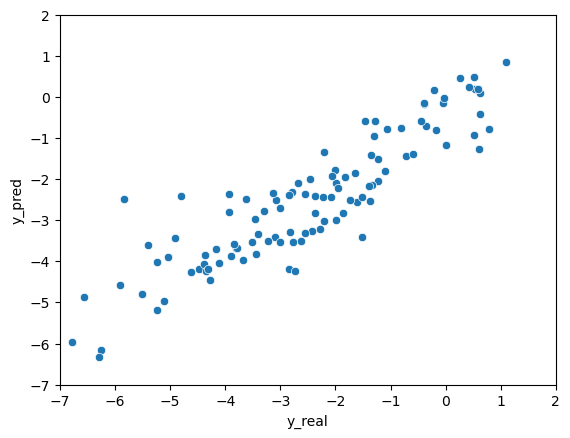

elapsed time: 76.16073179244995
run: 66
{'hidden_channels_list': [256], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>, <function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807CD60430>, <torch.utils.data.dataset.Subset object at 0x000001807BA7CFA0>, <torch.utils.data.dataset.Subset object at 0x000001807BA62C40>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-2): 2 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  134657


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.7424501021703085 | Validation Loss 5.664187550544739
Epoch 10 | Train Loss 3.098651377360026 | Validation Loss 4.41349458694458
Epoch 20 | Train Loss 2.334771434466044 | Validation Loss 2.605453670024872
Epoch 30 | Train Loss 1.7455697496732077 | Validation Loss 2.660623550415039
Epoch 40 | Train Loss 1.7538727204004922 | Validation Loss 1.9784310460090637
Epoch 50 | Train Loss 1.6182909568150838 | Validation Loss 2.1531604528427124
Epoch 60 | Train Loss 1.2201260566711425 | Validation Loss 1.743244469165802
Epoch 70 | Train Loss 1.1332947095235189 | Validation Loss 1.5116379857063293
Epoch 80 | Train Loss 1.2589047789573669 | Validation Loss 1.50602525472641
Epoch 90 | Train Loss 1.0692523876825968 | Validation Loss 1.3308783173561096
Epoch 100 | Train Loss 1.051116693019867 | Validation Loss 1.4063361287117004
Epoch 110 | Train Loss 0.983704129854838 | Validation Loss 1.3096398711204529
Epoch 120 | Train Loss 0.8140570928653081 | Validation Loss 1.1442212462425

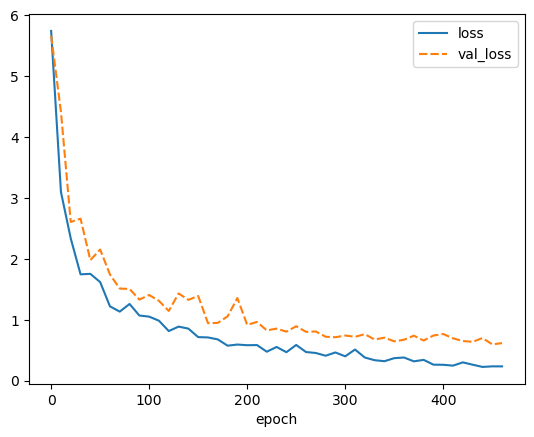

best weights loaded


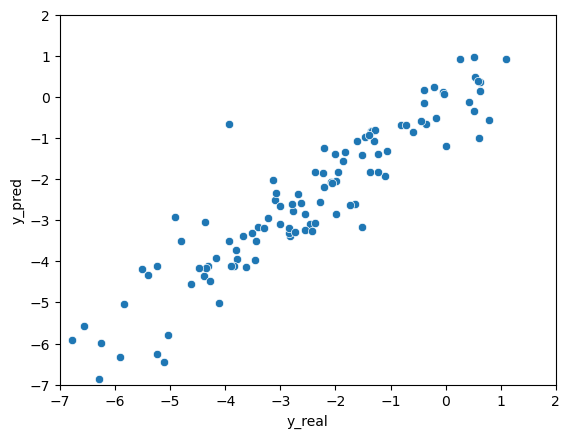

elapsed time: 116.30075550079346
run: 67
{'hidden_channels_list': [256], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807CCFCE50>, <torch.utils.data.dataset.Subset object at 0x00000180D3A8BA30>, <torch.utils.data.dataset.Subset object at 0x00000180D3A8BD90>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-2): 2 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  134401


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 6.275157109896342 | Validation Loss 5.767315864562988
Epoch 10 | Train Loss 3.4876649538675943 | Validation Loss 4.536725163459778
Epoch 20 | Train Loss 3.1146214167277018 | Validation Loss 4.050957202911377
Epoch 30 | Train Loss 2.9924695173899334 | Validation Loss 3.206766366958618
Epoch 40 | Train Loss 2.222088066736857 | Validation Loss 2.5637176036834717
Epoch 50 | Train Loss 1.6713332295417787 | Validation Loss 2.1872494220733643
Epoch 60 | Train Loss 1.6284945011138916 | Validation Loss 1.9494162201881409
Epoch 70 | Train Loss 1.5982149124145508 | Validation Loss 3.4505879878997803
Epoch 80 | Train Loss 1.4206018090248107 | Validation Loss 1.6914571523666382
Epoch 90 | Train Loss 1.4886685331662497 | Validation Loss 2.2559014558792114
Epoch 100 | Train Loss 1.144636595249176 | Validation Loss 1.7223562002182007
Epoch 110 | Train Loss 1.1821401596069336 | Validation Loss 1.5702588558197021
Epoch 120 | Train Loss 1.2128090103467306 | Validation Loss 1.46279954

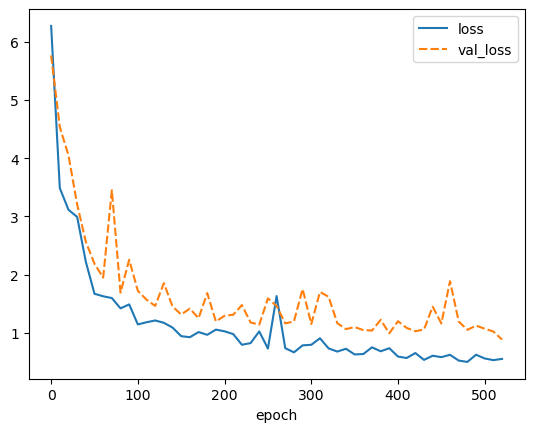

best weights loaded


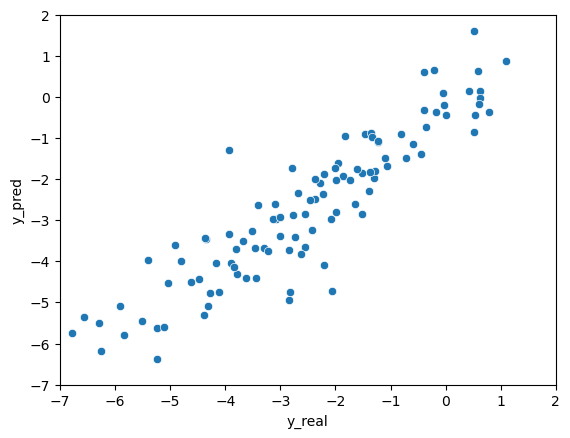

elapsed time: 124.84638738632202
run: 68
{'hidden_channels_list': [256], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 3, 'aggregations_list': [<function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807CFC7310>, <torch.utils.data.dataset.Subset object at 0x00000180D27D8310>, <torch.utils.data.dataset.Subset object at 0x00000180D27D87F0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-2): 2 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  134401


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.055239534378051 | Validation Loss 6.103148460388184
Epoch 10 | Train Loss 3.3219112078348796 | Validation Loss 4.590496063232422
Epoch 20 | Train Loss 2.699355379740397 | Validation Loss 3.5095804929733276
Epoch 30 | Train Loss 1.903155303001404 | Validation Loss 2.690233826637268
Epoch 40 | Train Loss 1.6058056433995564 | Validation Loss 2.1436229944229126
Epoch 50 | Train Loss 1.3827454646428425 | Validation Loss 1.671453595161438
Epoch 60 | Train Loss 1.2405653476715088 | Validation Loss 1.6730581521987915
Epoch 70 | Train Loss 1.377053701877594 | Validation Loss 1.4141202867031097
Epoch 80 | Train Loss 1.0710306286811828 | Validation Loss 1.273022174835205
Epoch 90 | Train Loss 0.9664688269297282 | Validation Loss 1.5318222045898438
Epoch 100 | Train Loss 1.092202909787496 | Validation Loss 1.1554228365421295
Epoch 110 | Train Loss 0.9422321438789367 | Validation Loss 1.2843204140663147
Epoch 120 | Train Loss 0.9829012672106425 | Validation Loss 1.35451298952

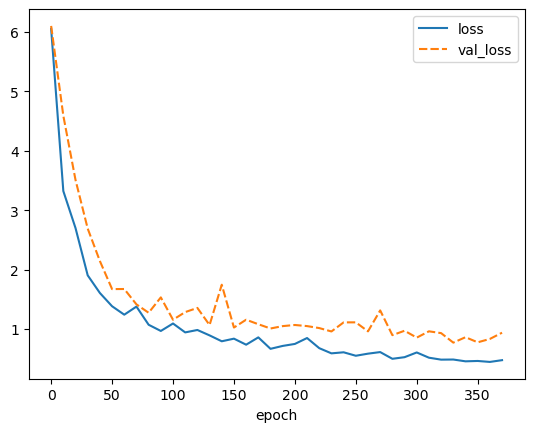

best weights loaded


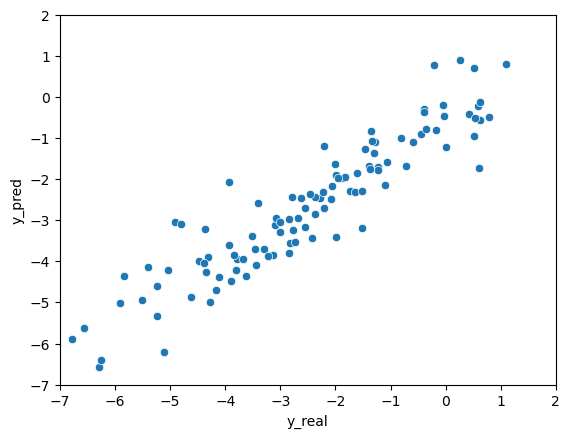

elapsed time: 81.45919585227966
run: 69
{'hidden_channels_list': [256], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>, <function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000180D3A46F40>, <torch.utils.data.dataset.Subset object at 0x00000180D403F370>, <torch.utils.data.dataset.Subset object at 0x00000180D403F850>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.596850808461507 | Validation Loss 6.6227946281433105
Epoch 10 | Train Loss 3.1010006268819175 | Validation Loss 3.942229986190796
Epoch 20 | Train Loss 2.4295095761617023 | Validation Loss 3.9874460697174072
Epoch 30 | Train Loss 1.8187525351842244 | Validation Loss 2.859166383743286
Epoch 40 | Train Loss 1.6439903100331625 | Validation Loss 1.9327503442764282
Epoch 50 | Train Loss 1.3437623977661133 | Validation Loss 1.9042933583259583
Epoch 60 | Train Loss 1.092262585957845 | Validation Loss 1.4419975876808167
Epoch 70 | Train Loss 1.1108599682648976 | Validation Loss 2.2290745973587036
Epoch 80 | Train Loss 1.1063965996106466 | Validation Loss 1.4031339287757874
Epoch 90 | Train Loss 0.8371072928110759 | Validation Loss 2.0055739283561707
Epoch 100 | Train Loss 0.8944758534431457 | Validation Loss 1.3661550283432007
Epoch 110 | Train Loss 0.7616261561711629 | Validation Loss 1.0846330225467682
Epoch 120 | Train Loss 0.6791297276814778 | Validation Loss 1.09664

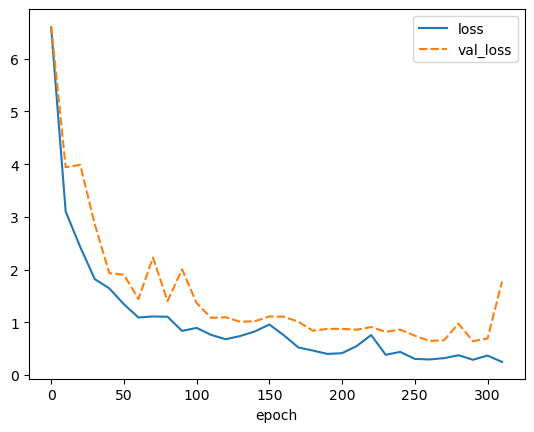

best weights loaded


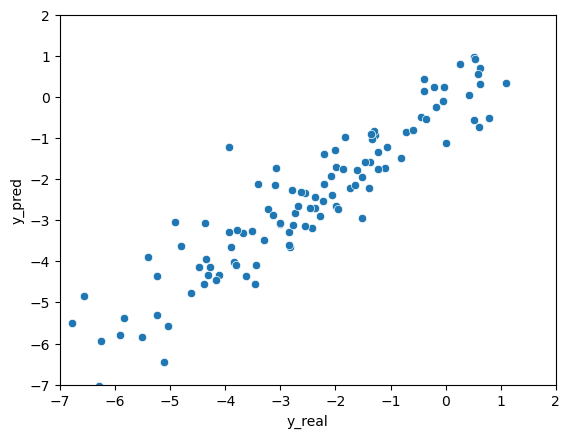

elapsed time: 76.86308240890503
run: 70
{'hidden_channels_list': [256], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807BB74D00>, <torch.utils.data.dataset.Subset object at 0x00000180D3F6CD00>, <torch.utils.data.dataset.Subset object at 0x00000180D3F62700>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 5.979258251190186 | Validation Loss 6.464110851287842
Epoch 10 | Train Loss 3.3401219685872396 | Validation Loss 4.413482666015625
Epoch 20 | Train Loss 2.7789692719777426 | Validation Loss 3.777249813079834
Epoch 30 | Train Loss 2.1948919773101805 | Validation Loss 2.3681992888450623
Epoch 40 | Train Loss 1.715104134877523 | Validation Loss 1.9459596276283264
Epoch 50 | Train Loss 1.577284534772237 | Validation Loss 2.170254111289978
Epoch 60 | Train Loss 1.6563612778981527 | Validation Loss 2.0031635761260986
Epoch 70 | Train Loss 1.1449163834253946 | Validation Loss 2.124546229839325
Epoch 80 | Train Loss 1.2658222635587058 | Validation Loss 1.5967757105827332
Epoch 90 | Train Loss 1.3725227157274882 | Validation Loss 1.552198350429535
Epoch 100 | Train Loss 1.2328590472539267 | Validation Loss 1.5574965476989746
Epoch 110 | Train Loss 1.5220806360244752 | Validation Loss 1.4231773614883423
Epoch 120 | Train Loss 1.05812246799469 | Validation Loss 1.710021674633

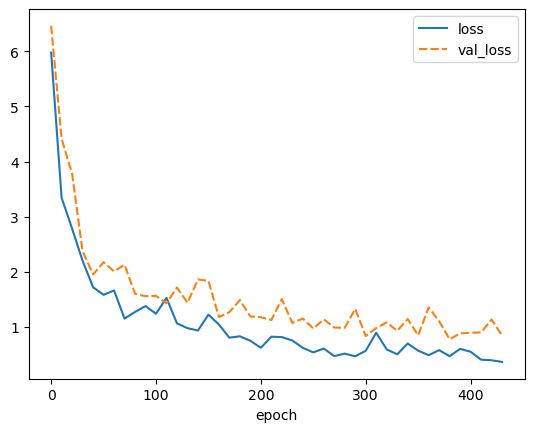

best weights loaded


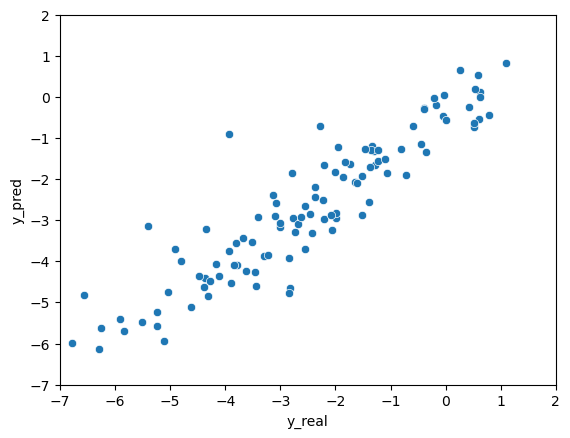

elapsed time: 99.391517162323
run: 71
{'hidden_channels_list': [256], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807BB5BD30>, <torch.utils.data.dataset.Subset object at 0x00000180D3FF3C70>, <torch.utils.data.dataset.Subset object at 0x00000180D3FF38B0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.405113156636556 | Validation Loss 5.952417612075806
Epoch 10 | Train Loss 3.485554647445679 | Validation Loss 4.096763849258423
Epoch 20 | Train Loss 2.572278626759847 | Validation Loss 2.7256293296813965
Epoch 30 | Train Loss 1.9532065312067668 | Validation Loss 2.2287667989730835
Epoch 40 | Train Loss 1.5869654933611552 | Validation Loss 1.8319984674453735
Epoch 50 | Train Loss 1.3643261432647704 | Validation Loss 1.9975185990333557
Epoch 60 | Train Loss 1.5349762916564942 | Validation Loss 1.5947365164756775
Epoch 70 | Train Loss 1.174696389834086 | Validation Loss 1.5296474695205688
Epoch 80 | Train Loss 0.9510188142458598 | Validation Loss 1.2075110971927643
Epoch 90 | Train Loss 0.8932817101478576 | Validation Loss 1.5740302205085754
Epoch 100 | Train Loss 0.9539191404978434 | Validation Loss 1.213854193687439
Epoch 110 | Train Loss 0.804525864124298 | Validation Loss 1.260399580001831
Epoch 120 | Train Loss 0.9919300218423207 | Validation Loss 1.2565790414

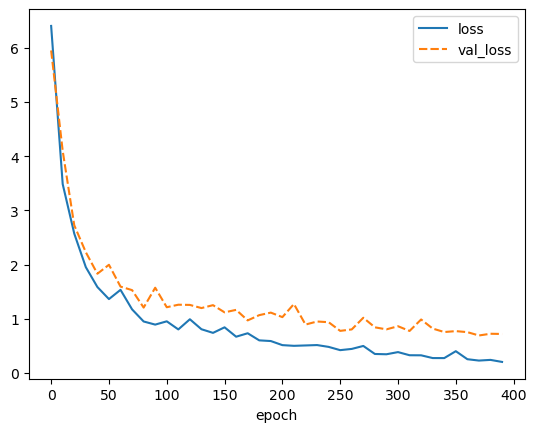

best weights loaded


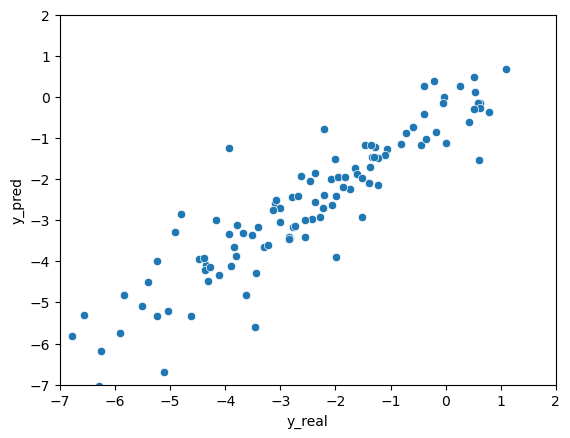

elapsed time: 92.75467824935913
run: 72
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>, <function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000180D3ACF910>, <torch.utils.data.dataset.Subset object at 0x00000180D27FEA00>, <torch.utils.data.dataset.Subset object at 0x00000180D27FE190>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  6145
Epoch 0 | Train Loss 6.79262646039327 | Validation Loss 6.080902099609375


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 10 | Train Loss 3.6839775880177816 | Validation Loss 4.6017420291900635
Epoch 20 | Train Loss 3.2436700503031415 | Validation Loss 4.584550619125366
Epoch 30 | Train Loss 2.979833730061849 | Validation Loss 3.8627333641052246
Epoch 40 | Train Loss 2.7916328430175783 | Validation Loss 3.6567031145095825
Epoch 50 | Train Loss 2.555541471640269 | Validation Loss 3.3341288566589355
Epoch 60 | Train Loss 2.5355144341786704 | Validation Loss 3.114668130874634
Epoch 70 | Train Loss 2.2215696732203165 | Validation Loss 2.9902236461639404
Epoch 80 | Train Loss 2.1473343133926392 | Validation Loss 2.6460646390914917
Epoch 90 | Train Loss 1.972398535410563 | Validation Loss 2.529802083969116
Epoch 100 | Train Loss 1.9367887099583945 | Validation Loss 2.5119287371635437
Epoch 110 | Train Loss 1.8642605861028037 | Validation Loss 3.6679811477661133
Epoch 120 | Train Loss 2.1365113417307535 | Validation Loss 2.1453956365585327
Epoch 130 | Train Loss 1.743676447868347 | Validation Loss 2.078072

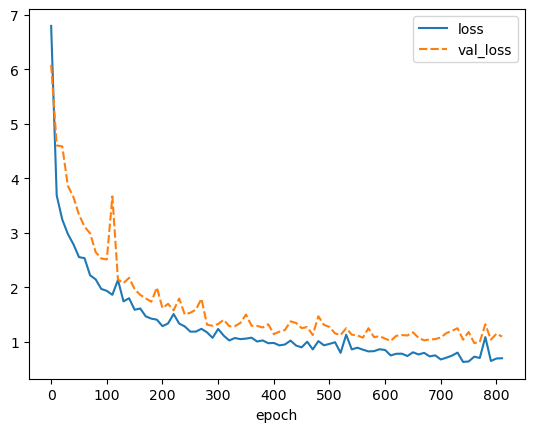

best weights loaded


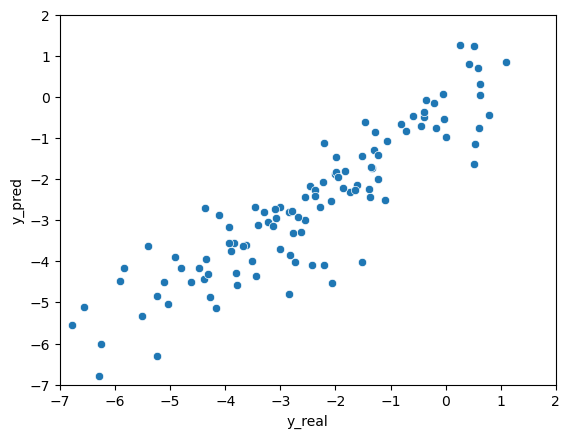

elapsed time: 134.8178346157074
run: 73
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807B885F40>, <torch.utils.data.dataset.Subset object at 0x00000180D3EA7760>, <torch.utils.data.dataset.Subset object at 0x00000180D3EBBA90>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  5633
Epoch 0 | Train Loss 7.975844510396322 | Validation Loss 5.916479825973511


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 10 | Train Loss 3.622188377380371 | Validation Loss 5.05652642250061
Epoch 20 | Train Loss 3.577578051884969 | Validation Loss 4.5483458042144775
Epoch 30 | Train Loss 3.5297491868336994 | Validation Loss 4.3893883228302
Epoch 40 | Train Loss 3.407606347401937 | Validation Loss 4.359448194503784
Epoch 50 | Train Loss 3.2481435616811116 | Validation Loss 4.124511480331421
Epoch 60 | Train Loss 3.064051612218221 | Validation Loss 3.8398029804229736
Epoch 70 | Train Loss 3.0605400721232097 | Validation Loss 4.290966868400574
Epoch 80 | Train Loss 2.8679855982462565 | Validation Loss 3.4926403760910034
Epoch 90 | Train Loss 2.651896580060323 | Validation Loss 3.502646803855896
Epoch 100 | Train Loss 2.57559920946757 | Validation Loss 3.165636420249939
Epoch 110 | Train Loss 2.521471150716146 | Validation Loss 3.3391942977905273
Epoch 120 | Train Loss 2.4341235160827637 | Validation Loss 2.9406245946884155
Epoch 130 | Train Loss 2.4569502115249633 | Validation Loss 2.971744418144226
E

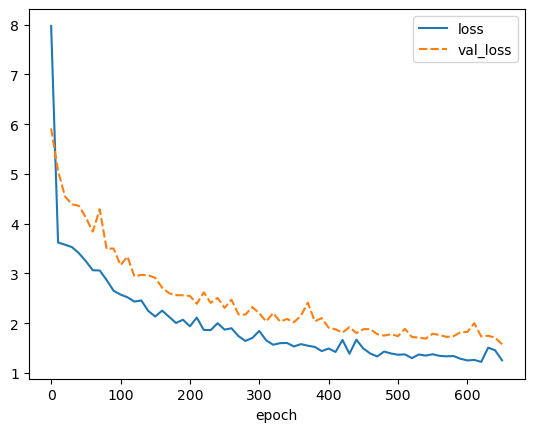

best weights loaded


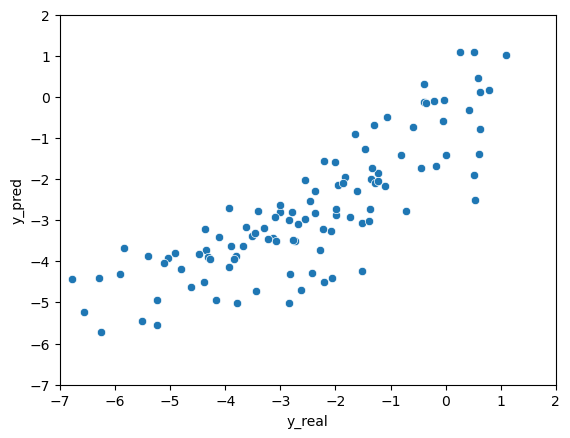

elapsed time: 100.06699872016907
run: 74
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 1, 'aggregations_list': [<function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807BC25400>, <torch.utils.data.dataset.Subset object at 0x00000180D3E389A0>, <torch.utils.data.dataset.Subset object at 0x000001807B825C40>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  5633
Epoch 0 | Train Loss 6.838760344187419 | Validation Loss 5.969146251678467


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 10 | Train Loss 3.4995296955108643 | Validation Loss 4.607660174369812
Epoch 20 | Train Loss 3.2472881078720093 | Validation Loss 4.419557094573975
Epoch 30 | Train Loss 3.057652739683787 | Validation Loss 4.2851738929748535
Epoch 40 | Train Loss 2.8892549435297648 | Validation Loss 3.8463618755340576
Epoch 50 | Train Loss 2.798805006345113 | Validation Loss 3.848212957382202
Epoch 60 | Train Loss 2.6812540690104165 | Validation Loss 3.478568196296692
Epoch 70 | Train Loss 2.441395692030589 | Validation Loss 3.4385623931884766
Epoch 80 | Train Loss 2.4068448066711428 | Validation Loss 3.1883060932159424
Epoch 90 | Train Loss 2.3130935351053874 | Validation Loss 2.902738869190216
Epoch 100 | Train Loss 2.3579151312510174 | Validation Loss 2.830846428871155
Epoch 110 | Train Loss 2.0805128971735636 | Validation Loss 2.6068568229675293
Epoch 120 | Train Loss 2.0390820344289144 | Validation Loss 2.609376549720764
Epoch 130 | Train Loss 2.4385735591252646 | Validation Loss 2.735859394

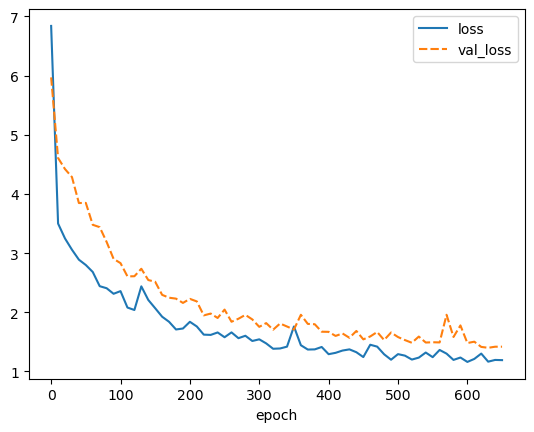

best weights loaded


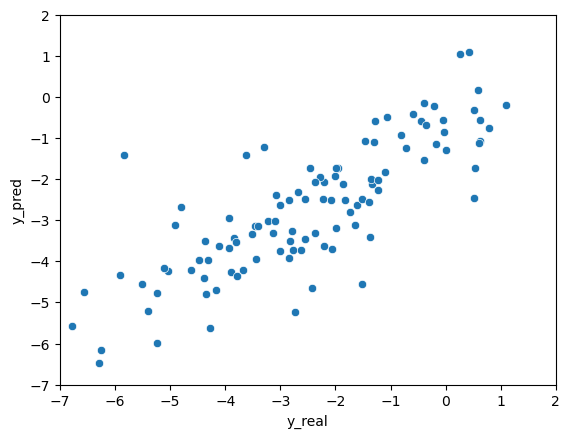

elapsed time: 110.45495438575745
run: 75
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>, <function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807BC25B50>, <torch.utils.data.dataset.Subset object at 0x00000180D27128B0>, <torch.utils.data.dataset.Subset object at 0x00000180D2712040>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1): GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  268801
Epoch 0 | Train Loss 5.538471460342407 | Validation Loss 6.818970680236816


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 10 | Train Loss 3.6760822772979735 | Validation Loss 4.560024261474609
Epoch 20 | Train Loss 2.618699804941813 | Validation Loss 3.7236530780792236
Epoch 30 | Train Loss 2.1693543990453086 | Validation Loss 2.8611384630203247
Epoch 40 | Train Loss 1.9955249945322673 | Validation Loss 2.236440062522888
Epoch 50 | Train Loss 1.5959299484888712 | Validation Loss 2.0841254591941833
Epoch 60 | Train Loss 1.6969884951909384 | Validation Loss 1.8159673810005188
Epoch 70 | Train Loss 1.3476483424504597 | Validation Loss 1.9155686497688293
Epoch 80 | Train Loss 1.6145134925842286 | Validation Loss 1.474253535270691
Epoch 90 | Train Loss 1.1170659899711608 | Validation Loss 1.366789162158966
Epoch 100 | Train Loss 1.3701660553614299 | Validation Loss 1.2186805605888367
Epoch 110 | Train Loss 0.9842624485492706 | Validation Loss 1.2718201279640198
Epoch 120 | Train Loss 0.9936898589134217 | Validation Loss 1.162587285041809
Epoch 130 | Train Loss 0.8881026268005371 | Validation Loss 1.04951

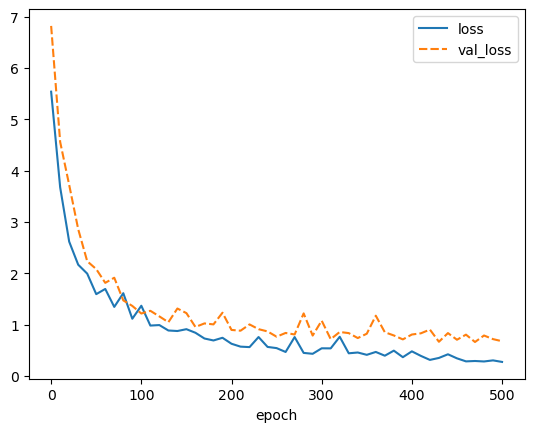

best weights loaded


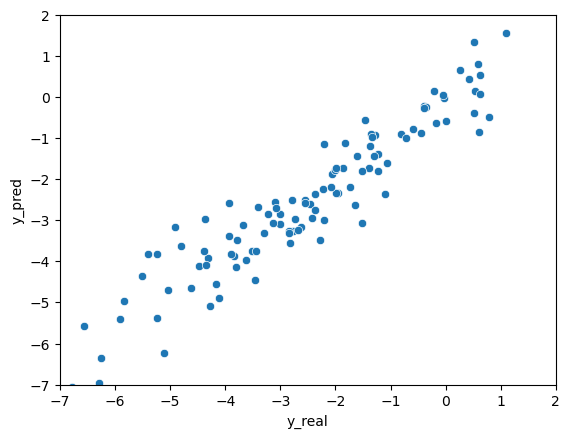

elapsed time: 107.41678357124329
run: 76
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807B807220>, <torch.utils.data.dataset.Subset object at 0x00000180D3DED4F0>, <torch.utils.data.dataset.Subset object at 0x00000180D384D100>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1): GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  268289


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 5.589288377761841 | Validation Loss 5.826045989990234
Epoch 10 | Train Loss 3.442818546295166 | Validation Loss 4.41506814956665
Epoch 20 | Train Loss 3.034267854690552 | Validation Loss 3.3941677808761597
Epoch 30 | Train Loss 2.292191576957703 | Validation Loss 2.8203577995300293
Epoch 40 | Train Loss 2.2306764443715412 | Validation Loss 2.499514877796173
Epoch 50 | Train Loss 1.956876850128174 | Validation Loss 2.3794522285461426
Epoch 60 | Train Loss 1.7058118502298991 | Validation Loss 2.220910906791687
Epoch 70 | Train Loss 1.899331529935201 | Validation Loss 3.6815325021743774
Epoch 80 | Train Loss 1.5465113004048665 | Validation Loss 1.8879384994506836
Epoch 90 | Train Loss 1.4523978630701702 | Validation Loss 2.4700229167938232
Epoch 100 | Train Loss 1.4127305666605632 | Validation Loss 2.819930672645569
Epoch 110 | Train Loss 1.766561257839203 | Validation Loss 1.7678383588790894
Epoch 120 | Train Loss 1.8390172163645426 | Validation Loss 1.92962211370468

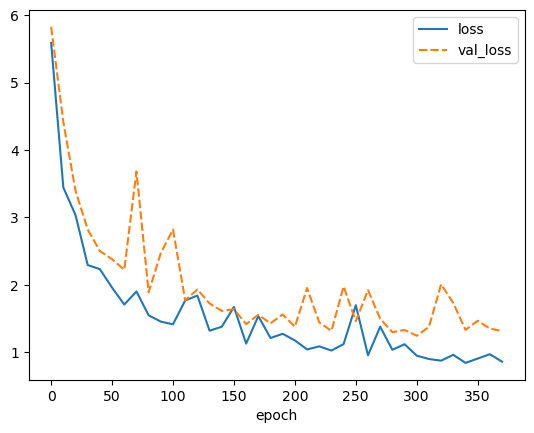

best weights loaded


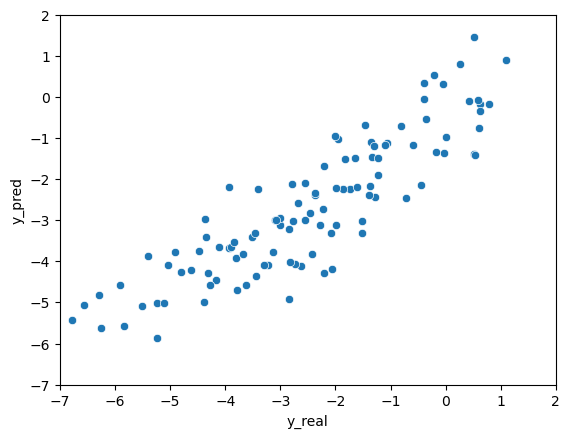

elapsed time: 81.38176965713501
run: 77
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 2, 'aggregations_list': [<function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000180D388D370>, <torch.utils.data.dataset.Subset object at 0x00000180D3B03280>, <torch.utils.data.dataset.Subset object at 0x00000180D3B03D60>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1): GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  268289


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.532900913556417 | Validation Loss 6.64108943939209
Epoch 10 | Train Loss 3.227327330907186 | Validation Loss 4.243015289306641
Epoch 20 | Train Loss 2.7643773396809896 | Validation Loss 3.3401297330856323
Epoch 30 | Train Loss 2.486496027310689 | Validation Loss 2.857167959213257
Epoch 40 | Train Loss 1.8801718831062317 | Validation Loss 2.294696569442749
Epoch 50 | Train Loss 1.8735381603240966 | Validation Loss 1.9422116875648499
Epoch 60 | Train Loss 1.5994926929473876 | Validation Loss 1.7233308553695679
Epoch 70 | Train Loss 1.367172408103943 | Validation Loss 1.6283930540084839
Epoch 80 | Train Loss 1.2778080662091573 | Validation Loss 1.3914058208465576
Epoch 90 | Train Loss 1.157504642009735 | Validation Loss 1.2607506215572357
Epoch 100 | Train Loss 1.1075764656066895 | Validation Loss 1.5300236940383911
Epoch 110 | Train Loss 1.1036277850468954 | Validation Loss 1.5422896146774292
Epoch 120 | Train Loss 0.9863817393779755 | Validation Loss 1.15605831146

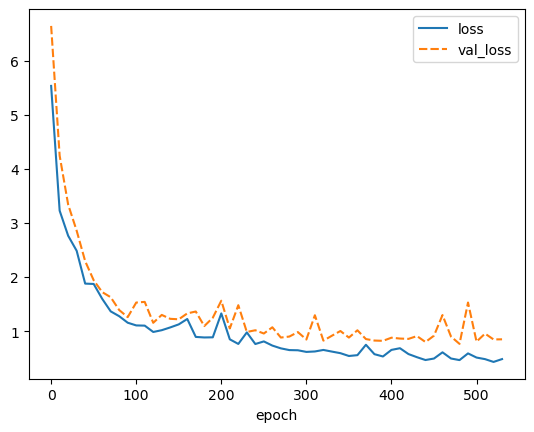

best weights loaded


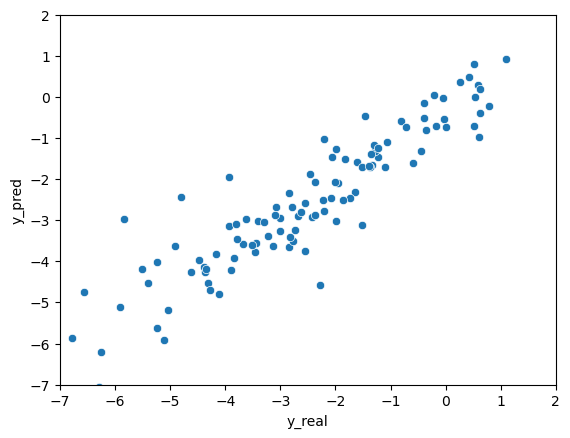

elapsed time: 108.60480332374573
run: 78
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>, <function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807B9254C0>, <torch.utils.data.dataset.Subset object at 0x000001807BA854F0>, <torch.utils.data.dataset.Subset object at 0x000001807BA85C70>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-2): 2 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  531457


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.633965555826823 | Validation Loss 5.47803258895874
Epoch 10 | Train Loss 3.01699055035909 | Validation Loss 3.8835208415985107
Epoch 20 | Train Loss 2.202841528256734 | Validation Loss 2.4589232206344604
Epoch 30 | Train Loss 1.7869683186213174 | Validation Loss 1.915946125984192
Epoch 40 | Train Loss 1.3483240803082783 | Validation Loss 2.5853776931762695
Epoch 50 | Train Loss 1.5508056124051413 | Validation Loss 1.861907184123993
Epoch 60 | Train Loss 1.1165643453598022 | Validation Loss 2.108279764652252
Epoch 70 | Train Loss 1.1874767621358235 | Validation Loss 1.2796215415000916
Epoch 80 | Train Loss 0.9318955143292745 | Validation Loss 1.2085806727409363
Epoch 90 | Train Loss 0.8271245360374451 | Validation Loss 1.2210912108421326
Epoch 100 | Train Loss 0.7538990000883738 | Validation Loss 1.091957151889801
Epoch 110 | Train Loss 0.8619800647099812 | Validation Loss 1.4019256234169006
Epoch 120 | Train Loss 0.6874553243319194 | Validation Loss 0.94665932655

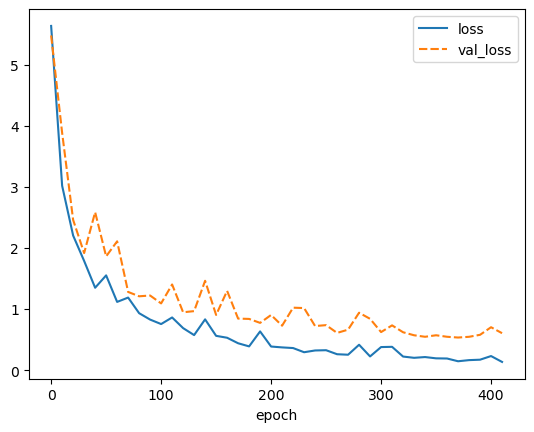

best weights loaded


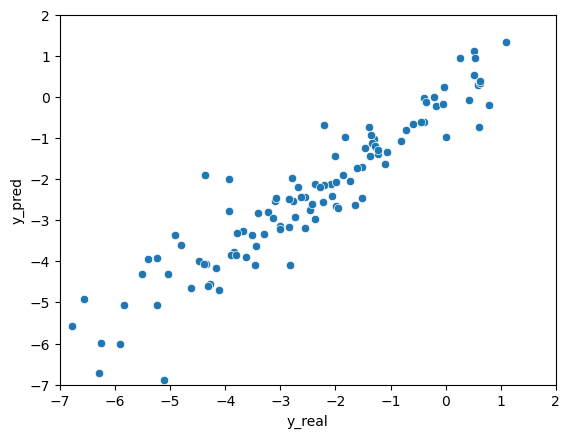

elapsed time: 101.7426745891571
run: 79
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807CCD4100>, <torch.utils.data.dataset.Subset object at 0x00000180D27439A0>, <torch.utils.data.dataset.Subset object at 0x00000180D2743D60>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-2): 2 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  530945


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 5.908276112874349 | Validation Loss 5.774641990661621
Epoch 10 | Train Loss 3.5321932315826414 | Validation Loss 4.766741991043091
Epoch 20 | Train Loss 3.0768794695536297 | Validation Loss 3.156309127807617
Epoch 30 | Train Loss 2.154152822494507 | Validation Loss 2.758857250213623
Epoch 40 | Train Loss 2.025264314810435 | Validation Loss 2.7676721811294556
Epoch 50 | Train Loss 1.8115345637003581 | Validation Loss 1.8545847535133362
Epoch 60 | Train Loss 1.3121554692586264 | Validation Loss 1.9359439015388489
Epoch 70 | Train Loss 1.4365147829055787 | Validation Loss 1.8859516382217407
Epoch 80 | Train Loss 1.6436138167977332 | Validation Loss 2.021352529525757
Epoch 90 | Train Loss 1.5716820359230042 | Validation Loss 1.6277767419815063
Epoch 100 | Train Loss 1.203537098566691 | Validation Loss 2.373733401298523
Epoch 110 | Train Loss 1.163297998905182 | Validation Loss 1.6982876062393188
Epoch 120 | Train Loss 1.093583917617798 | Validation Loss 1.6307319402694

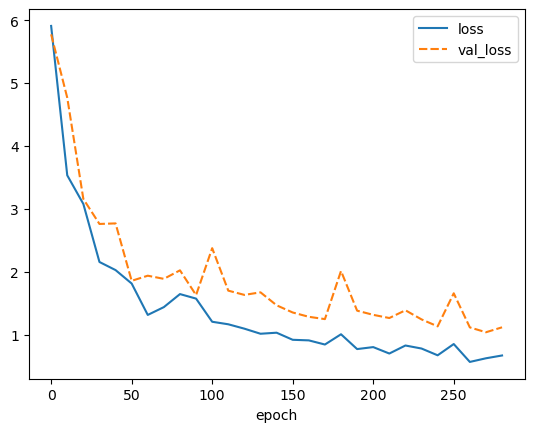

best weights loaded


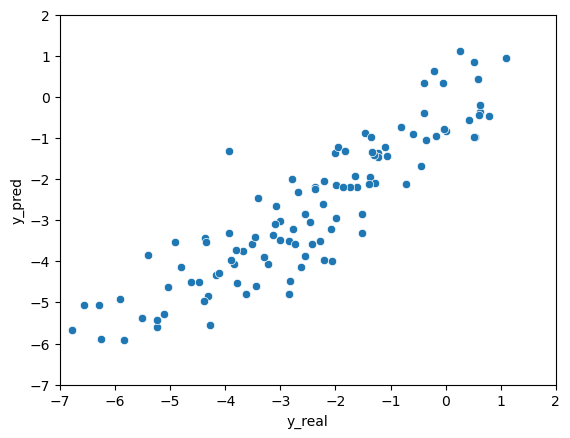

elapsed time: 67.0817322731018
run: 80
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 3, 'aggregations_list': [<function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807BA9B6D0>, <torch.utils.data.dataset.Subset object at 0x00000180D27E38E0>, <torch.utils.data.dataset.Subset object at 0x000001807BA157F0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-2): 2 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  530945


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.1900797367095945 | Validation Loss 5.534940481185913
Epoch 10 | Train Loss 2.9929642995198567 | Validation Loss 3.767119884490967
Epoch 20 | Train Loss 2.3062843640645343 | Validation Loss 3.8028101921081543
Epoch 30 | Train Loss 2.7404668807983397 | Validation Loss 2.5327025651931763
Epoch 40 | Train Loss 1.3803333242734273 | Validation Loss 1.566381812095642
Epoch 50 | Train Loss 1.4145239253838857 | Validation Loss 2.2872270345687866
Epoch 60 | Train Loss 1.199600100517273 | Validation Loss 1.4675100445747375
Epoch 70 | Train Loss 1.0930692036946614 | Validation Loss 2.1951546669006348
Epoch 80 | Train Loss 0.9930002768834432 | Validation Loss 1.2376611828804016
Epoch 90 | Train Loss 0.9163467268149058 | Validation Loss 1.210544615983963
Epoch 100 | Train Loss 0.8523276646931967 | Validation Loss 1.4377679228782654
Epoch 110 | Train Loss 0.9782158732414246 | Validation Loss 1.4508028030395508
Epoch 120 | Train Loss 1.0666881402333577 | Validation Loss 2.341074

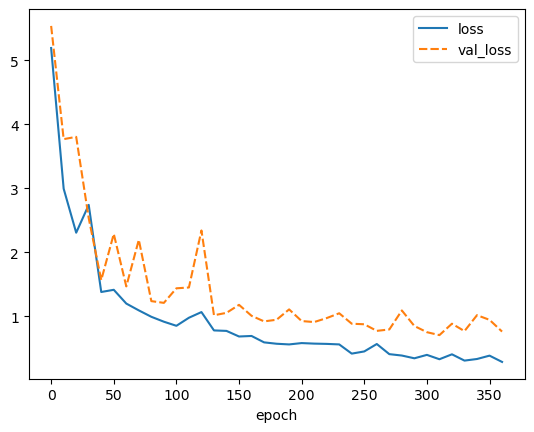

best weights loaded


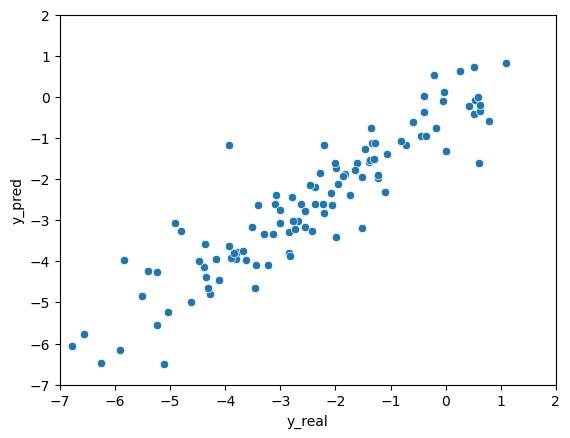

elapsed time: 87.19359755516052
run: 81
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>, <function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807B85CC10>, <torch.utils.data.dataset.Subset object at 0x00000180D3EB9E20>, <torch.utils.data.dataset.Subset object at 0x00000180D3DC3310>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  794113


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.132250467936198 | Validation Loss 5.690991163253784
Epoch 10 | Train Loss 3.3067811012268065 | Validation Loss 3.7063229084014893
Epoch 20 | Train Loss 1.8009685198465983 | Validation Loss 2.215669274330139
Epoch 30 | Train Loss 1.9626328309377035 | Validation Loss 1.7680487036705017
Epoch 40 | Train Loss 1.3035383105278016 | Validation Loss 1.6056236028671265
Epoch 50 | Train Loss 1.2555259664853413 | Validation Loss 1.5983229279518127
Epoch 60 | Train Loss 1.2596742510795593 | Validation Loss 1.360386610031128
Epoch 70 | Train Loss 0.970528777440389 | Validation Loss 1.6320653557777405
Epoch 80 | Train Loss 0.7510793189207713 | Validation Loss 1.1323624849319458
Epoch 90 | Train Loss 0.7452171862125396 | Validation Loss 1.3556550741195679
Epoch 100 | Train Loss 0.6646657129128773 | Validation Loss 1.4361985921859741
Epoch 110 | Train Loss 0.7082243641217549 | Validation Loss 1.0060831904411316
Epoch 120 | Train Loss 0.5483245730400086 | Validation Loss 0.982115

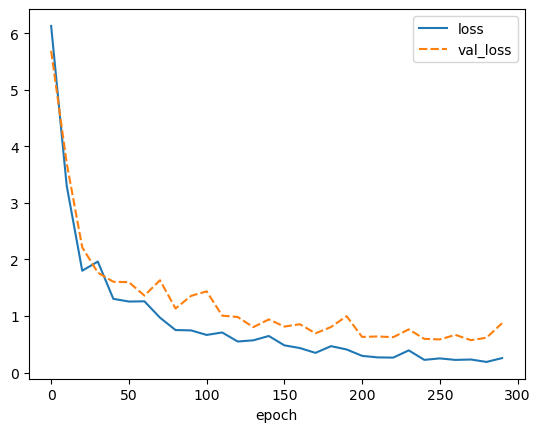

best weights loaded


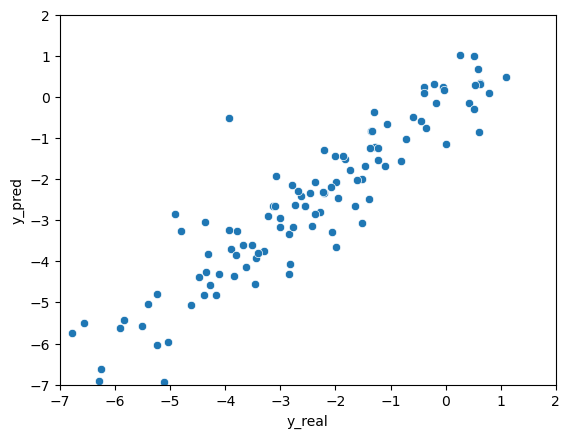

elapsed time: 83.99954795837402
run: 82
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000180D38EDFA0>, <torch.utils.data.dataset.Subset object at 0x00000180D40470A0>, <torch.utils.data.dataset.Subset object at 0x00000180D4047580>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 5.694513177871704 | Validation Loss 5.825486898422241
Epoch 10 | Train Loss 3.1024758299191793 | Validation Loss 3.8581336736679077
Epoch 20 | Train Loss 2.466846219698588 | Validation Loss 2.6505528688430786
Epoch 30 | Train Loss 1.777058521906535 | Validation Loss 2.0907374024391174
Epoch 40 | Train Loss 1.427155715227127 | Validation Loss 1.681864857673645
Epoch 50 | Train Loss 1.2587780157725017 | Validation Loss 1.5997260212898254
Epoch 60 | Train Loss 2.1567326307296755 | Validation Loss 2.106345295906067
Epoch 70 | Train Loss 2.160109504063924 | Validation Loss 2.0957728028297424
Epoch 80 | Train Loss 1.3848654588063558 | Validation Loss 1.5495403409004211
Epoch 90 | Train Loss 0.9800039092699687 | Validation Loss 3.0732767581939697
Epoch 100 | Train Loss 1.3500678280989329 | Validation Loss 1.3193917274475098
Epoch 110 | Train Loss 0.8784601410230001 | Validation Loss 1.3824328780174255
Epoch 120 | Train Loss 1.0292278448740642 | Validation Loss 1.208466798

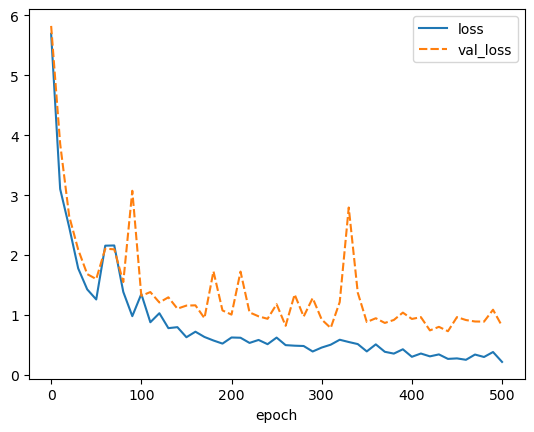

best weights loaded


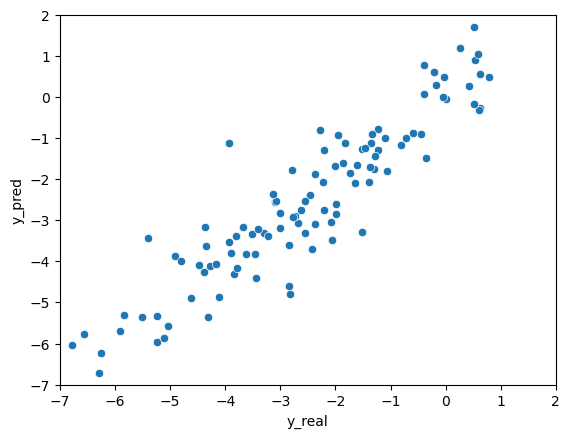

elapsed time: 129.38481879234314
run: 83
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000180D3AC16A0>, <torch.utils.data.dataset.Subset object at 0x00000180D3F2E8E0>, <torch.utils.data.dataset.Subset object at 0x00000180D3F3A3A0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.5155378977457685 | Validation Loss 5.356768608093262
Epoch 10 | Train Loss 2.9234535058339435 | Validation Loss 3.4979676008224487
Epoch 20 | Train Loss 2.895740755399068 | Validation Loss 2.7731714248657227
Epoch 30 | Train Loss 1.9336878697077433 | Validation Loss 2.209985136985779
Epoch 40 | Train Loss 1.559366226196289 | Validation Loss 1.6754555106163025
Epoch 50 | Train Loss 1.539530833562215 | Validation Loss 1.6620001792907715
Epoch 60 | Train Loss 1.223794368902842 | Validation Loss 1.8169313669204712
Epoch 70 | Train Loss 0.9997623920440674 | Validation Loss 1.483024775981903
Epoch 80 | Train Loss 1.0262547413508096 | Validation Loss 1.1305958032608032
Epoch 90 | Train Loss 0.919688214858373 | Validation Loss 1.0158770680427551
Epoch 100 | Train Loss 0.744132133324941 | Validation Loss 1.046461045742035
Epoch 110 | Train Loss 0.7234930296738943 | Validation Loss 1.2964812219142914
Epoch 120 | Train Loss 0.5937402149041494 | Validation Loss 0.95135807991

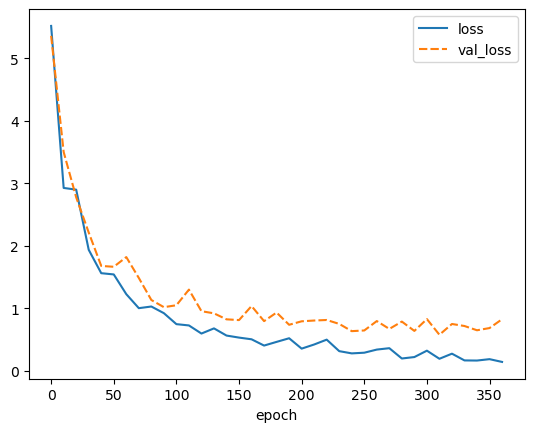

best weights loaded


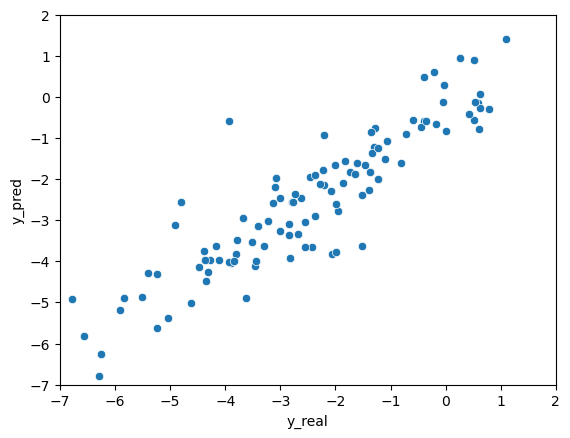

elapsed time: 97.15579032897949
run: 84
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>, <function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807CCC2D60>, <torch.utils.data.dataset.Subset object at 0x00000180D40DA2B0>, <torch.utils.data.dataset.Subset object at 0x00000180D40DAD30>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  6145
Epoch 0 | Train Loss 5.2023218154907225 | Validation Loss 5.5376410484313965


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 10 | Train Loss 3.4851465384165445 | Validation Loss 5.049952745437622
Epoch 20 | Train Loss 3.2599279085795083 | Validation Loss 4.19590437412262
Epoch 30 | Train Loss 3.0465356508890786 | Validation Loss 3.9200072288513184
Epoch 40 | Train Loss 2.63143527507782 | Validation Loss 3.303936243057251
Epoch 50 | Train Loss 2.3976986090342205 | Validation Loss 3.51462984085083
Epoch 60 | Train Loss 2.239165019989014 | Validation Loss 2.9690330028533936
Epoch 70 | Train Loss 2.103529198964437 | Validation Loss 2.695531964302063
Epoch 80 | Train Loss 1.9611412048339845 | Validation Loss 2.4597017765045166
Epoch 90 | Train Loss 1.9632066369056702 | Validation Loss 2.267773687839508
Epoch 100 | Train Loss 1.7961490154266357 | Validation Loss 2.2197868824005127
Epoch 110 | Train Loss 1.6989413499832153 | Validation Loss 2.076047658920288
Epoch 120 | Train Loss 1.6663295427958171 | Validation Loss 2.045614719390869
Epoch 130 | Train Loss 1.5485926985740661 | Validation Loss 2.0626755356788

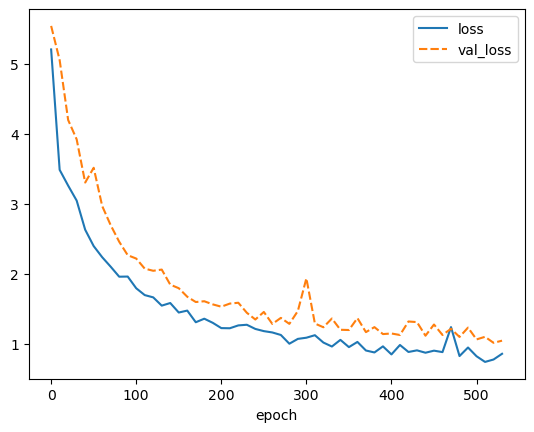

best weights loaded


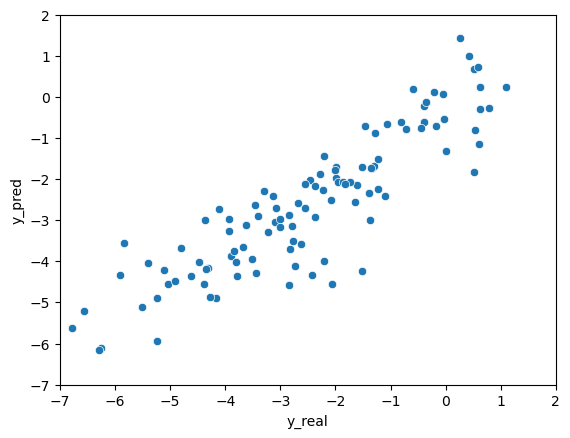

elapsed time: 91.30751037597656
run: 85
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807B9AB4C0>, <torch.utils.data.dataset.Subset object at 0x000001807B99F2E0>, <torch.utils.data.dataset.Subset object at 0x000001807B99FAF0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  5633
Epoch 0 | Train Loss 6.349612108866373 | Validation Loss 5.708858489990234


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 10 | Train Loss 3.761109797159831 | Validation Loss 4.858002662658691
Epoch 20 | Train Loss 3.5240859508514406 | Validation Loss 4.7037763595581055
Epoch 30 | Train Loss 3.35353733698527 | Validation Loss 4.456836462020874
Epoch 40 | Train Loss 3.3860870838165282 | Validation Loss 4.357886791229248
Epoch 50 | Train Loss 3.0743170579274497 | Validation Loss 4.1710779666900635
Epoch 60 | Train Loss 3.1609561761220295 | Validation Loss 3.888035774230957
Epoch 70 | Train Loss 2.8163448572158813 | Validation Loss 3.880098819732666
Epoch 80 | Train Loss 2.6303699731826784 | Validation Loss 3.471416473388672
Epoch 90 | Train Loss 2.517952036857605 | Validation Loss 3.4484044313430786
Epoch 100 | Train Loss 2.5478004296620687 | Validation Loss 3.2157633304595947
Epoch 110 | Train Loss 2.574350031216939 | Validation Loss 3.18476402759552
Epoch 120 | Train Loss 2.364580194155375 | Validation Loss 2.9799009561538696
Epoch 130 | Train Loss 2.480932283401489 | Validation Loss 2.86080658435821

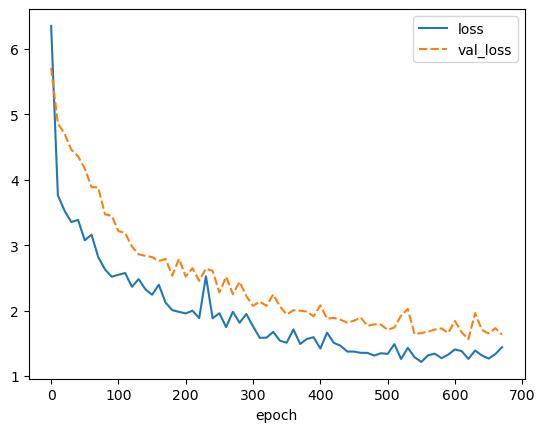

best weights loaded


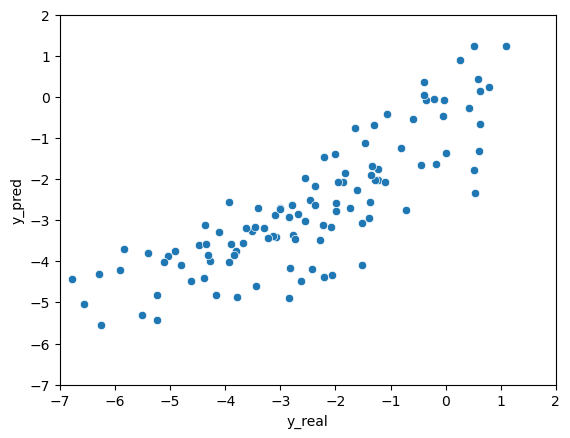

elapsed time: 106.7849326133728
run: 86
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 1, 'aggregations_list': [<function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000180D3B142B0>, <torch.utils.data.dataset.Subset object at 0x000001807BAB0550>, <torch.utils.data.dataset.Subset object at 0x000001807B9E8760>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  5633
Epoch 0 | Train Loss 5.550341558456421 | Validation Loss 5.898722410202026


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 10 | Train Loss 3.6034178415934246 | Validation Loss 4.7586082220077515
Epoch 20 | Train Loss 3.4973819414774576 | Validation Loss 4.267799615859985
Epoch 30 | Train Loss 2.9783919493357343 | Validation Loss 4.127534508705139
Epoch 40 | Train Loss 3.112794017791748 | Validation Loss 3.8608325719833374
Epoch 50 | Train Loss 2.6645886580149334 | Validation Loss 3.51115083694458
Epoch 60 | Train Loss 2.5718052943547565 | Validation Loss 3.2581307888031006
Epoch 70 | Train Loss 2.603702600797017 | Validation Loss 3.3249934911727905
Epoch 80 | Train Loss 2.5832725524902345 | Validation Loss 2.9249345660209656
Epoch 90 | Train Loss 2.1481237093607586 | Validation Loss 2.967260241508484
Epoch 100 | Train Loss 2.059045559167862 | Validation Loss 2.9341477155685425
Epoch 110 | Train Loss 1.9566298445065817 | Validation Loss 2.5394930839538574
Epoch 120 | Train Loss 2.1775144974390668 | Validation Loss 2.6136773824691772
Epoch 130 | Train Loss 1.9512672702471414 | Validation Loss 2.4733830

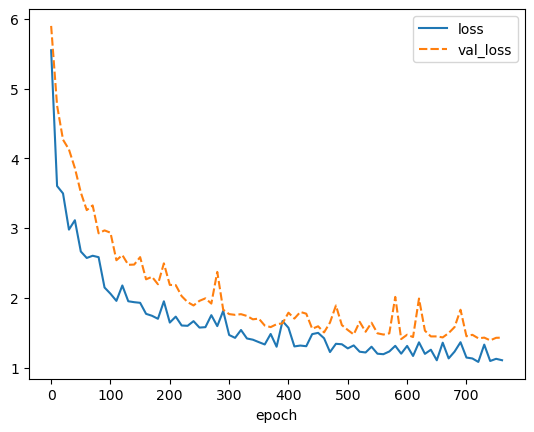

best weights loaded


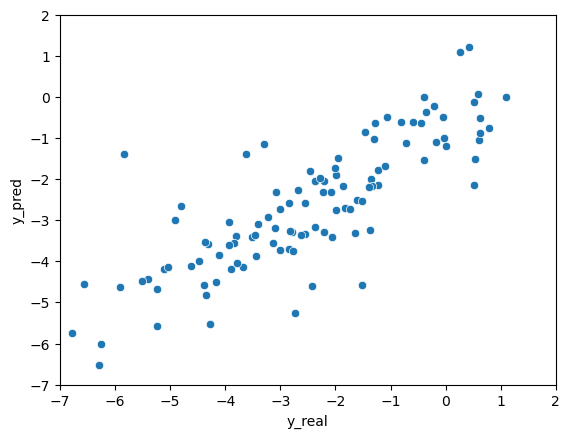

elapsed time: 125.43432998657227
run: 87
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>, <function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807B20EB80>, <torch.utils.data.dataset.Subset object at 0x000001807BB77580>, <torch.utils.data.dataset.Subset object at 0x00000180D40DA7F0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1): GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  268801


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.69925053914388 | Validation Loss 6.367797374725342
Epoch 10 | Train Loss 3.270490837097168 | Validation Loss 4.124835133552551
Epoch 20 | Train Loss 3.234727732340495 | Validation Loss 3.235604166984558
Epoch 30 | Train Loss 2.044884232680003 | Validation Loss 2.6738102436065674
Epoch 40 | Train Loss 1.8172199805577596 | Validation Loss 2.2606232166290283
Epoch 50 | Train Loss 1.892770520846049 | Validation Loss 2.0131797790527344
Epoch 60 | Train Loss 1.5841150085131328 | Validation Loss 1.802107810974121
Epoch 70 | Train Loss 1.286170776685079 | Validation Loss 1.7751938700675964
Epoch 80 | Train Loss 1.211592956384023 | Validation Loss 1.9266620874404907
Epoch 90 | Train Loss 1.2592187563578288 | Validation Loss 1.9628263711929321
Epoch 100 | Train Loss 0.9629851520061493 | Validation Loss 1.840178370475769
Epoch 110 | Train Loss 0.8904004375139872 | Validation Loss 1.2195028066635132
Epoch 120 | Train Loss 0.8558251857757568 | Validation Loss 1.27279752492904

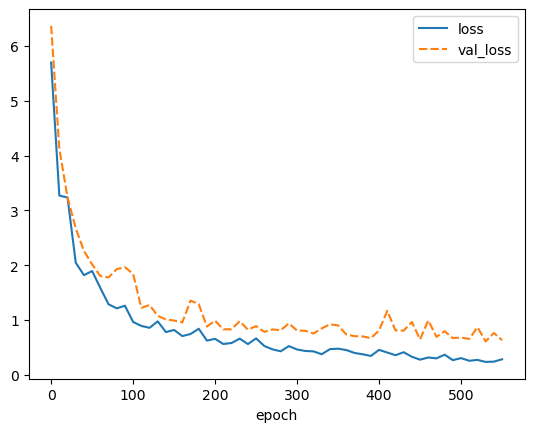

best weights loaded


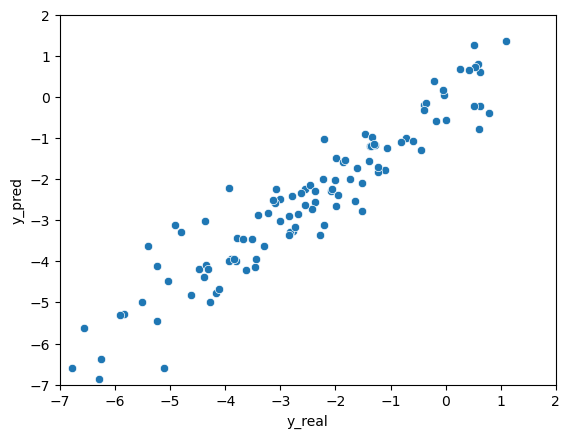

elapsed time: 117.03499507904053
run: 88
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000180D3AA3F10>, <torch.utils.data.dataset.Subset object at 0x00000180D400A340>, <torch.utils.data.dataset.Subset object at 0x00000180D3E2B160>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1): GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  268289


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 5.404621362686157 | Validation Loss 6.0200817584991455
Epoch 10 | Train Loss 3.8912960211435954 | Validation Loss 4.754772663116455
Epoch 20 | Train Loss 2.9145410378774006 | Validation Loss 3.6947548389434814
Epoch 30 | Train Loss 2.578263505299886 | Validation Loss 3.087492823600769
Epoch 40 | Train Loss 2.1262627760569255 | Validation Loss 2.36599200963974
Epoch 50 | Train Loss 1.8399540901184082 | Validation Loss 2.573077440261841
Epoch 60 | Train Loss 1.7137630979220073 | Validation Loss 2.075056493282318
Epoch 70 | Train Loss 1.4630649169286092 | Validation Loss 1.9232431054115295
Epoch 80 | Train Loss 1.464467473824819 | Validation Loss 1.7389960885047913
Epoch 90 | Train Loss 1.449983501434326 | Validation Loss 2.3854695558547974
Epoch 100 | Train Loss 1.5352282285690309 | Validation Loss 1.725746989250183
Epoch 110 | Train Loss 1.4113421201705934 | Validation Loss 2.710421562194824
Epoch 120 | Train Loss 1.5214454571406046 | Validation Loss 1.7624734640121

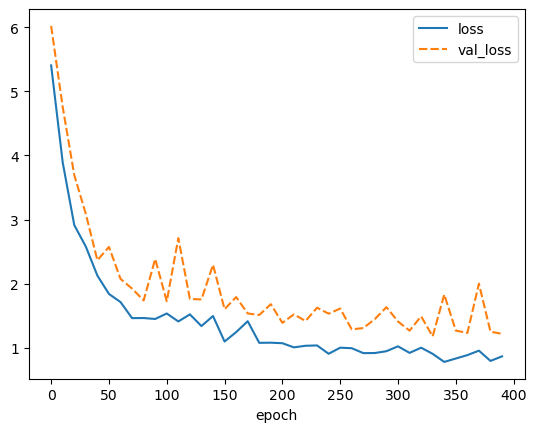

best weights loaded


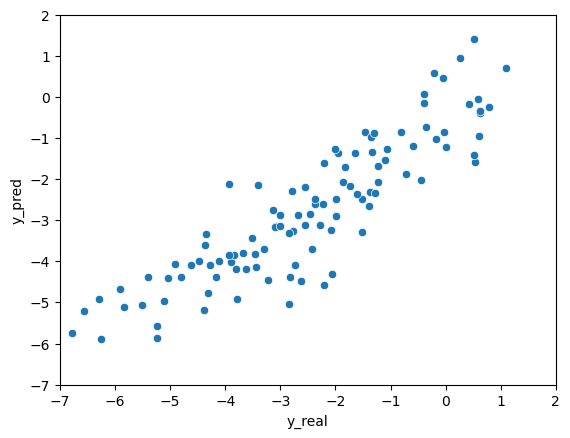

elapsed time: 80.24462461471558
run: 89
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 2, 'aggregations_list': [<function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000180D3AA3610>, <torch.utils.data.dataset.Subset object at 0x00000180D3C0E760>, <torch.utils.data.dataset.Subset object at 0x000001807CFC7E50>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1): GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  268289


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.202194325129191 | Validation Loss 5.968090295791626
Epoch 10 | Train Loss 2.9936702489852904 | Validation Loss 4.122533679008484
Epoch 20 | Train Loss 2.302729296684265 | Validation Loss 3.1729458570480347
Epoch 30 | Train Loss 1.9471762895584106 | Validation Loss 2.2175363302230835
Epoch 40 | Train Loss 1.6215196609497071 | Validation Loss 1.8532837629318237
Epoch 50 | Train Loss 1.6029240449269613 | Validation Loss 2.3123217821121216
Epoch 60 | Train Loss 1.384058956305186 | Validation Loss 1.9395374655723572
Epoch 70 | Train Loss 1.2706182718276977 | Validation Loss 2.163247525691986
Epoch 80 | Train Loss 1.1530495882034302 | Validation Loss 1.288296401500702
Epoch 90 | Train Loss 1.161860736211141 | Validation Loss 1.5315327942371368
Epoch 100 | Train Loss 1.103940733273824 | Validation Loss 1.2516965866088867
Epoch 110 | Train Loss 1.0733224948247273 | Validation Loss 1.1480185985565186
Epoch 120 | Train Loss 1.0257963399092356 | Validation Loss 1.4521658420

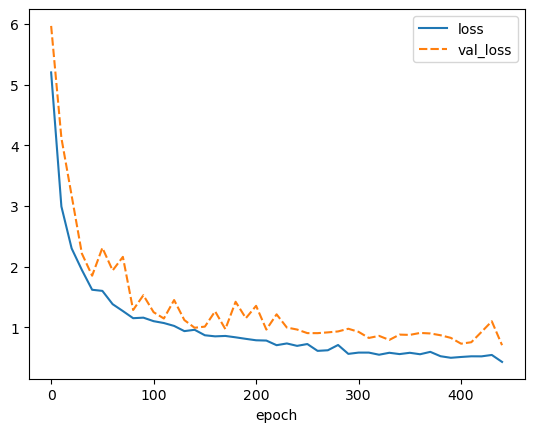

best weights loaded


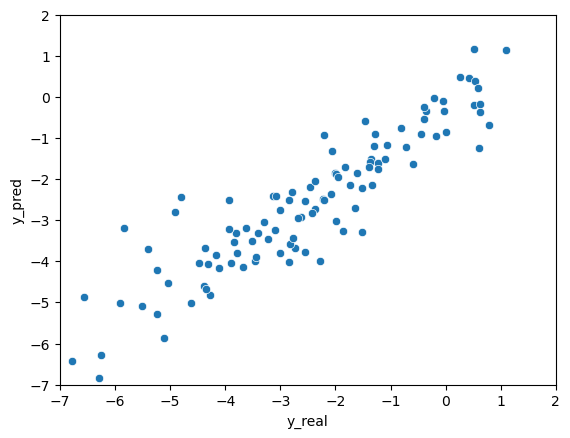

elapsed time: 92.99876856803894
run: 90
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>, <function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807B9FE910>, <torch.utils.data.dataset.Subset object at 0x00000180D3DAB430>, <torch.utils.data.dataset.Subset object at 0x00000180D3DAB2B0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-2): 2 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  531457


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.996977154413859 | Validation Loss 5.379307508468628
Epoch 10 | Train Loss 2.971712025006612 | Validation Loss 3.8949517011642456
Epoch 20 | Train Loss 2.8778103590011597 | Validation Loss 2.9696459770202637
Epoch 30 | Train Loss 1.7189861297607423 | Validation Loss 3.0741324424743652
Epoch 40 | Train Loss 1.9347595612208048 | Validation Loss 1.915066123008728
Epoch 50 | Train Loss 1.4046436150868733 | Validation Loss 1.3294672966003418
Epoch 60 | Train Loss 1.073450760046641 | Validation Loss 1.2045805156230927
Epoch 70 | Train Loss 0.982402824362119 | Validation Loss 1.1228811740875244
Epoch 80 | Train Loss 1.0323699831962585 | Validation Loss 1.288789063692093
Epoch 90 | Train Loss 0.7440865943829219 | Validation Loss 1.0816742479801178
Epoch 100 | Train Loss 0.7789398988087972 | Validation Loss 1.5862167477607727
Epoch 110 | Train Loss 0.9341667075951894 | Validation Loss 1.306683599948883
Epoch 120 | Train Loss 0.7184876958529155 | Validation Loss 1.253165423

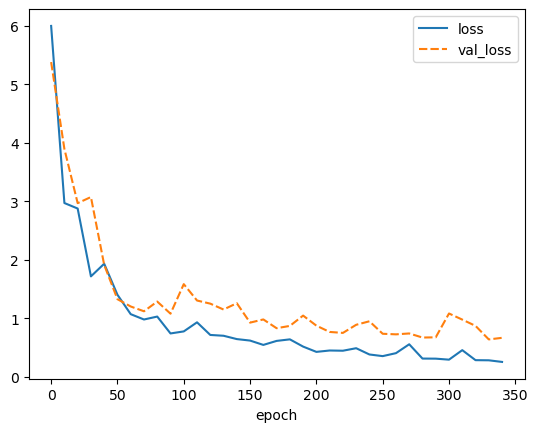

best weights loaded


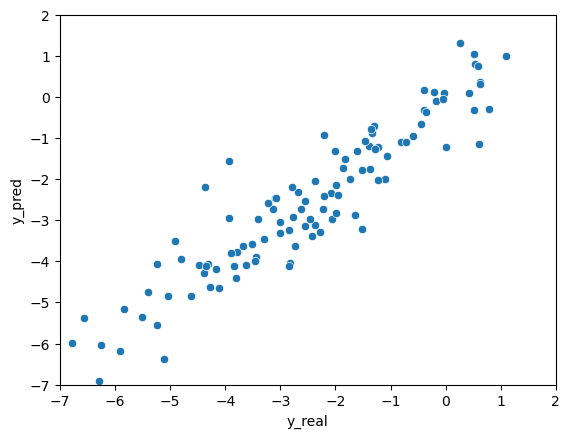

elapsed time: 77.85707068443298
run: 91
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807856FAF0>, <torch.utils.data.dataset.Subset object at 0x00000180D3A8DCA0>, <torch.utils.data.dataset.Subset object at 0x00000180D3A8DFD0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-2): 2 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  530945


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 6.254022169113159 | Validation Loss 6.156109809875488
Epoch 10 | Train Loss 4.104623937606812 | Validation Loss 4.722004413604736
Epoch 20 | Train Loss 3.512795066833496 | Validation Loss 4.518341302871704
Epoch 30 | Train Loss 2.491919430096944 | Validation Loss 3.0590497255325317
Epoch 40 | Train Loss 2.110925531387329 | Validation Loss 2.4576029777526855
Epoch 50 | Train Loss 1.7233726819356283 | Validation Loss 2.0521414279937744
Epoch 60 | Train Loss 1.4675852497418722 | Validation Loss 2.927059769630432
Epoch 70 | Train Loss 1.6651394208272299 | Validation Loss 1.8801777362823486
Epoch 80 | Train Loss 1.3911627928415935 | Validation Loss 1.6262178421020508
Epoch 90 | Train Loss 1.1103814085324606 | Validation Loss 1.5238001942634583
Epoch 100 | Train Loss 1.2120049873987833 | Validation Loss 1.5344496965408325
Epoch 110 | Train Loss 1.5144466479619345 | Validation Loss 2.822958827018738
Epoch 120 | Train Loss 0.9461401581764222 | Validation Loss 1.72438859939

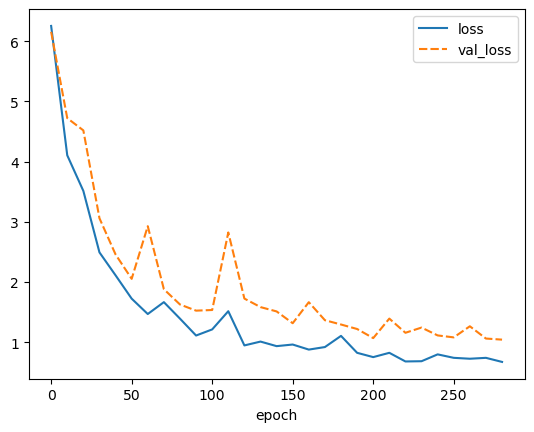

best weights loaded


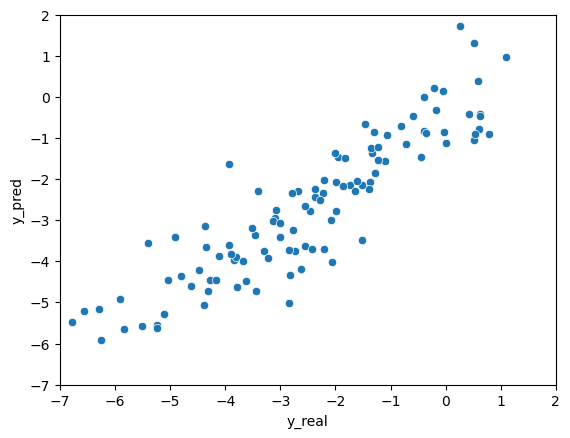

elapsed time: 64.29855585098267
run: 92
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 3, 'aggregations_list': [<function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000180D3B6C460>, <torch.utils.data.dataset.Subset object at 0x000001807BBDC9A0>, <torch.utils.data.dataset.Subset object at 0x000001807BBDC4F0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-2): 2 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  530945


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.674502960840861 | Validation Loss 5.509440183639526
Epoch 10 | Train Loss 2.9941492716471356 | Validation Loss 3.8491131067276
Epoch 20 | Train Loss 2.260894600550334 | Validation Loss 3.7428157329559326
Epoch 30 | Train Loss 1.8343381841977437 | Validation Loss 2.1138640642166138
Epoch 40 | Train Loss 1.3870035449663798 | Validation Loss 1.7943745255470276
Epoch 50 | Train Loss 1.2054702877998351 | Validation Loss 1.5027521848678589
Epoch 60 | Train Loss 1.1599135398864746 | Validation Loss 1.5477805137634277
Epoch 70 | Train Loss 1.1329766094684601 | Validation Loss 1.9051463603973389
Epoch 80 | Train Loss 0.9421552975972494 | Validation Loss 1.6020323038101196
Epoch 90 | Train Loss 0.9448074102401733 | Validation Loss 1.189680576324463
Epoch 100 | Train Loss 0.9703990538914998 | Validation Loss 1.3011690974235535
Epoch 110 | Train Loss 0.8088565389315288 | Validation Loss 1.4037935733795166
Epoch 120 | Train Loss 0.8131383419036865 | Validation Loss 0.98532217

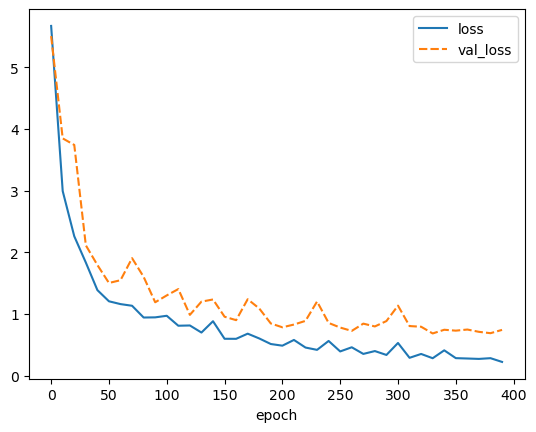

best weights loaded


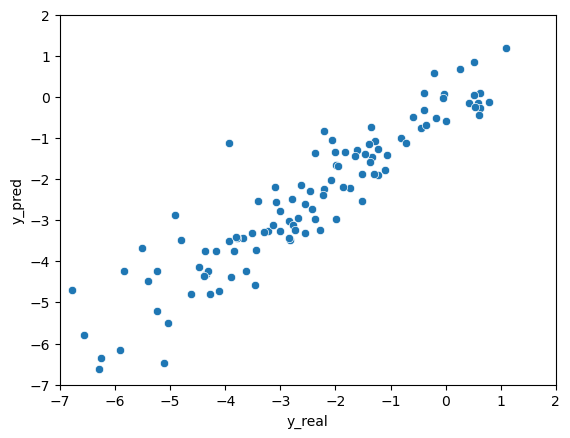

elapsed time: 87.52157402038574
run: 93
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>, <function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000180D3948700>, <torch.utils.data.dataset.Subset object at 0x00000180D3F2BF40>, <torch.utils.data.dataset.Subset object at 0x00000180D3F37610>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  794113


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.348290506998698 | Validation Loss 6.074235916137695
Epoch 10 | Train Loss 2.9809065500895184 | Validation Loss 3.2521671056747437
Epoch 20 | Train Loss 2.1206071933110553 | Validation Loss 2.3822242617607117
Epoch 30 | Train Loss 1.7981075286865233 | Validation Loss 1.8264726996421814
Epoch 40 | Train Loss 1.5148694435755412 | Validation Loss 2.008685350418091
Epoch 50 | Train Loss 1.1748809178670248 | Validation Loss 1.642520785331726
Epoch 60 | Train Loss 0.9818384170532226 | Validation Loss 1.3839507102966309
Epoch 70 | Train Loss 1.0601521134376526 | Validation Loss 1.4511005878448486
Epoch 80 | Train Loss 0.8014994253714879 | Validation Loss 1.3695584535598755
Epoch 90 | Train Loss 0.7466404755910238 | Validation Loss 1.1503693461418152
Epoch 100 | Train Loss 0.7578593353430431 | Validation Loss 1.099550724029541
Epoch 110 | Train Loss 0.6817568143208822 | Validation Loss 1.1862891912460327
Epoch 120 | Train Loss 0.624798983335495 | Validation Loss 1.0333723

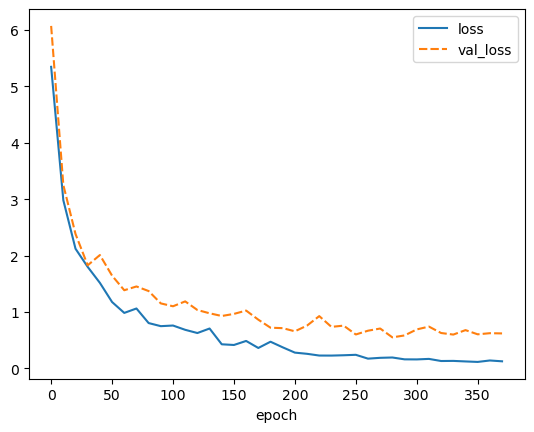

best weights loaded


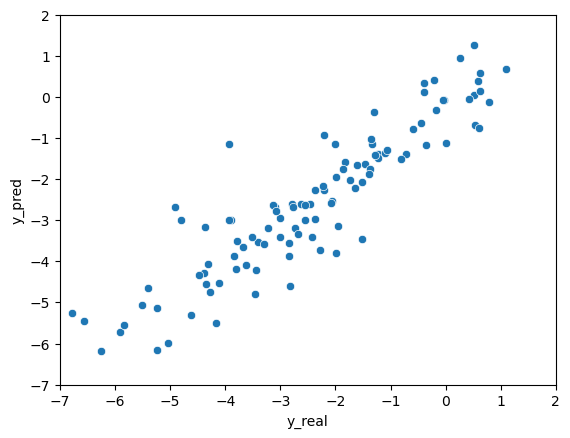

elapsed time: 98.0713107585907
run: 94
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807B8CC7F0>, <torch.utils.data.dataset.Subset object at 0x000001807B879EE0>, <torch.utils.data.dataset.Subset object at 0x000001807B879880>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 6.10896536509196 | Validation Loss 5.500532150268555
Epoch 10 | Train Loss 3.0996872107187907 | Validation Loss 4.42602801322937
Epoch 20 | Train Loss 2.7484739303588865 | Validation Loss 3.2138571739196777
Epoch 30 | Train Loss 1.8208693901697794 | Validation Loss 3.761831045150757
Epoch 40 | Train Loss 1.531982672214508 | Validation Loss 1.8063658475875854
Epoch 50 | Train Loss 1.8850115060806274 | Validation Loss 1.9717450737953186
Epoch 60 | Train Loss 1.891247578461965 | Validation Loss 2.1763724088668823
Epoch 70 | Train Loss 1.3228191216786702 | Validation Loss 1.828733742237091
Epoch 80 | Train Loss 1.10757128794988 | Validation Loss 2.174975037574768
Epoch 90 | Train Loss 1.0669647773106894 | Validation Loss 1.4903836846351624
Epoch 100 | Train Loss 1.0980895121892293 | Validation Loss 1.3017752170562744
Epoch 110 | Train Loss 0.9196649710337321 | Validation Loss 1.1139159202575684
Epoch 120 | Train Loss 0.8285313407580058 | Validation Loss 1.8092767000198

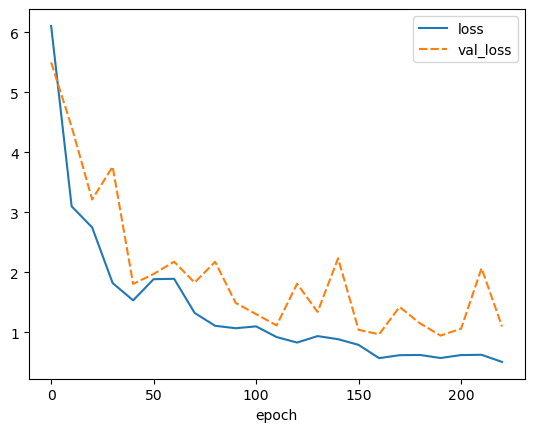

best weights loaded


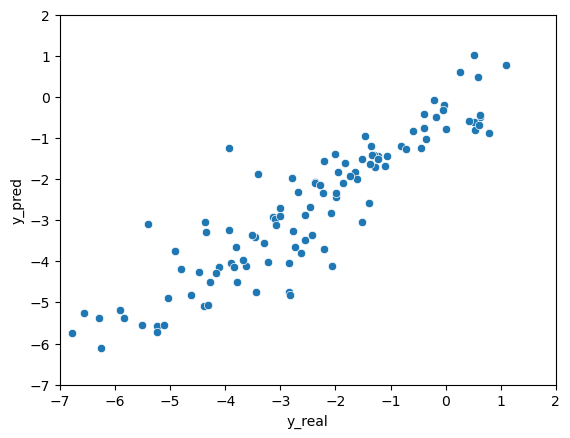

elapsed time: 55.79505777359009
run: 95
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807B88F340>, <torch.utils.data.dataset.Subset object at 0x00000180D40B1190>, <torch.utils.data.dataset.Subset object at 0x00000180D40B1670>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.28571891784668 | Validation Loss 5.434718370437622
Epoch 10 | Train Loss 2.991851313908895 | Validation Loss 3.851776361465454
Epoch 20 | Train Loss 2.408656104405721 | Validation Loss 2.6883535385131836
Epoch 30 | Train Loss 1.6796143531799317 | Validation Loss 2.1269218921661377
Epoch 40 | Train Loss 1.3986602226893108 | Validation Loss 1.7058475017547607
Epoch 50 | Train Loss 1.0817333936691285 | Validation Loss 1.6136246919631958
Epoch 60 | Train Loss 1.1710698405901592 | Validation Loss 1.3092639446258545
Epoch 70 | Train Loss 1.011588442325592 | Validation Loss 1.1464213728904724
Epoch 80 | Train Loss 0.8502528349558512 | Validation Loss 1.2323493361473083
Epoch 90 | Train Loss 0.761733337243398 | Validation Loss 1.3658751845359802
Epoch 100 | Train Loss 0.7266289671262105 | Validation Loss 1.0133512914180756
Epoch 110 | Train Loss 0.5876441379388173 | Validation Loss 1.2690508961677551
Epoch 120 | Train Loss 0.663660928606987 | Validation Loss 0.8958794474

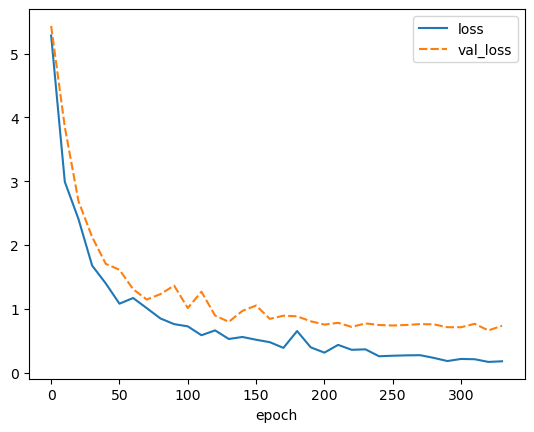

best weights loaded


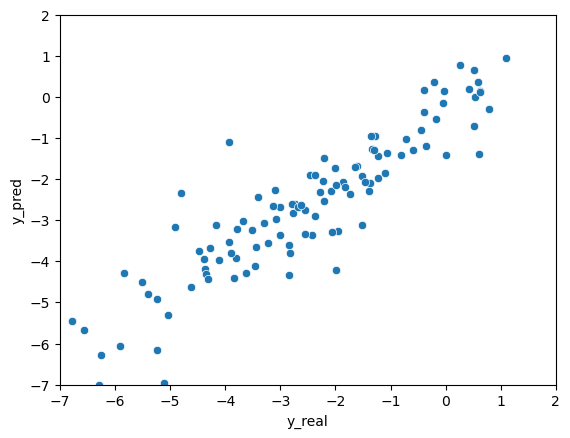

elapsed time: 86.86547660827637
run: 96
{'hidden_channels_list': [512], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>, <function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000180D3DDE8B0>, <torch.utils.data.dataset.Subset object at 0x000001807BC20130>, <torch.utils.data.dataset.Subset object at 0x000001807B8B5580>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  6145
Epoch 0 | Train Loss 5.7776462237040205 | Validation Loss 5.747202634811401


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 10 | Train Loss 3.613460127512614 | Validation Loss 4.624526500701904
Epoch 20 | Train Loss 3.015440050760905 | Validation Loss 4.2160961627960205
Epoch 30 | Train Loss 3.0598714351654053 | Validation Loss 3.769275188446045
Epoch 40 | Train Loss 2.7283754348754883 | Validation Loss 3.5143901109695435
Epoch 50 | Train Loss 2.565525698661804 | Validation Loss 3.1356096267700195
Epoch 60 | Train Loss 2.534870664278666 | Validation Loss 3.1465165615081787
Epoch 70 | Train Loss 2.1509580969810487 | Validation Loss 2.8103917837142944
Epoch 80 | Train Loss 2.2166782935460407 | Validation Loss 2.7486246824264526
Epoch 90 | Train Loss 2.0633018016815186 | Validation Loss 2.649465560913086
Epoch 100 | Train Loss 1.8515746355056764 | Validation Loss 2.388908267021179
Epoch 110 | Train Loss 2.020496877034505 | Validation Loss 2.471052646636963
Epoch 120 | Train Loss 1.7861827005942663 | Validation Loss 2.470489978790283
Epoch 130 | Train Loss 1.5918599486351013 | Validation Loss 2.1525346040

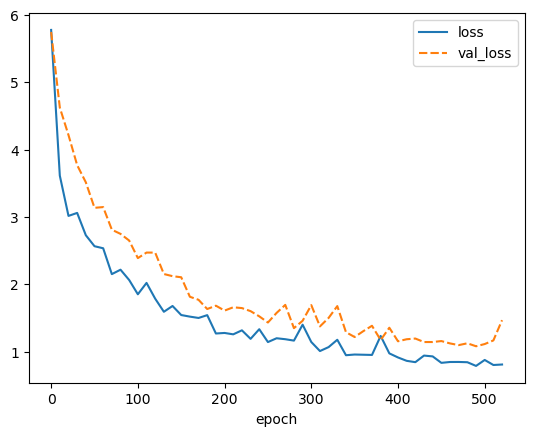

best weights loaded


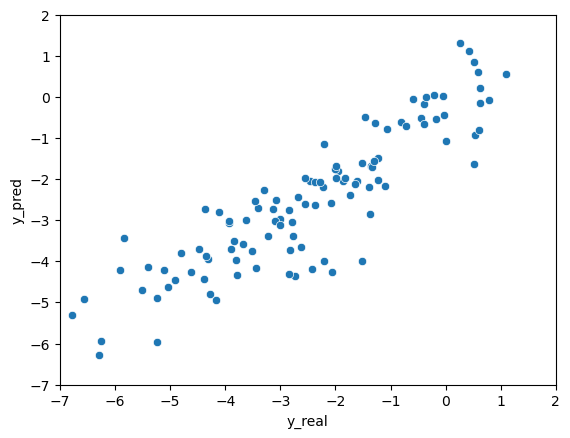

elapsed time: 92.38722014427185
run: 97
{'hidden_channels_list': [512], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000180D38FDD60>, <torch.utils.data.dataset.Subset object at 0x00000180D3F5BDC0>, <torch.utils.data.dataset.Subset object at 0x00000180D3F5B6A0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  5633
Epoch 0 | Train Loss 6.49852097829183 | Validation Loss 5.848299741744995


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 10 | Train Loss 3.685072596867879 | Validation Loss 4.960895895957947
Epoch 20 | Train Loss 3.5093244393666585 | Validation Loss 4.849796295166016
Epoch 30 | Train Loss 3.3270753224690757 | Validation Loss 4.470568418502808
Epoch 40 | Train Loss 3.152529716491699 | Validation Loss 4.340622663497925
Epoch 50 | Train Loss 3.1118141253789267 | Validation Loss 4.097546219825745
Epoch 60 | Train Loss 2.8358532508214314 | Validation Loss 3.650556206703186
Epoch 70 | Train Loss 2.754475196202596 | Validation Loss 3.6664276123046875
Epoch 80 | Train Loss 2.7262322982152303 | Validation Loss 3.4181419610977173
Epoch 90 | Train Loss 2.55134429136912 | Validation Loss 3.512465238571167
Epoch 100 | Train Loss 2.5355263233184813 | Validation Loss 3.2006866931915283
Epoch 110 | Train Loss 2.6849533637364704 | Validation Loss 3.3691996335983276
Epoch 120 | Train Loss 2.369982099533081 | Validation Loss 3.0316256284713745
Epoch 130 | Train Loss 2.5879802385965984 | Validation Loss 2.847635626792

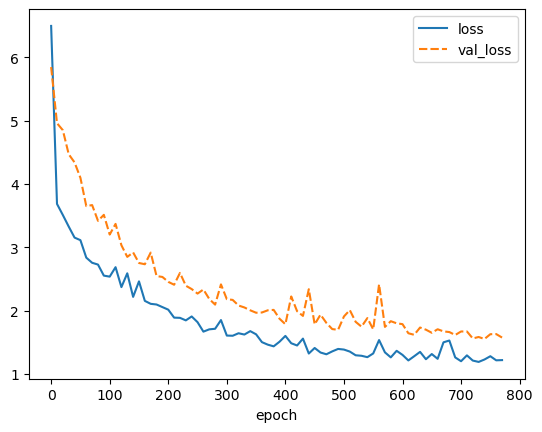

best weights loaded


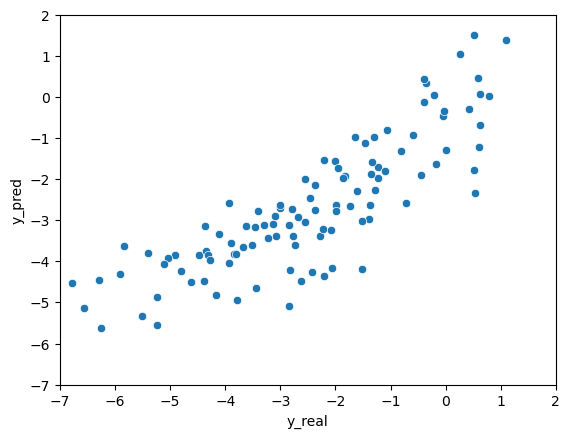

elapsed time: 128.14434051513672
run: 98
{'hidden_channels_list': [512], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 1, 'aggregations_list': [<function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807BAE3670>, <torch.utils.data.dataset.Subset object at 0x00000180D3D519D0>, <torch.utils.data.dataset.Subset object at 0x00000180D3D510A0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  5633
Epoch 0 | Train Loss 6.799937343597412 | Validation Loss 5.85799252986908


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 10 | Train Loss 3.716582711537679 | Validation Loss 4.9501365423202515
Epoch 20 | Train Loss 3.3195863723754884 | Validation Loss 4.192068099975586
Epoch 30 | Train Loss 3.0679709911346436 | Validation Loss 4.244008183479309
Epoch 40 | Train Loss 3.1263553142547607 | Validation Loss 3.8253923654556274
Epoch 50 | Train Loss 2.799587869644165 | Validation Loss 3.857583522796631
Epoch 60 | Train Loss 2.809828201929728 | Validation Loss 3.6787095069885254
Epoch 70 | Train Loss 2.5748571793238324 | Validation Loss 3.231147527694702
Epoch 80 | Train Loss 2.398350691795349 | Validation Loss 3.0896143913269043
Epoch 90 | Train Loss 2.269757374127706 | Validation Loss 2.929828405380249
Epoch 100 | Train Loss 2.0967668652534486 | Validation Loss 3.0184320211410522
Epoch 110 | Train Loss 2.0847955624262493 | Validation Loss 2.670986771583557
Epoch 120 | Train Loss 1.885453995068868 | Validation Loss 2.6222729682922363
Epoch 130 | Train Loss 2.0197113672892253 | Validation Loss 2.54047977924

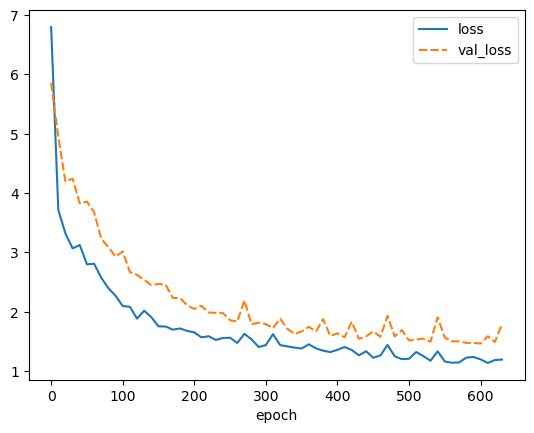

best weights loaded


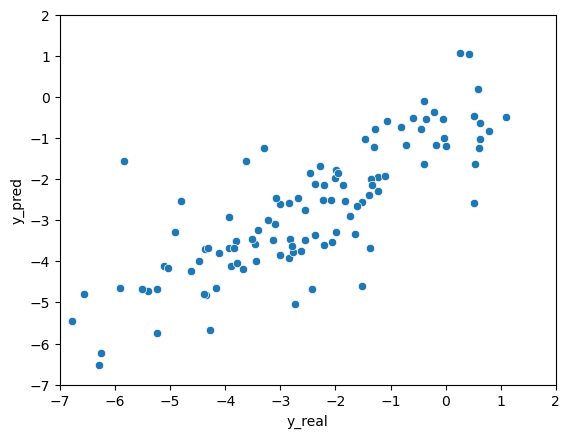

elapsed time: 106.95481634140015
run: 99
{'hidden_channels_list': [512], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>, <function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807BB792E0>, <torch.utils.data.dataset.Subset object at 0x00000180D39EF4C0>, <torch.utils.data.dataset.Subset object at 0x00000180D39EFB20>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1): GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  268801


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.282904005050659 | Validation Loss 5.823841333389282
Epoch 10 | Train Loss 3.087153132756551 | Validation Loss 3.833115339279175
Epoch 20 | Train Loss 2.3933639923731485 | Validation Loss 3.192324161529541
Epoch 30 | Train Loss 1.9521505991617838 | Validation Loss 2.5447096824645996
Epoch 40 | Train Loss 1.7976091384887696 | Validation Loss 2.199275255203247
Epoch 50 | Train Loss 1.577545158068339 | Validation Loss 1.8690385818481445
Epoch 60 | Train Loss 1.512167755762736 | Validation Loss 1.7516090273857117
Epoch 70 | Train Loss 1.2588393727938334 | Validation Loss 1.4652241468429565
Epoch 80 | Train Loss 1.4149717529614767 | Validation Loss 1.3261703252792358
Epoch 90 | Train Loss 0.9818107118209203 | Validation Loss 1.3937389254570007
Epoch 100 | Train Loss 1.024302593866984 | Validation Loss 1.2383201718330383
Epoch 110 | Train Loss 0.9374488790829977 | Validation Loss 1.2563093900680542
Epoch 120 | Train Loss 0.8650420983632405 | Validation Loss 1.0129074454

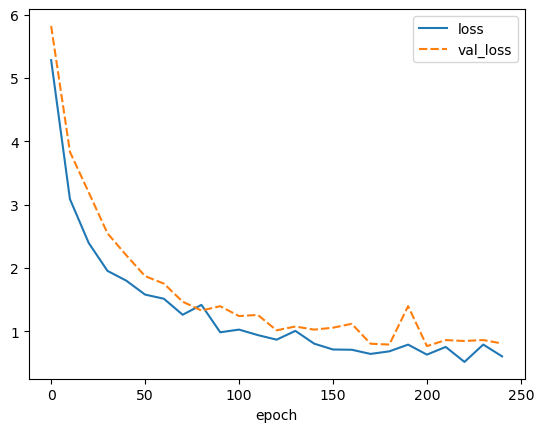

best weights loaded


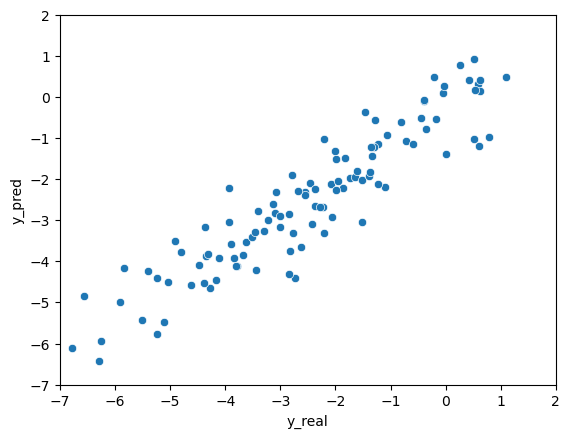

elapsed time: 53.863465547561646
run: 100
{'hidden_channels_list': [512], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807B9F97C0>, <torch.utils.data.dataset.Subset object at 0x000001807BB0EF70>, <torch.utils.data.dataset.Subset object at 0x000001807BB0EF10>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1): GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  268289


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 5.38414807120959 | Validation Loss 6.560480356216431
Epoch 10 | Train Loss 3.6293718973795572 | Validation Loss 4.6118364334106445
Epoch 20 | Train Loss 2.97342365582784 | Validation Loss 3.593835234642029
Epoch 30 | Train Loss 2.583209013938904 | Validation Loss 2.8545982837677
Epoch 40 | Train Loss 2.1415103514989218 | Validation Loss 3.1424806118011475
Epoch 50 | Train Loss 1.9288469552993774 | Validation Loss 2.2462871074676514
Epoch 60 | Train Loss 1.7089387734731039 | Validation Loss 2.3056710958480835
Epoch 70 | Train Loss 1.63265434106191 | Validation Loss 3.056025505065918
Epoch 80 | Train Loss 1.431124738852183 | Validation Loss 1.9264720678329468
Epoch 90 | Train Loss 1.474429984887441 | Validation Loss 1.6892908215522766
Epoch 100 | Train Loss 1.52362380027771 | Validation Loss 2.1407742500305176
Epoch 110 | Train Loss 1.294045587380727 | Validation Loss 1.6208285093307495
Epoch 120 | Train Loss 1.1695767939090729 | Validation Loss 1.7286563515663147
Ep

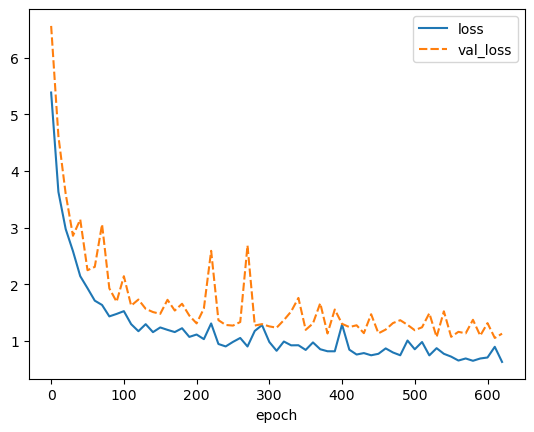

best weights loaded


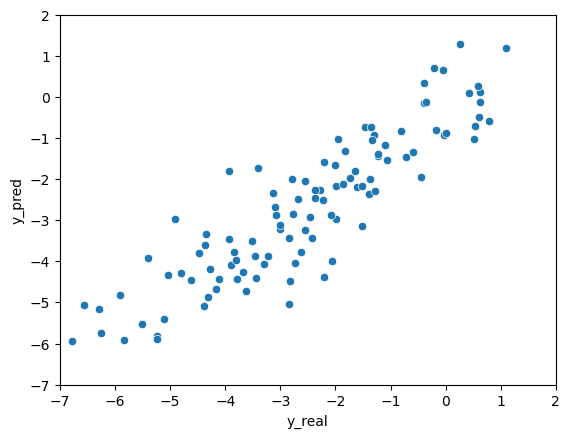

elapsed time: 124.59206700325012
run: 101
{'hidden_channels_list': [512], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 2, 'aggregations_list': [<function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000180D3849B20>, <torch.utils.data.dataset.Subset object at 0x000001807B9FE0D0>, <torch.utils.data.dataset.Subset object at 0x000001807B9FE130>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1): GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  268289


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.8176311492919925 | Validation Loss 5.8414894342422485
Epoch 10 | Train Loss 3.1996366500854494 | Validation Loss 4.372089862823486
Epoch 20 | Train Loss 2.3666012664635976 | Validation Loss 3.198792815208435
Epoch 30 | Train Loss 2.161564350128174 | Validation Loss 3.067312240600586
Epoch 40 | Train Loss 1.6074652989705405 | Validation Loss 2.0398629903793335
Epoch 50 | Train Loss 1.8167492230733235 | Validation Loss 1.9245613813400269
Epoch 60 | Train Loss 1.2719744205474854 | Validation Loss 1.4290976524353027
Epoch 70 | Train Loss 1.1597365458806357 | Validation Loss 1.3465295433998108
Epoch 80 | Train Loss 1.2502159357070923 | Validation Loss 1.290387511253357
Epoch 90 | Train Loss 1.1726075490315755 | Validation Loss 1.2960587739944458
Epoch 100 | Train Loss 1.093621055285136 | Validation Loss 1.4766240119934082
Epoch 110 | Train Loss 0.9881004154682159 | Validation Loss 1.1960291266441345
Epoch 120 | Train Loss 1.109387203057607 | Validation Loss 1.11100000

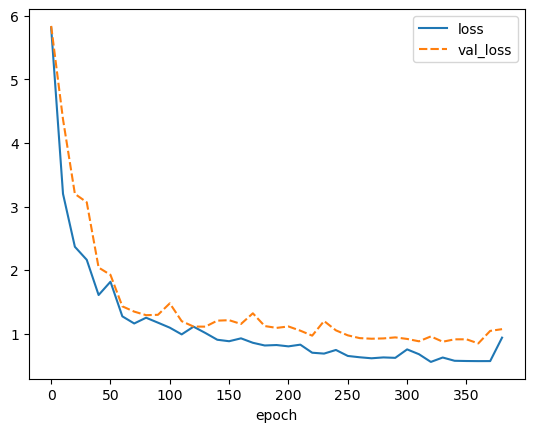

best weights loaded


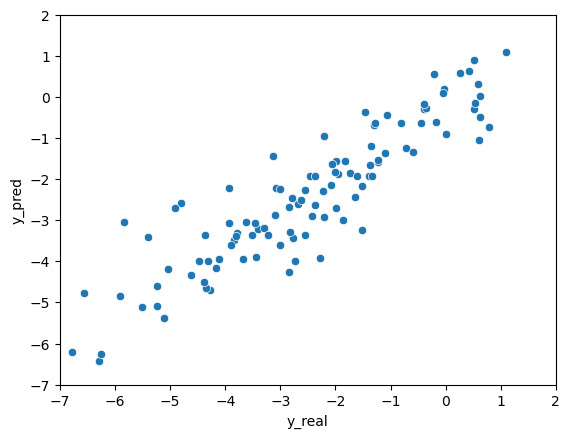

elapsed time: 78.14021825790405
run: 102
{'hidden_channels_list': [512], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>, <function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807BAE3E20>, <torch.utils.data.dataset.Subset object at 0x00000180D3FC8DC0>, <torch.utils.data.dataset.Subset object at 0x00000180D3FC8400>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-2): 2 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  531457


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.574358050028483 | Validation Loss 5.640706539154053
Epoch 10 | Train Loss 3.006465276082357 | Validation Loss 3.6758010387420654
Epoch 20 | Train Loss 2.345277500152588 | Validation Loss 2.464957118034363
Epoch 30 | Train Loss 1.7466647704442342 | Validation Loss 1.9655486345291138
Epoch 40 | Train Loss 1.4707448641459147 | Validation Loss 2.2431914806365967
Epoch 50 | Train Loss 1.3325005412101745 | Validation Loss 1.7061082124710083
Epoch 60 | Train Loss 1.2214682261149088 | Validation Loss 1.3969431519508362
Epoch 70 | Train Loss 1.1350817402203879 | Validation Loss 1.5400338768959045
Epoch 80 | Train Loss 0.9323537985483805 | Validation Loss 1.340328335762024
Epoch 90 | Train Loss 1.126576824982961 | Validation Loss 1.2130348682403564
Epoch 100 | Train Loss 0.7748411893844604 | Validation Loss 1.4211934208869934
Epoch 110 | Train Loss 0.7547828515370687 | Validation Loss 1.2208349108695984
Epoch 120 | Train Loss 0.870369021097819 | Validation Loss 1.026854515

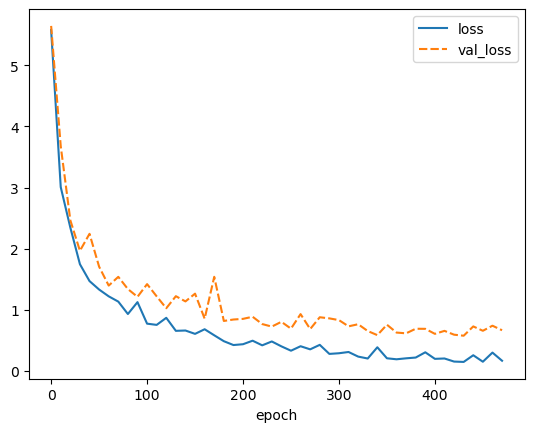

best weights loaded


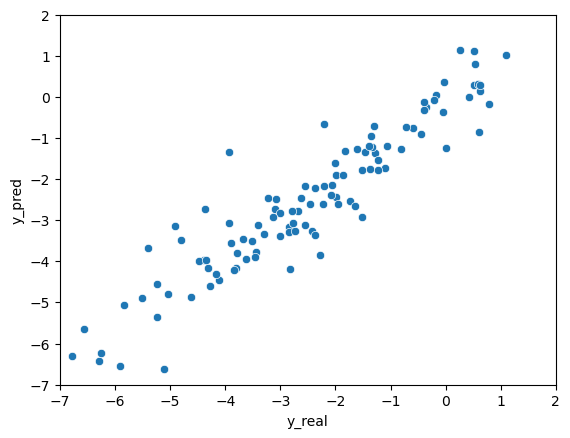

elapsed time: 116.925696849823
run: 103
{'hidden_channels_list': [512], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000180D39300D0>, <torch.utils.data.dataset.Subset object at 0x00000180D3826D60>, <torch.utils.data.dataset.Subset object at 0x00000180D3826070>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-2): 2 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  530945


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 5.105784257253011 | Validation Loss 5.523280382156372
Epoch 10 | Train Loss 3.5264997164408367 | Validation Loss 4.047815680503845
Epoch 20 | Train Loss 2.69781699180603 | Validation Loss 2.9375017881393433
Epoch 30 | Train Loss 2.6199616193771362 | Validation Loss 2.3452155590057373
Epoch 40 | Train Loss 2.1092527945836386 | Validation Loss 2.0122926235198975
Epoch 50 | Train Loss 1.4658720294634502 | Validation Loss 1.9731541275978088
Epoch 60 | Train Loss 2.3729140758514404 | Validation Loss 2.546073079109192
Epoch 70 | Train Loss 1.2096290429433187 | Validation Loss 1.593453288078308
Epoch 80 | Train Loss 1.5961400548617044 | Validation Loss 2.4875035285949707
Epoch 90 | Train Loss 1.1162967006365458 | Validation Loss 1.7475807070732117
Epoch 100 | Train Loss 1.0221640666325886 | Validation Loss 1.4321337938308716
Epoch 110 | Train Loss 0.9949756860733032 | Validation Loss 1.310163140296936
Epoch 120 | Train Loss 1.054758643110593 | Validation Loss 1.3077709078

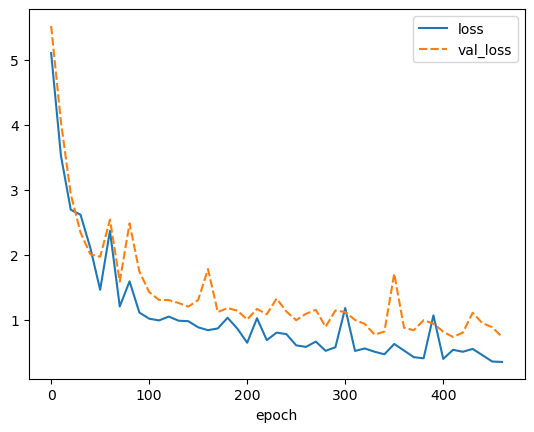

best weights loaded


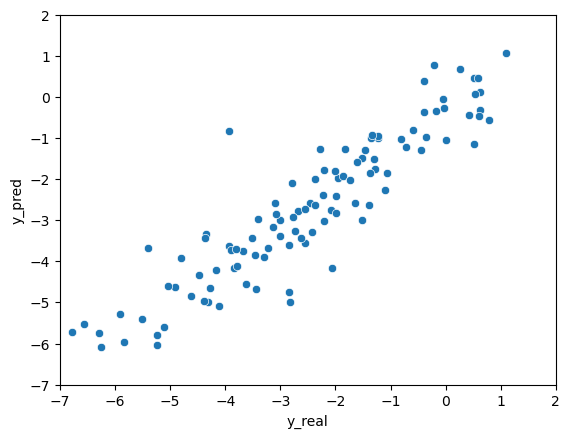

elapsed time: 106.31875348091125
run: 104
{'hidden_channels_list': [512], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 3, 'aggregations_list': [<function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000180D39B8520>, <torch.utils.data.dataset.Subset object at 0x00000180D3FDB130>, <torch.utils.data.dataset.Subset object at 0x00000180D3FDBC70>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-2): 2 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  530945


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 4.874766747156779 | Validation Loss 5.532810211181641
Epoch 10 | Train Loss 2.8052023967107136 | Validation Loss 3.644424319267273
Epoch 20 | Train Loss 2.3829582850138347 | Validation Loss 2.653100848197937
Epoch 30 | Train Loss 1.7460560282071431 | Validation Loss 3.006787657737732
Epoch 40 | Train Loss 1.2388433456420898 | Validation Loss 2.204741060733795
Epoch 50 | Train Loss 1.2146861632664998 | Validation Loss 1.4766499996185303
Epoch 60 | Train Loss 1.3149428049723306 | Validation Loss 1.4871926307678223
Epoch 70 | Train Loss 1.0658426642417909 | Validation Loss 2.6723270416259766
Epoch 80 | Train Loss 0.9721058130264282 | Validation Loss 1.2278625965118408
Epoch 90 | Train Loss 0.8545345187187194 | Validation Loss 1.1746432185173035
Epoch 100 | Train Loss 0.8936209559440613 | Validation Loss 1.37380850315094
Epoch 110 | Train Loss 1.0868691802024841 | Validation Loss 1.3342559933662415
Epoch 120 | Train Loss 0.8029018620649974 | Validation Loss 1.040744900

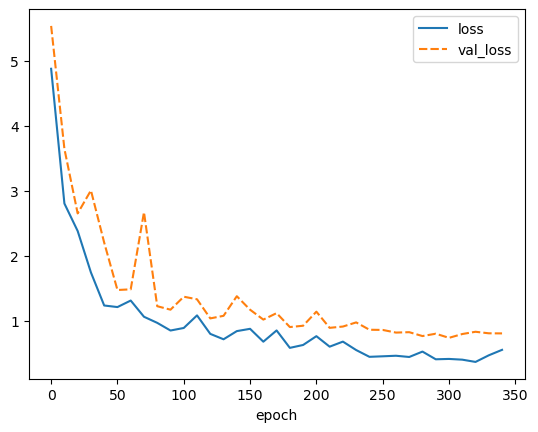

best weights loaded


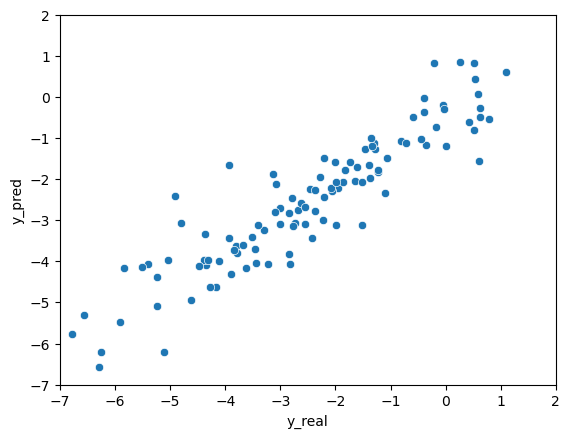

elapsed time: 82.40869951248169
run: 105
{'hidden_channels_list': [512], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>, <function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000180D3D5F160>, <torch.utils.data.dataset.Subset object at 0x00000180D38E2310>, <torch.utils.data.dataset.Subset object at 0x00000180D38E2820>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  794113


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.174563471476237 | Validation Loss 6.121608257293701
Epoch 10 | Train Loss 2.85468763311704 | Validation Loss 3.292492389678955
Epoch 20 | Train Loss 2.388993247350057 | Validation Loss 2.4891982078552246
Epoch 30 | Train Loss 1.4984567085901896 | Validation Loss 1.5249727368354797
Epoch 40 | Train Loss 1.3240668058395386 | Validation Loss 1.8003283739089966
Epoch 50 | Train Loss 1.097117292881012 | Validation Loss 1.3555152416229248
Epoch 60 | Train Loss 0.9496814529101054 | Validation Loss 1.2056872248649597
Epoch 70 | Train Loss 0.7842685172955195 | Validation Loss 1.1574954092502594
Epoch 80 | Train Loss 0.762912905216217 | Validation Loss 1.1806980967521667
Epoch 90 | Train Loss 0.6538148999214173 | Validation Loss 1.2194437980651855
Epoch 100 | Train Loss 0.5648973683516184 | Validation Loss 0.9671010375022888
Epoch 110 | Train Loss 0.6210807204246521 | Validation Loss 0.9821452498435974
Epoch 120 | Train Loss 0.4663537840048472 | Validation Loss 0.848511785

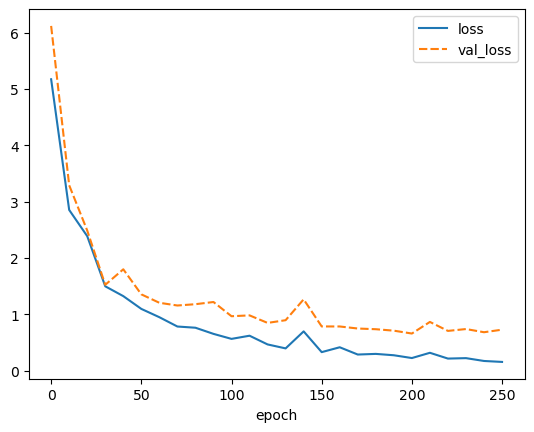

best weights loaded


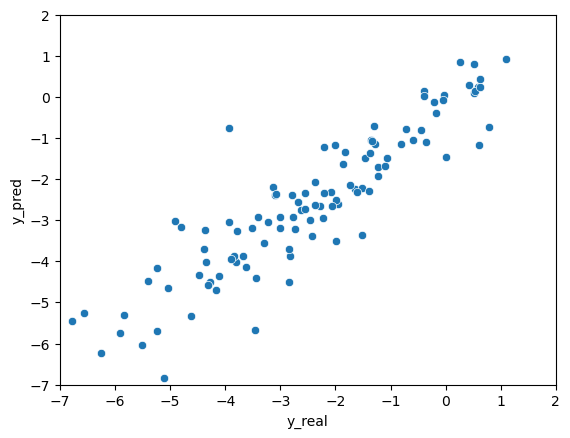

elapsed time: 74.59504389762878
run: 106
{'hidden_channels_list': [512], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000018078A0A940>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000180D27D8820>, <torch.utils.data.dataset.Subset object at 0x000001807BA20280>, <torch.utils.data.dataset.Subset object at 0x000001807BA20880>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 6.492475461959839 | Validation Loss 5.852964162826538
Epoch 10 | Train Loss 3.3602881908416746 | Validation Loss 4.158510088920593
Epoch 20 | Train Loss 2.342227029800415 | Validation Loss 2.810458540916443
Epoch 30 | Train Loss 1.9447399218877157 | Validation Loss 2.6511964797973633
Epoch 40 | Train Loss 1.670067548751831 | Validation Loss 2.3374358415603638
Epoch 50 | Train Loss 1.4424539486567178 | Validation Loss 1.8925589323043823
Epoch 60 | Train Loss 1.4010392387708028 | Validation Loss 1.8024007678031921
Epoch 70 | Train Loss 1.8486704389254252 | Validation Loss 1.8542301654815674
Epoch 80 | Train Loss 1.0813525080680848 | Validation Loss 2.042550563812256
Epoch 90 | Train Loss 1.0653811722993851 | Validation Loss 1.3271957039833069
Epoch 100 | Train Loss 0.9329490085442861 | Validation Loss 1.3251131176948547
Epoch 110 | Train Loss 0.9967854619026184 | Validation Loss 1.231022834777832
Epoch 120 | Train Loss 0.7611502130826314 | Validation Loss 1.372057199

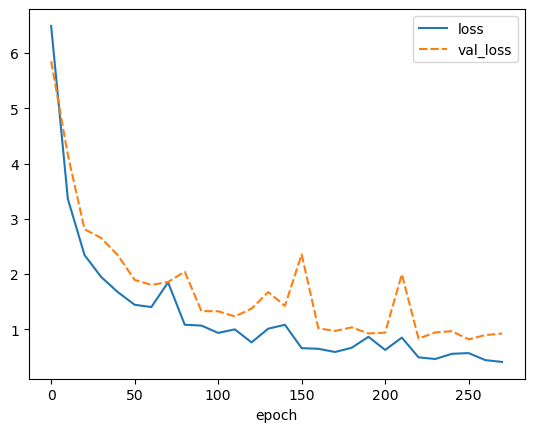

best weights loaded


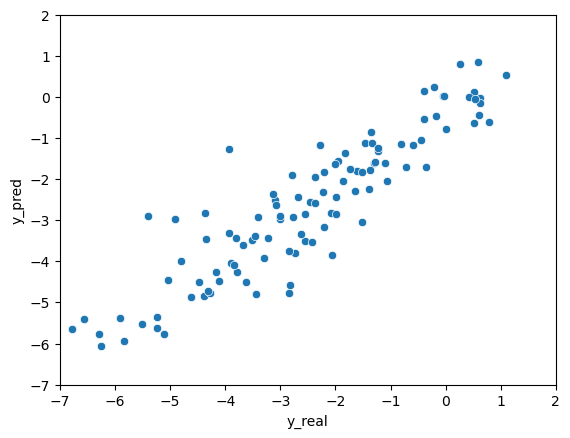

elapsed time: 75.79402565956116
run: 107
{'hidden_channels_list': [512], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000018078A1B310>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001807B84C2E0>, <torch.utils.data.dataset.Subset object at 0x000001807BC06820>, <torch.utils.data.dataset.Subset object at 0x000001807BC06040>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.671652173995971 | Validation Loss 5.388371229171753
Epoch 10 | Train Loss 2.834027361869812 | Validation Loss 3.410306453704834
Epoch 20 | Train Loss 2.6378314971923826 | Validation Loss 2.7269943952560425
Epoch 30 | Train Loss 2.1990529537200927 | Validation Loss 2.2906309366226196
Epoch 40 | Train Loss 1.4444804032643637 | Validation Loss 1.7093477845191956
Epoch 50 | Train Loss 1.1930090030034384 | Validation Loss 1.643346905708313
Epoch 60 | Train Loss 1.1187549630800884 | Validation Loss 1.3521896004676819
Epoch 70 | Train Loss 1.2575446407000224 | Validation Loss 1.4152777791023254
Epoch 80 | Train Loss 0.8864467342694601 | Validation Loss 1.5329365134239197
Epoch 90 | Train Loss 0.8038335343201956 | Validation Loss 1.0921467542648315
Epoch 100 | Train Loss 0.7222293496131897 | Validation Loss 1.0961770713329315
Epoch 110 | Train Loss 1.1481609741846721 | Validation Loss 1.3276059031486511
Epoch 120 | Train Loss 0.807633771498998 | Validation Loss 1.1673476

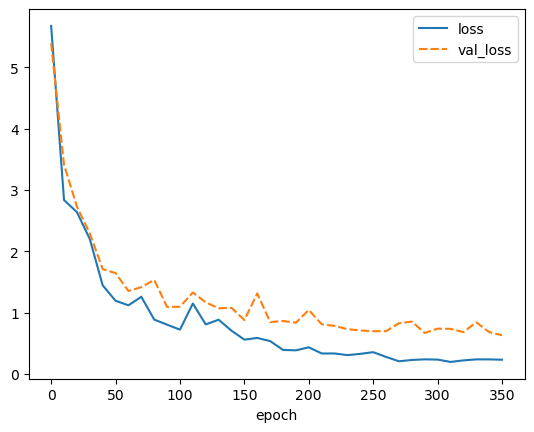

best weights loaded


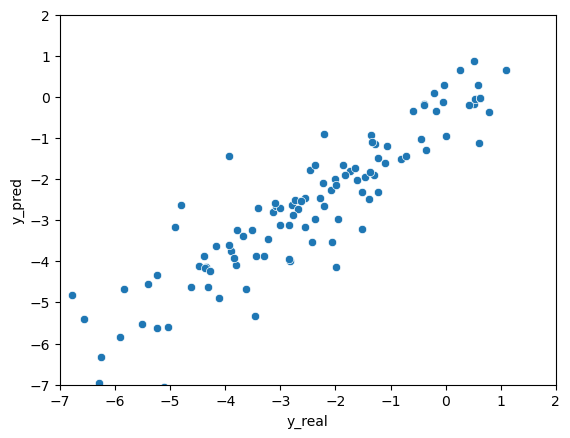

elapsed time: 96.40254664421082


In [13]:
import time

counter = 0
for combination in combinations:
    t0 = time.time()
    print(f"run: {counter}")
    counter = counter + 1
    
    #print(combination)
    combination_dict = dict(zip(keys, combination))
    print(combination_dict)
    

    apply_scaffold_split = combination_dict["apply_scaffold_split_list"]

    if not use_fingerprints:
        hidden_channels=combination_dict["hidden_channels_list"]
        gcn_layers=combination_dict["gcn_layers_list"]
        linear_sizes=combination_dict["linear_sizes_list"]
        aggregations=deepcopy(combination_dict["aggregations_list"])
    else:
        radius = combination_dict["radius"] 
        fpSize = combination_dict["fpSize"]
        linear_layers = combination_dict["linear_layers"] 
        create_count_fp = combination_dict["create_count_fp"] 



    if create_new_data:
        data, data_y = load_esol()

        pytorch_graph_list = create_pytorch_graph(data)

        processed_data = process_pytorch_graph(pytorch_graph_list, data_y)

        train_dataset, test_dataset, val_dataset = create_train_test_graphs(processed_data, train_percentage= 0.8, apply_scaffold_split = apply_scaffold_split )
        loader, test_loader, val_loader = create_dataloader(train_dataset, test_dataset, val_dataset, batch_size=batch_size)

    else:

        import dill as pickle

        if apply_scaffold_split:
            loader_file = 'datasets_scaffold_reg_esol.pkl'
        else: 
            loader_file = 'datasets_reg_esol.pkl'
        with open(loader_file, 'rb') as file: 
            
            
            loaders = pickle.load(file) 
        
            print(loaders) 

        train_dataset, test_dataset, val_dataset = loaders


        if use_fingerprints:
            morgan_data_train, morgan_data_test, morgan_data_val = create_fingerprint_sets(datasets=[train_dataset, test_dataset, val_dataset], radius=radius, fpSize = fpSize, create_count_fp = create_count_fp)

            loader = DataLoader(morgan_data_train, 
                                batch_size=batch_size, shuffle=True)
            test_loader = DataLoader(morgan_data_test, 
                                    batch_size=batch_size, shuffle=True)
            val_loader = DataLoader(morgan_data_val, 
                                    batch_size=batch_size, shuffle=True)

        else:
            loader, test_loader, val_loader = create_dataloader_val(train_dataset, test_dataset, val_dataset, batch_size=batch_size)
        

    if not use_fingerprints:
        model, device, optimizer, loss_fn = initialize_regression_model(input_dim=train_dataset.dataset[0].x.shape[-1], hidden_channels=hidden_channels, gcn_layers=gcn_layers, linear_sizes=linear_sizes, aggregations=aggregations, apply_random_aggregations=apply_random_aggregations, learning_rate=learning_rate)


        model, best_model_weights, losses, val_losses = regression_train(model, loader, val_loader, device, loss_fn, optimizer, log_time=10, max_epochs=1000, apply_early_stopping = True, early_stopping_patience = 50, finally_plot_losses = True)
        plt.show()
        mean_mse, mean_l1, dfs = predict_regression(model, test_loader, device, best_model_weights)

    else:

        model, device, optimizer, loss_fn = initialize_regression_model_fingerprint( linear_layers=linear_layers, learning_rate=learning_rate)


        model, best_model_weights, losses, val_losses = regression_train_fingerprint(model, loader, val_loader, device, loss_fn, optimizer, log_time=100, max_epochs=1000, apply_early_stopping = True, early_stopping_patience = 50, finally_plot_losses = True)
        plt.show()
        mean_mse, mean_l1, dfs = predict_regression_fingerprint(model, test_loader, device, best_model_weights)


    plt.show()

    el_time = time.time() - t0
    print(f"elapsed time: {el_time}")
    
    final_df = pd.concat(dfs)
    
    save_dict = dict()

    save_dict["pred_df"] = final_df

    save_dict["el_time"] = el_time

    #regression
    save_dict["mean_mse"] = mean_mse
    save_dict["mean_l1"] = mean_l1

    aggregations_names = [x.__name__ for x in aggregations]

    save_dict["apply_scaffold_split"] = apply_scaffold_split

    if not use_fingerprints:
        save_dict["hidden_channels"] = hidden_channels
        save_dict["gcn_layers"] = gcn_layers
        save_dict["linear_sizes"] = linear_sizes
        save_dict["aggregations"] = aggregations_names
    else:
        save_dict["radius"] = radius
        save_dict["fpSize"] = fpSize
        save_dict["linear_layers"] = linear_layers
        save_dict["create_count_fp"] = create_count_fp



    save_dict["apply_random_aggregations"] = apply_random_aggregations
    save_dict["learning_rate"] = learning_rate

    save_dict["model_type"] = model_type
    save_dict["model"] = model

    from os.path import exists
    final_filename = filename_basic
    counter = 1
    while exists(final_filename):
        final_filename = filename_basic + "_" + str(counter)
        counter = counter + 1

    import pickle
    with open(final_filename, 'wb') as handle:
        pickle.dump(save_dict, handle)


    